In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2

In [3]:
#move the zip file to my google drive
#first mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/temp/train_data.zip -d dataset/

Archive:  /content/drive/MyDrive/temp/train_data.zip
 extracting: dataset/train/images/image_438.jpeg  
 extracting: dataset/train/images/image_279.jpeg  
 extracting: dataset/train/images/image_058.jpeg  
 extracting: dataset/train/images/image_213.jpeg  
 extracting: dataset/train/images/image_504.jpeg  
 extracting: dataset/train/images/image_398.jpeg  
 extracting: dataset/train/images/image_005.jpeg  
 extracting: dataset/train/images/image_168.jpeg  
 extracting: dataset/train/images/image_274.jpeg  
 extracting: dataset/train/images/image_450.jpeg  
 extracting: dataset/train/images/image_079.jpeg  
 extracting: dataset/train/images/image_031.jpeg  
 extracting: dataset/train/images/image_060.jpeg  
 extracting: dataset/train/images/image_465.jpeg  
 extracting: dataset/train/images/image_365.jpeg  
 extracting: dataset/train/images/image_277.jpeg  
 extracting: dataset/train/images/image_515.jpeg  
 extracting: dataset/train/images/image_477.jpeg  
 extracting: dataset/train/im

In [5]:
!unzip /content/drive/MyDrive/temp/test_data.zip -d dataset/

Archive:  /content/drive/MyDrive/temp/test_data.zip
 extracting: dataset/test/images/image_438.jpeg  
 extracting: dataset/test/images/image_279.jpeg  
 extracting: dataset/test/images/image_058.jpeg  
 extracting: dataset/test/images/image_213.jpeg  
 extracting: dataset/test/images/image_504.jpeg  
 extracting: dataset/test/images/image_398.jpeg  
 extracting: dataset/test/images/image_005.jpeg  
 extracting: dataset/test/images/image_168.jpeg  
 extracting: dataset/test/images/image_274.jpeg  
 extracting: dataset/test/images/image_450.jpeg  
 extracting: dataset/test/images/image_079.jpeg  
 extracting: dataset/test/images/image_031.jpeg  
 extracting: dataset/test/images/image_060.jpeg  
 extracting: dataset/test/images/image_465.jpeg  
 extracting: dataset/test/images/image_365.jpeg  
 extracting: dataset/test/images/image_277.jpeg  
 extracting: dataset/test/images/image_515.jpeg  
 extracting: dataset/test/images/image_477.jpeg  
 extracting: dataset/test/images/image_187.jpeg 

In [6]:
#convert all the segmented images into black and white
import cv2
import os
import numpy as np

def convert_annotations(input_folder, output_folder):
    """
    Convert pink annotations to binary (black and white) masks
    """
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each image in the folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Read image
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)

            # Convert to binary mask
            # Convert to grayscale first
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Threshold to create binary image
            # Assuming pink regions are significantly different from black background
            _, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

            # Save the binary mask
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, binary)

# Usage
input_folder = "/content/dataset/train/masks"
output_folder = "/content/dataset/train/masks"
convert_annotations(input_folder, output_folder)

In [7]:
# Usage
input_folder = "/content/dataset/test/masks"
output_folder = "/content/dataset/test/masksWB"
convert_annotations(input_folder, output_folder)

In [8]:
IMAGE_PATH = '/content/dataset/train/images'
MASK_PATH = '/content/dataset/train/masks'

In [13]:
import os
import shutil
import random

# Assuming the previous code has already been executed, and the following directories are set up:
TEST_MASKS_PATH = '/content/dataset/test/masksWB'
TEST_PATH = '/content/dataset/test/images'

# Check the number of files in the test directory
print("Number of files in the test directory: " + str(len(os.listdir(TEST_PATH))))

Number of files in the test directory: 520


In [14]:
print("Number of files in the mask directory: " + str(len(os.listdir(MASK_PATH))))
print("Number of files in the train_image directory: " + str(len(os.listdir(IMAGE_PATH))))

Number of files in the mask directory: 536
Number of files in the train_image directory: 536


In [16]:
print("Number of files in the test_image directory: " + str(len(os.listdir(TEST_PATH))))
print("Number of files in the test_mask directory: " + str(len(os.listdir(TEST_MASKS_PATH))))

Number of files in the test_image directory: 520
Number of files in the test_mask directory: 520


In [17]:
import os
from PIL import Image

# Define paths
jpeg_folder = "/content/dataset/train/images"  # Replace with your folder containing .jpeg files
png_folder = "/content/dataset/train/imagespng"   # Replace with your desired output folder for .png files

# Create output folder if it doesn't exist
os.makedirs(png_folder, exist_ok=True)

# Loop through all files in the .jpeg folder
for file_name in os.listdir(jpeg_folder):
    if file_name.endswith(".jpeg") or file_name.endswith(".jpg"):
        # Open the .jpeg file
        jpeg_path = os.path.join(jpeg_folder, file_name)
        image = Image.open(jpeg_path)

        # Save as .png
        png_path = os.path.join(png_folder, file_name.rsplit(".", 1)[0] + ".png")
        image.save(png_path, format="PNG", optimize=True)  # Save without losing data
        print(f"Converted: {jpeg_path} -> {png_path}")

print("All files converted successfully.")

Converted: /content/dataset/train/images/image_085.jpeg -> /content/dataset/train/imagespng/image_085.png
Converted: /content/dataset/train/images/image_350.jpeg -> /content/dataset/train/imagespng/image_350.png
Converted: /content/dataset/train/images/image_209.jpeg -> /content/dataset/train/imagespng/image_209.png
Converted: /content/dataset/train/images/image_295.jpeg -> /content/dataset/train/imagespng/image_295.png
Converted: /content/dataset/train/images/image_250.jpeg -> /content/dataset/train/imagespng/image_250.png
Converted: /content/dataset/train/images/image_457.jpeg -> /content/dataset/train/imagespng/image_457.png
Converted: /content/dataset/train/images/image_074.jpeg -> /content/dataset/train/imagespng/image_074.png
Converted: /content/dataset/train/images/image_059.jpeg -> /content/dataset/train/imagespng/image_059.png
Converted: /content/dataset/train/images/image_488.jpeg -> /content/dataset/train/imagespng/image_488.png
Converted: /content/dataset/train/images/image

In [18]:
import os
from PIL import Image

# Define paths
jpeg_folder = "/content/dataset/test/images"  # Replace with your folder containing .jpeg files
png_folder = "/content/dataset/test/imagespng"   # Replace with your desired output folder for .png files

# Create output folder if it doesn't exist
os.makedirs(png_folder, exist_ok=True)

# Loop through all files in the .jpeg folder
for file_name in os.listdir(jpeg_folder):
    if file_name.endswith(".jpeg") or file_name.endswith(".jpg"):
        # Open the .jpeg file
        jpeg_path = os.path.join(jpeg_folder, file_name)
        image = Image.open(jpeg_path)

        # Save as .png
        png_path = os.path.join(png_folder, file_name.rsplit(".", 1)[0] + ".png")
        image.save(png_path, format="PNG", optimize=True)  # Save without losing data
        print(f"Converted: {jpeg_path} -> {png_path}")

print("All files converted successfully.")

Converted: /content/dataset/test/images/image_085.jpeg -> /content/dataset/test/imagespng/image_085.png
Converted: /content/dataset/test/images/image_350.jpeg -> /content/dataset/test/imagespng/image_350.png
Converted: /content/dataset/test/images/image_209.jpeg -> /content/dataset/test/imagespng/image_209.png
Converted: /content/dataset/test/images/image_295.jpeg -> /content/dataset/test/imagespng/image_295.png
Converted: /content/dataset/test/images/image_250.jpeg -> /content/dataset/test/imagespng/image_250.png
Converted: /content/dataset/test/images/image_457.jpeg -> /content/dataset/test/imagespng/image_457.png
Converted: /content/dataset/test/images/image_074.jpeg -> /content/dataset/test/imagespng/image_074.png
Converted: /content/dataset/test/images/image_059.jpeg -> /content/dataset/test/imagespng/image_059.png
Converted: /content/dataset/test/images/image_488.jpeg -> /content/dataset/test/imagespng/image_488.png
Converted: /content/dataset/test/images/image_313.jpeg -> /conte

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to load and preprocess image
def load_image(image_path):
    # Load the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    img = cv2.resize(img, (128,128))#change size of input image here...

    img = img / 255.0

    return img

INterRouted Method:

In [20]:
import tensorflow as tf

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_folder, mask_folder, file_list, batch_size, image_size=(128,128)):
        self.image_folder = image_folder
        self.mask_folder = mask_folder
        self.file_list = file_list
        self.batch_size = batch_size
        self.image_size = image_size

    def __len__(self):
        return int(np.ceil(len(self.file_list) / self.batch_size))

    def __getitem__(self, index):
        batch_files = self.file_list[index * self.batch_size:(index + 1) * self.batch_size]

        images = np.zeros((len(batch_files), self.image_size[0], self.image_size[1], 1))
        masks = np.zeros((len(batch_files), self.image_size[0], self.image_size[1], 1))

        for i, filename in enumerate(batch_files):
            img_path = os.path.join(self.image_folder, filename)
            mask_filename = filename.replace("image", "mask")
            mask_path = os.path.join(self.mask_folder, mask_filename)

            # Load and preprocess image
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                raise ValueError(f"Error loading image from {img_path}")
            img = cv2.resize(img, self.image_size) / 255.0
            img = np.expand_dims(img, axis=-1)

            # Load and preprocess mask
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                raise ValueError(f"Error loading mask from {mask_path}")
            mask = cv2.resize(mask, self.image_size) / 255.0
            mask = np.expand_dims(mask, axis=-1)

            images[i] = img
            masks[i] = mask

        return images, masks

**Light Weight UNet Model**

In [21]:
!pip install keras_unet_collection

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.1 MB/s eta 0:00:00


In [22]:
from keras_unet_collection import models

In [23]:
# def dice_coefficient(y_true, y_pred):
#     smooth = 1e-6
#     # Explicitly cast to float32
#     y_true = tf.cast(y_true, tf.float32)
#     y_pred = tf.cast(y_pred, tf.float32)

#     y_true_flat = tf.reshape(y_true, [-1])
#     y_pred_flat = tf.reshape(y_pred, [-1])

#     intersection = tf.reduce_sum(y_true_flat * y_pred_flat)
#     union = tf.reduce_sum(y_true_flat) + tf.reduce_sum(y_pred_flat)
#     return (2. * intersection + smooth) / (union + smooth)

# def dice_loss(y_true, y_pred):
#     return 1.0 - dice_coefficient(y_true, y_pred)

# #comibned loss uses both binary crossentropy and dice loss
# def combined_loss(y_true, y_pred):
#     # Ensure consistent types
#     y_true = tf.cast(y_true, tf.float32)
#     y_pred = tf.cast(y_pred, tf.float32)

#     bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
#     dice = dice_loss(y_true, y_pred)
#     return bce + dice

In [25]:
from keras_unet_collection import models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os


# Modified model definition for single-channel input
def build_lightweight_unet():
    model = models.unet_2d(
        input_size=(128, 128, 1),
        filter_num=[2,4,8,16,32],
        n_labels=1,
        stack_num_down=2,
        stack_num_up=1,
        activation='ReLU',
        output_activation='Sigmoid',
        batch_norm=True,
        pool='max',
        unpool='nearest',
        name='lightweight_unet'
    )
    return model

model = build_lightweight_unet()
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
#     loss=combined_loss,
#     metrics=['accuracy']
# )

BiFocal Loss

In [26]:
import tensorflow as tf

def binary_focal_loss(gamma=2.0, alpha=0.25):
    """
    Binary focal loss with additional parameters for fine-tuning
    gamma: focusing parameter for hard examples
    alpha: class weight parameter
    """
    def focal_loss(y_true, y_pred):
        # Cast inputs to float32 for consistency with wavelet processing
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)

        # Calculate focal loss
        loss = -y_true * alpha * tf.pow(1 - y_pred, gamma) * tf.math.log(y_pred) - \
               (1 - y_true) * (1 - alpha) * tf.pow(y_pred, gamma) * tf.math.log(1 - y_pred)
        return tf.reduce_mean(loss)
    return focal_loss

# Model compilation with focal loss
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=binary_focal_loss(gamma=2.0, alpha=0.25),
    metrics=['accuracy',
             tf.keras.metrics.BinaryIoU(threshold=0.5),
             tf.keras.metrics.Recall(),
             tf.keras.metrics.Precision()]
)

In [27]:
# Print the model summary to confirm the architecture
model.summary()
batch_size=4

Model: "lightweight_unet_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0  │ (None, 128, 128, 2)    │             18 │ input_layer[0][0]      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0… │ (None, 128, 128, 2)    │              8 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0… │ (None, 128, 128, 2)    │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1  │ (None, 128, 128, 2)    │             36 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1… │ (None, 128, 128, 2)    │              8 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1… │ (None, 128, 128, 2)    │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_e… │ (None, 64, 64, 2)      │              0 │ lightweight_unet_down… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             72 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             16 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │            144 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             16 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down

 Total params: 31,393 (122.63 KB)

 Trainable params: 31,025 (121.19 KB)

 Non-trainable params: 368 (1.44 KB)

In [29]:
IMAGE_PATH = '/content/dataset/train/imagespng'
MASK_PATH = '/content/dataset/train/masks'

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Split data
image_files = os.listdir(IMAGE_PATH)
train_files, val_files = train_test_split(image_files, test_size=0.1, random_state=42)

# Training setup remains the same, just use the new DataGenerator
train_data_gen = DataGenerator(
    image_folder=IMAGE_PATH,
    mask_folder=MASK_PATH,
    file_list=train_files,
    batch_size=batch_size
)

val_data_gen = DataGenerator(
    image_folder=IMAGE_PATH,
    mask_folder=MASK_PATH,
    file_list=val_files,
    batch_size=batch_size
)

In [31]:
# Extract a single batch from the train_data_gen
sample_images, sample_masks = train_data_gen[0]  # First batch

# Get the shape of a single image and mask from the batch
image_shape = sample_images[0].shape  # Shape of one image in the batch
mask_shape = sample_masks[0].shape   # Shape of one mask in the batch

print(f"Image shape: {image_shape}")
print(f"Mask shape: {mask_shape}")

Image shape: (128, 128, 1)
Mask shape: (128, 128, 1)


In [32]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)

history = model.fit(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

model.save("LightWeightUNetLiver.h5")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 1))
  warnings.warn(msg)


121/121 ━━━━━━━━━━━━━━━━━━━━ 42s 156ms/step - accuracy: 0.6603 - binary_io_u: 0.4204 - loss: 0.0972 - precision: 0.2862 - recall: 0.6268 - val_accuracy: 0.8323 - val_binary_io_u: 0.4178 - val_loss: 0.0999 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.8271 - binary_io_u: 0.4153 - loss: 0.0552 - precision: 0.0073 - recall: 4.1409e-05 - val_accuracy: 0.8323 - val_binary_io_u: 0.4178 - val_loss: 0.0889 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.8305 - binary_io_u: 0.4170 - loss: 0.0371 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8323 - val_binary_io_u: 0.4178 - val_loss: 0.0830 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.8738 - binary_io_u: 0.5708 - loss: 0.0239 - precision: 0.

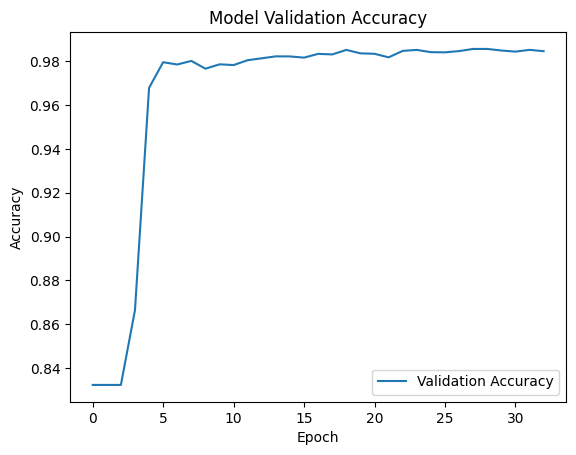

In [33]:
# Train the model for
# Plotting training accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 128, 128, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


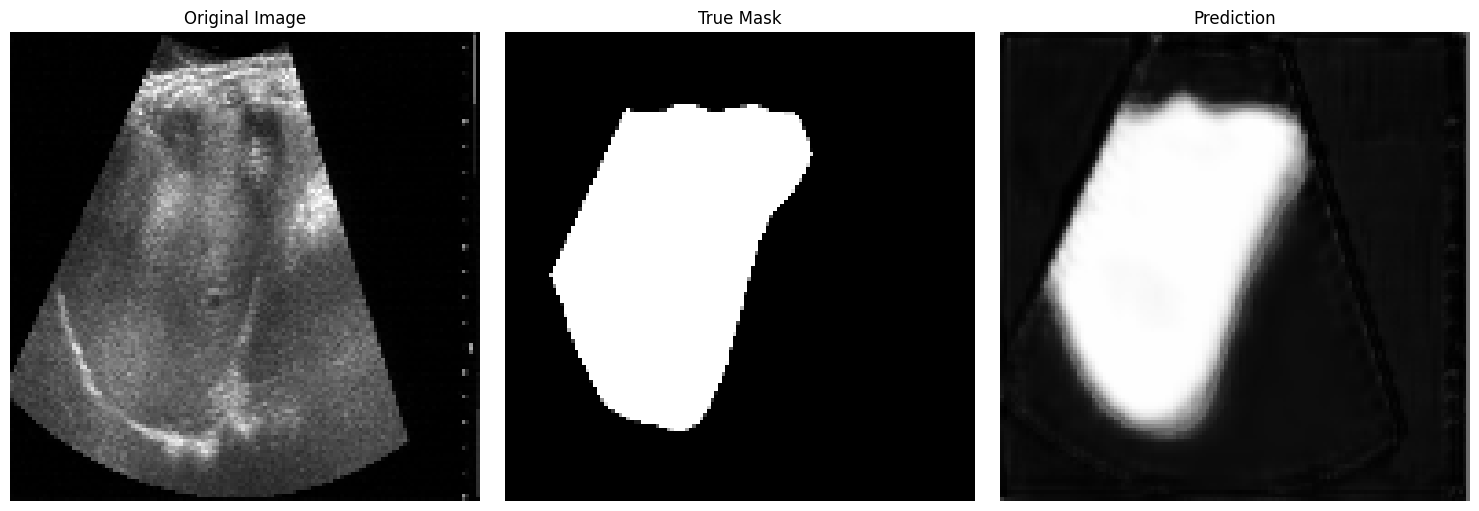

In [34]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def visualize_results(image_path, mask_path, model, image_size=(128, 128)):
    # Load and preprocess image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, image_size)
    image_normalized = image.astype('float32') / 255.0

    # Load and preprocess mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, image_size)
    mask_normalized = mask.astype('float32') / 255.0

    # Make prediction
    input_image = np.expand_dims(image_normalized, axis=[0, -1])
    prediction = model.predict(input_image)
    prediction = prediction[0, :, :, 0]

    # Create figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Plot true mask
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('True Mask')
    axes[1].axis('off')

    # Plot prediction
    axes[2].imshow(prediction, cmap='gray')
    axes[2].set_title('Prediction')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

# Usage example:
sample_image_path = "/content/dataset/train/imagespng/image_007.png"
sample_mask_path = "/content/dataset/train/masks/mask_007.png"
visualize_results(sample_image_path, sample_mask_path, model)

Original image shape: (480, 712)
Original image range: [0, 146]
Input shape to model: (1, 128, 128, 1)
Input range to model: [0.000, 0.561]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Raw prediction shape: (1, 128, 128, 1)
Raw prediction range: [0.003, 0.918]
Raw prediction unique values: 14646 values


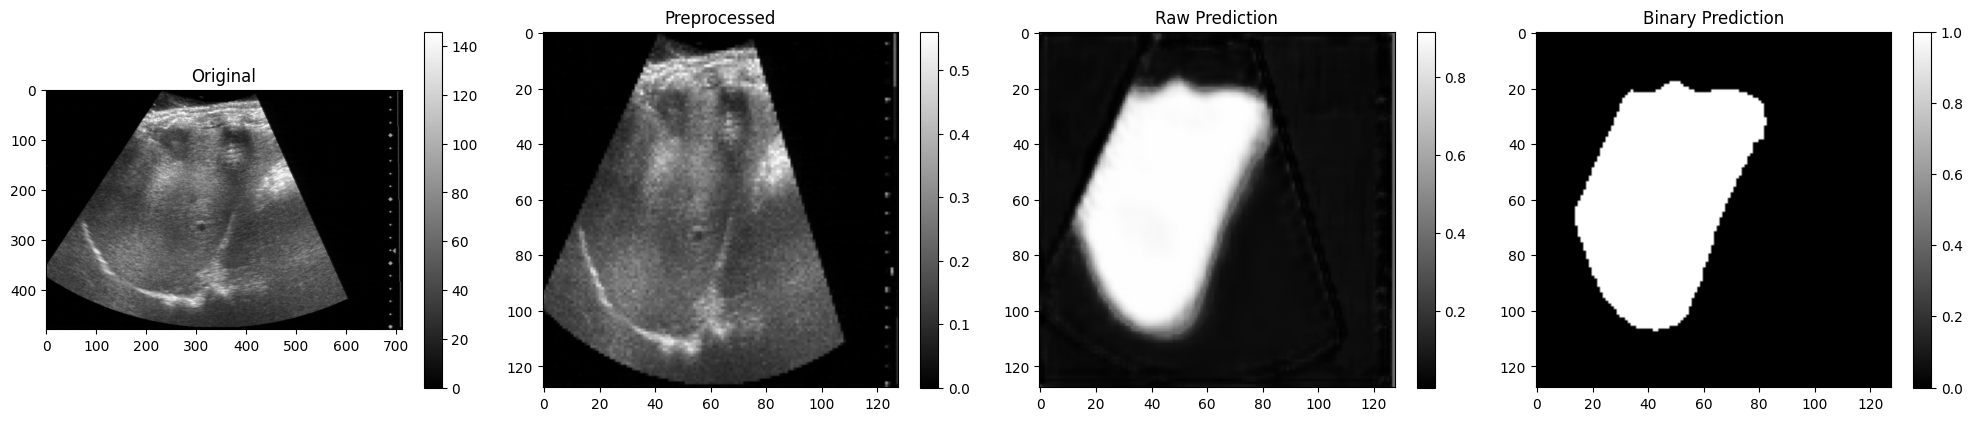

In [35]:
def debug_prediction(image_path, mask_path, model):
    # 1. Load and check image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    print(f"Original image shape: {image.shape}")
    print(f"Original image range: [{image.min()}, {image.max()}]")

    # 2. Preprocess and check
    input_image = cv2.resize(image, (128, 128))
    input_image = input_image.astype('float32') / 255.0
    input_image = np.expand_dims(input_image, axis=[0, -1])
    print(f"Input shape to model: {input_image.shape}")
    print(f"Input range to model: [{input_image.min():.3f}, {input_image.max():.3f}]")

    # 3. Get raw predictions
    raw_pred = model.predict(input_image)
    print(f"Raw prediction shape: {raw_pred.shape}")
    print(f"Raw prediction range: [{raw_pred.min():.3f}, {raw_pred.max():.3f}]")
    print(f"Raw prediction unique values: {np.unique(raw_pred).shape[0]} values")

    # 4. Visualize with detailed information
    plt.figure(figsize=(20, 4))

    plt.subplot(141)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.colorbar()

    plt.subplot(142)
    plt.imshow(input_image[0,:,:,0], cmap='gray')
    plt.title('Preprocessed')
    plt.colorbar()

    plt.subplot(143)
    plt.imshow(raw_pred[0,:,:,0], cmap='gray')
    plt.title('Raw Prediction')
    plt.colorbar()

    plt.subplot(144)
    binary_pred = (raw_pred[0,:,:,0] > 0.5).astype(np.uint8)
    plt.imshow(binary_pred, cmap='gray')
    plt.title('Binary Prediction')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

    return raw_pred

# Test with a sample image
sample_pred = debug_prediction(sample_image_path, sample_mask_path, model)

1. Original image stats:
   Shape: (480, 712)
   Range: [0, 146]

2. Input tensor stats:
   Shape: (1, 128, 128, 1)
   Range: [0.000, 0.561]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

3. Raw prediction stats:
   Shape: (1, 128, 128, 1)
   Range: [0.003, 0.918]
   Mean: 0.260

4. Model architecture:


Model: "lightweight_unet_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0  │ (None, 128, 128, 2)    │             18 │ input_layer[0][0]      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0… │ (None, 128, 128, 2)    │              8 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0… │ (None, 128, 128, 2)    │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1  │ (None, 128, 128, 2)    │             36 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1… │ (None, 128, 128, 2)    │              8 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1… │ (None, 128, 128, 2)    │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_e… │ (None, 64, 64, 2)      │              0 │ lightweight_unet_down… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             72 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             16 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │            144 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             16 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down

 Total params: 93,445 (365.02 KB)

 Trainable params: 31,025 (121.19 KB)

 Non-trainable params: 368 (1.44 KB)

 Optimizer params: 62,052 (242.39 KB)

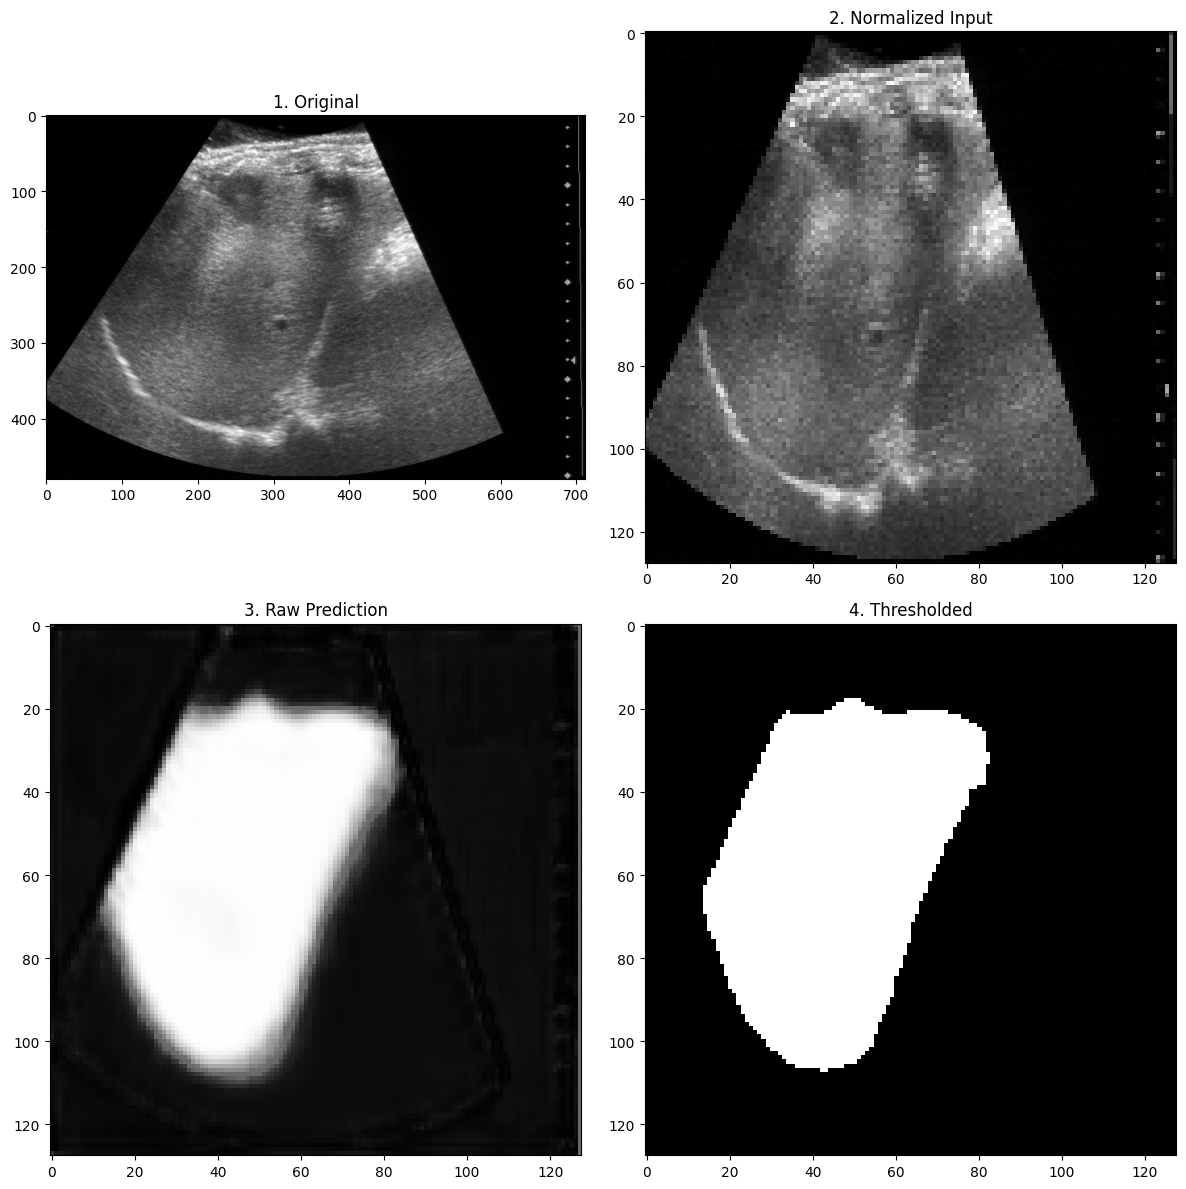

In [36]:
def detailed_debug(image_path, mask_path, model):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Failed to load image from {image_path}")
    print(f"1. Original image stats:")
    print(f"   Shape: {image.shape}")
    print(f"   Range: [{image.min()}, {image.max()}]")

    # Preprocess
    resized = cv2.resize(image, (128, 128))
    normalized = resized.astype('float32') / 255.0
    input_tensor = np.expand_dims(normalized, axis=[0, -1])
    print(f"\n2. Input tensor stats:")
    print(f"   Shape: {input_tensor.shape}")
    print(f"   Range: [{input_tensor.min():.3f}, {input_tensor.max():.3f}]")

    # Model prediction
    pred = model.predict(input_tensor)
    print(f"\n3. Raw prediction stats:")
    print(f"   Shape: {pred.shape}")
    print(f"   Range: [{pred.min():.3f}, {pred.max():.3f}]")
    print(f"   Mean: {pred.mean():.3f}")

    # Model summary
    print("\n4. Model architecture:")
    model.summary()

    # Visualize
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    axes[0,0].imshow(image, cmap='gray')
    axes[0,0].set_title('1. Original')

    axes[0,1].imshow(normalized, cmap='gray')
    axes[0,1].set_title('2. Normalized Input')

    axes[1,0].imshow(pred[0,:,:,0], cmap='gray')
    axes[1,0].set_title('3. Raw Prediction')

    binary = (pred[0,:,:,0] > 0.5).astype(np.uint8)
    axes[1,1].imshow(binary, cmap='gray')
    axes[1,1].set_title('4. Thresholded')

    plt.tight_layout()
    plt.show()

    return pred, binary

# Run debug
test_pred, test_binary = detailed_debug(sample_image_path, sample_mask_path, model)

Original image range: [0, 142]
Preprocessed image range: [0.0, 0.5568627715110779]
Ground truth mask range: [0.0, 1.0]
Input batch shape: (1, 128, 128, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Raw prediction range: [0.0032499032095074654, 0.9157983064651489]
Binary prediction unique values: [0 1]


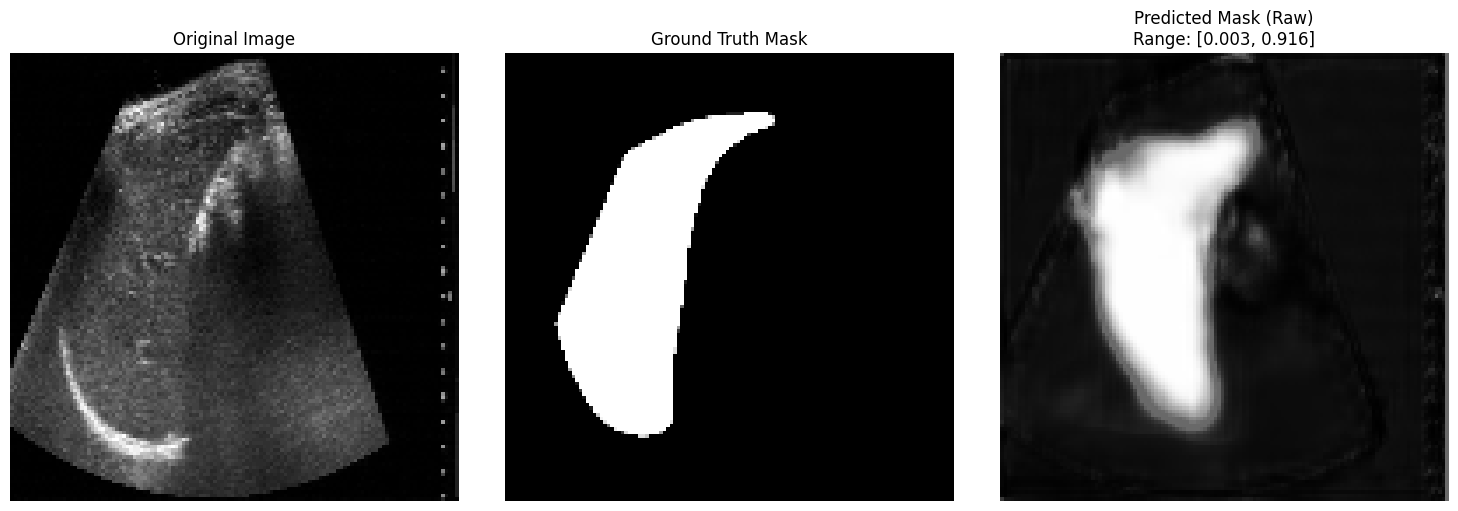

Accuracy: 0.8914
F1 Score: 0.6379


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score, f1_score

def load_and_preprocess_image(image_path, target_size=(128, 128)):
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if original_image is None:
        raise ValueError(f"Could not load image from {image_path}")
    original_image = cv2.resize(original_image, target_size)

    # Debug print
    print(f"Original image range: [{original_image.min()}, {original_image.max()}]")

    preprocessed_image = original_image.astype('float32') / 255.0
    print(f"Preprocessed image range: [{preprocessed_image.min()}, {preprocessed_image.max()}]")

    preprocessed_image = np.expand_dims(preprocessed_image, axis=-1)
    return original_image, preprocessed_image

def load_ground_truth_mask(mask_path, target_size=(128, 128)):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        raise ValueError(f"Could not load mask from {mask_path}")
    mask = cv2.resize(mask, target_size)
    mask = mask.astype('float32') / 255.0
    print(f"Ground truth mask range: [{mask.min()}, {mask.max()}]")
    return mask

# Load and predict
image_path = "/content/dataset/test/imagespng/image_007.png"
mask_path = "/content/dataset/test/masksWB/mask_007.png"

original_image, preprocessed_image = load_and_preprocess_image(image_path)
ground_truth_mask = load_ground_truth_mask(mask_path)

preprocessed_image_batch = np.expand_dims(preprocessed_image, axis=0)
print(f"Input batch shape: {preprocessed_image_batch.shape}")

# Make prediction
predicted_mask = model.predict(preprocessed_image_batch)
print(f"Raw prediction range: [{predicted_mask.min()}, {predicted_mask.max()}]")

# Try different threshold values if needed
threshold = 0.5
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)
print(f"Binary prediction unique values: {np.unique(predicted_mask_binary)}")

# Visualization with enhanced contrast
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(ground_truth_mask, cmap='gray')
plt.title('Ground Truth Mask')
plt.axis('off')

plt.subplot(133)
plt.imshow(predicted_mask[0, :, :, 0], cmap='gray')
plt.title(f'Predicted Mask (Raw)\nRange: [{predicted_mask.min():.3f}, {predicted_mask.max():.3f}]')
plt.axis('off')

plt.tight_layout()
plt.show()

# Metrics
predicted_flat = predicted_mask_binary[0, :, :, 0].flatten()
ground_truth_flat = (ground_truth_mask > 0.5).astype(np.uint8).flatten()

accuracy = accuracy_score(ground_truth_flat, predicted_flat)
f1 = f1_score(ground_truth_flat, predicted_flat)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Model Metrics

Processing image 1/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


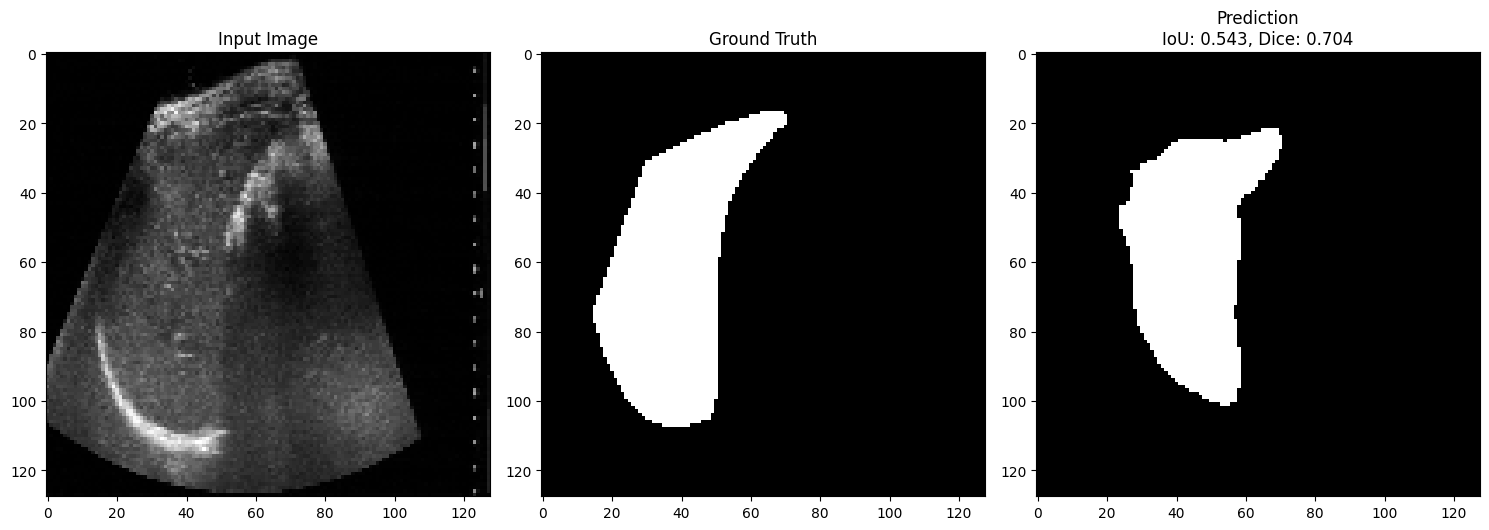

Processing image 2/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Processing image 3/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing image 4/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing image 5/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Processing image 6/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


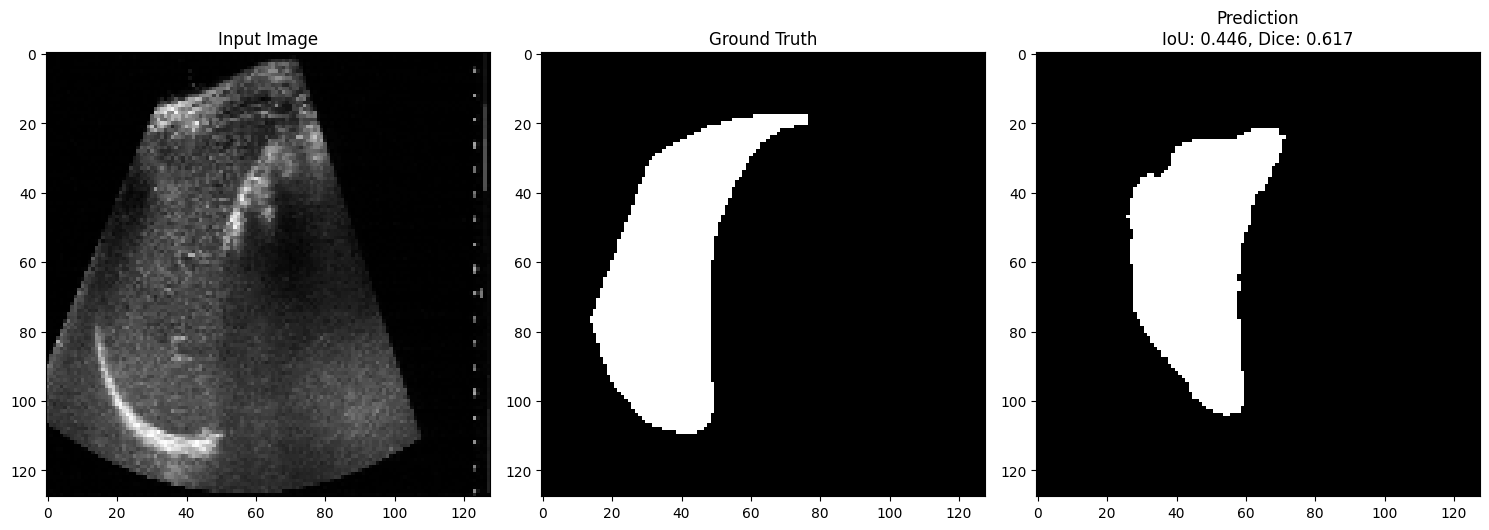

Processing image 7/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processing image 8/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Processing image 9/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Processing image 10/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Processing image 11/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


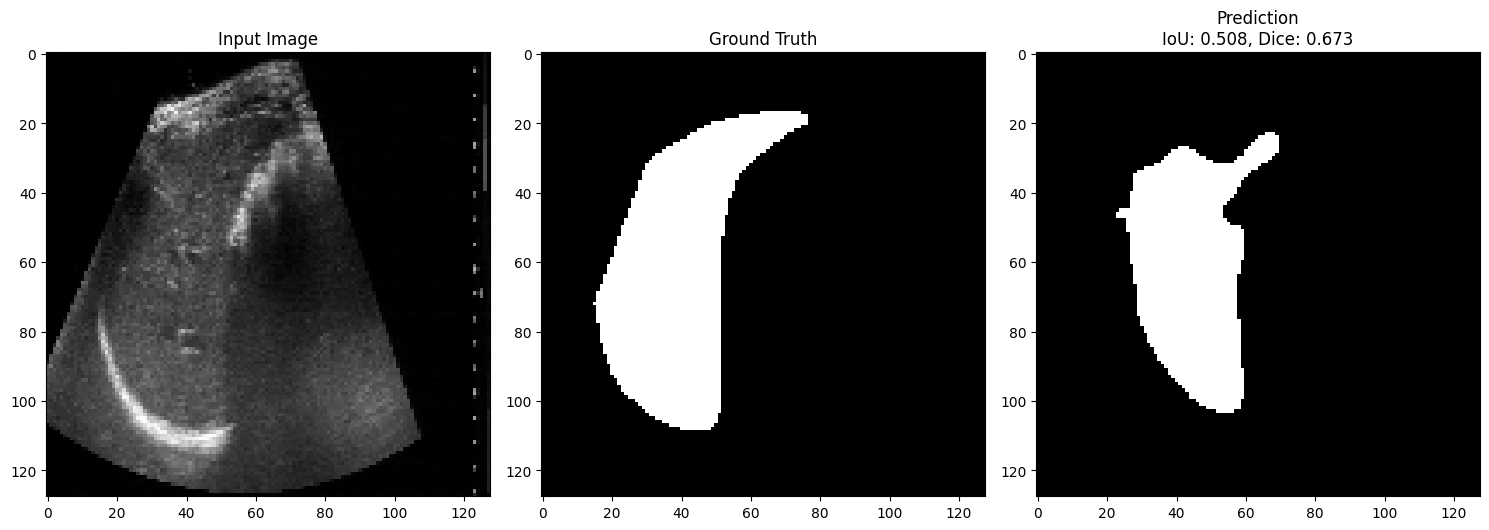

Processing image 12/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 13/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Processing image 14/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processing image 15/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Processing image 16/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


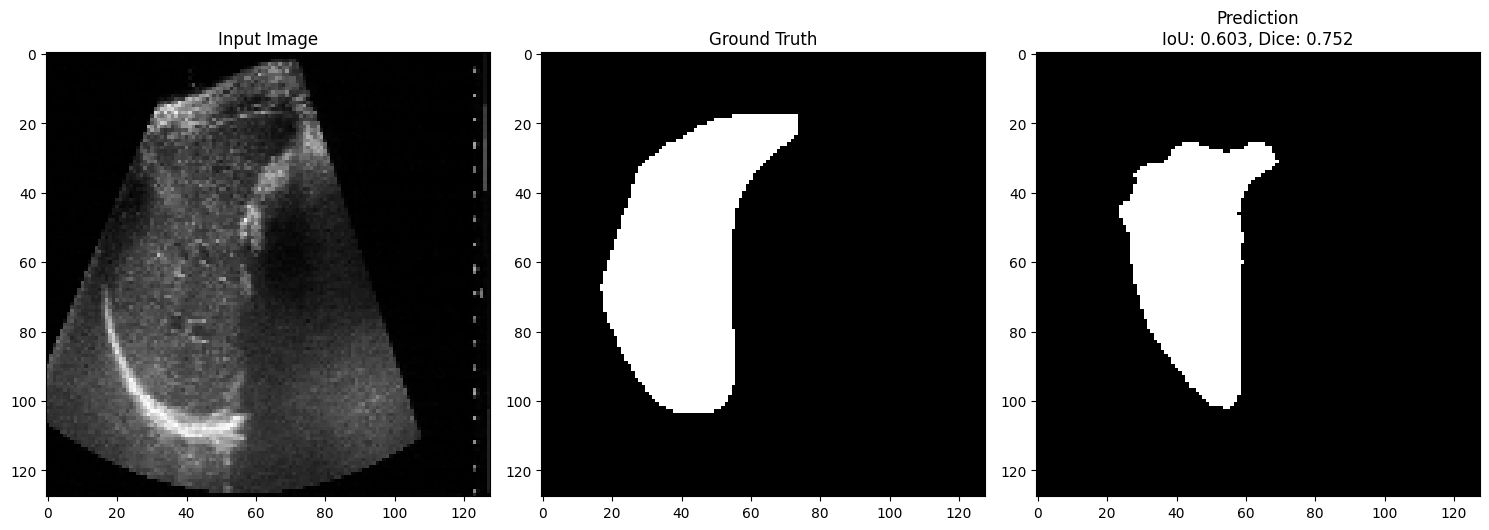

Processing image 17/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing image 18/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Processing image 19/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Processing image 20/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Processing image 21/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


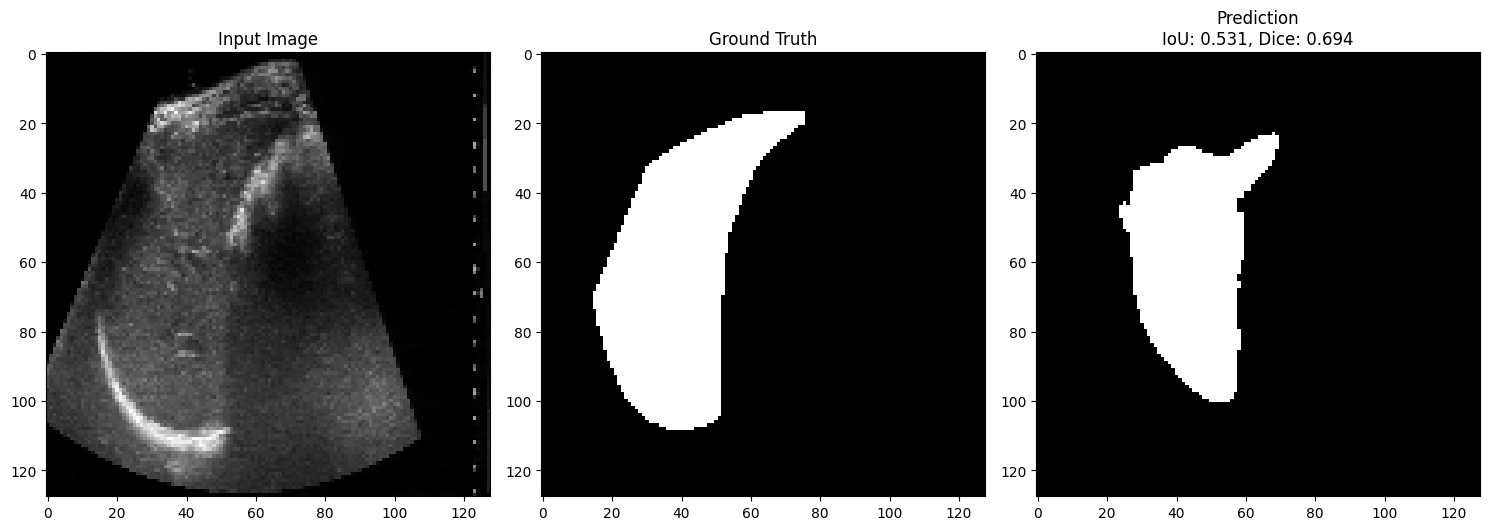

Processing image 22/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Processing image 23/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Processing image 24/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Processing image 25/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Processing image 26/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


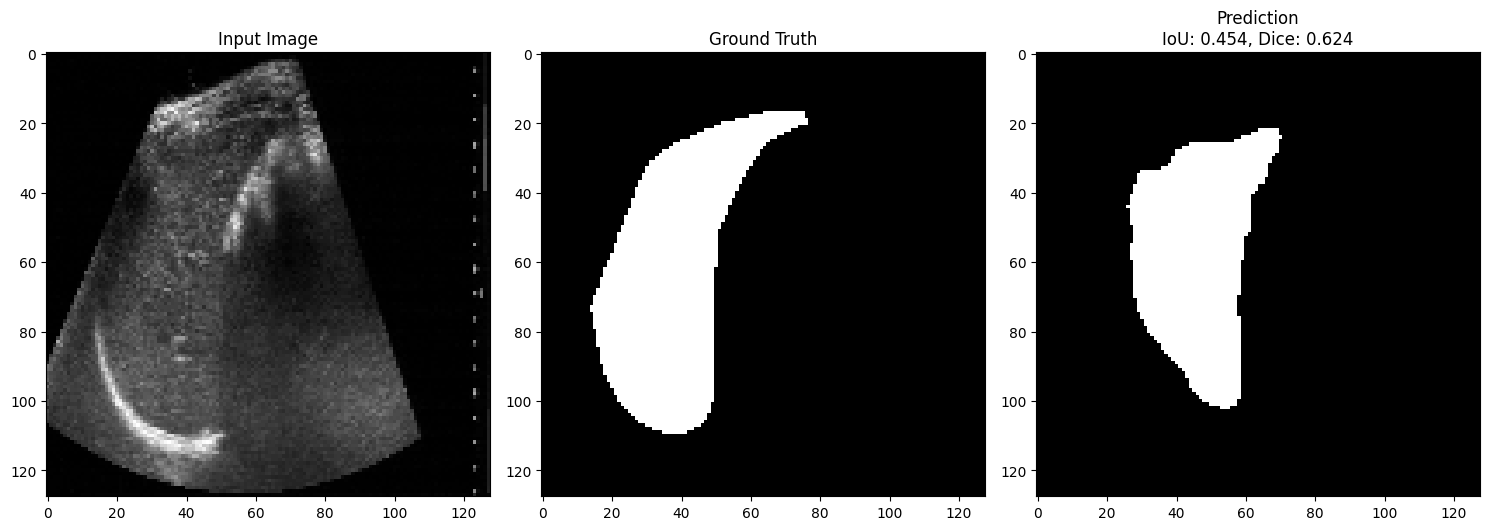

Processing image 27/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Processing image 28/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Processing image 29/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Processing image 30/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 31/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


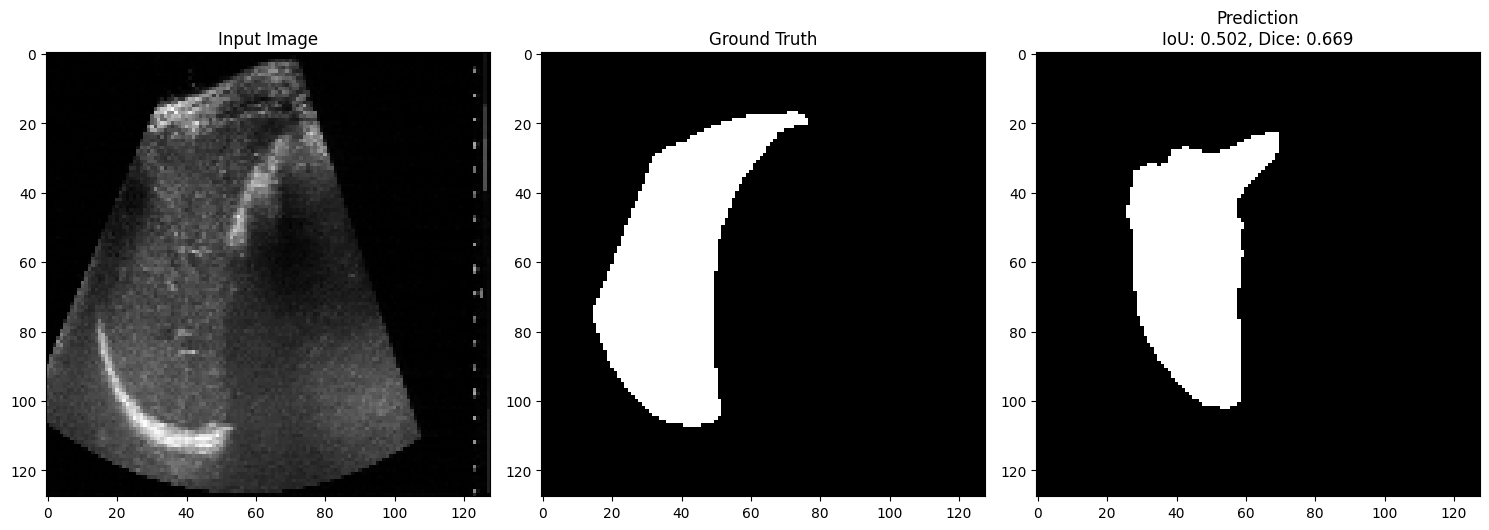

Processing image 32/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Processing image 33/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Processing image 34/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Processing image 35/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Processing image 36/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


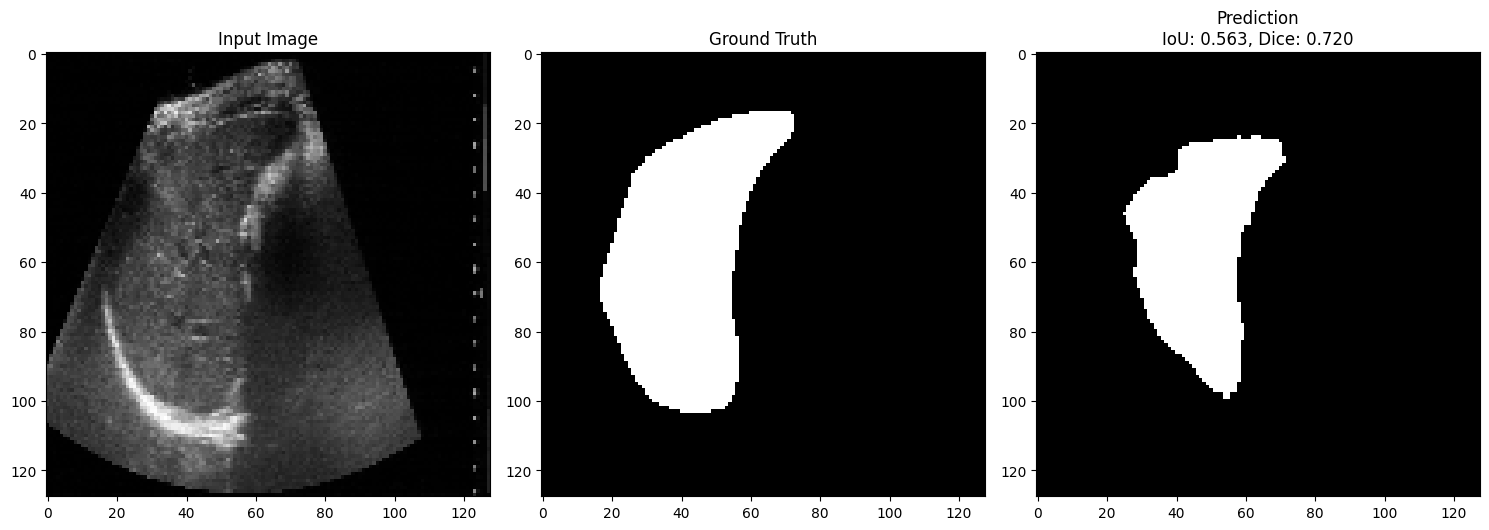

Processing image 37/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Processing image 38/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing image 39/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing image 40/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 41/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


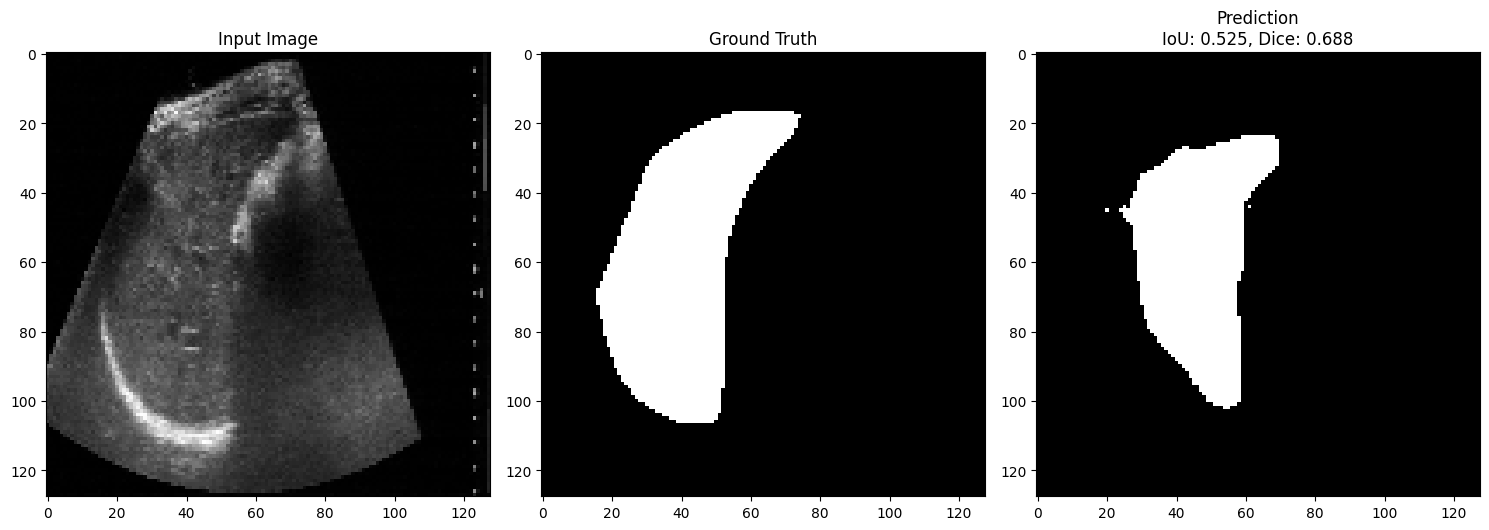

Processing image 42/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 43/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 44/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Processing image 45/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing image 46/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


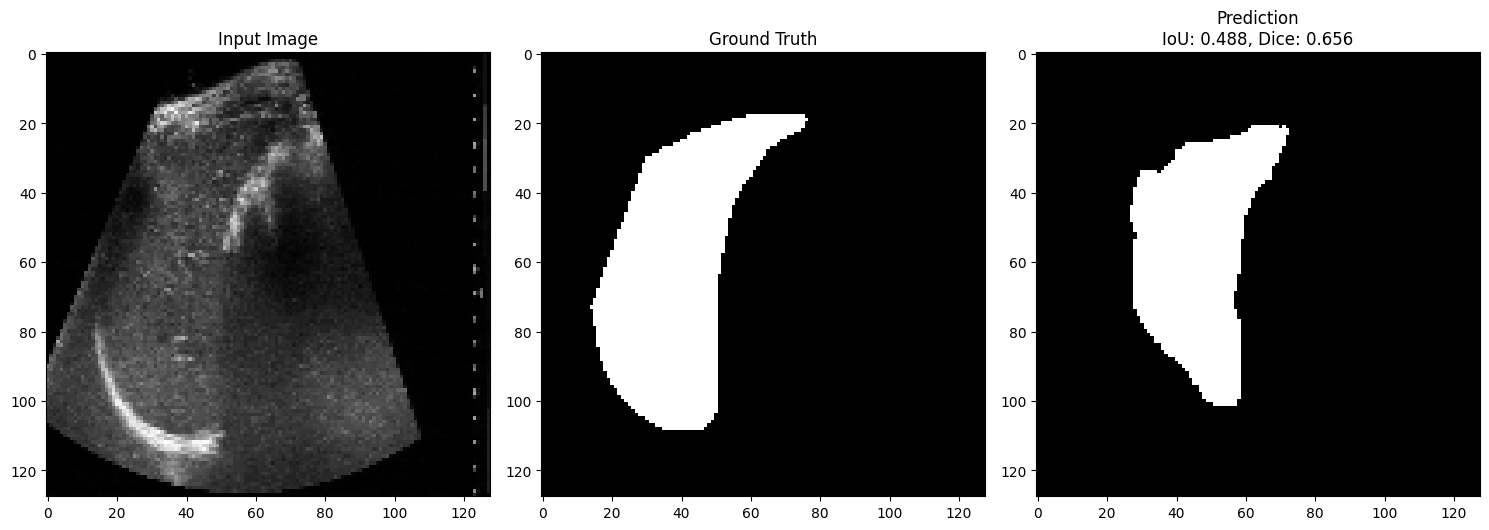

Processing image 47/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 48/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing image 49/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing image 50/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 51/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


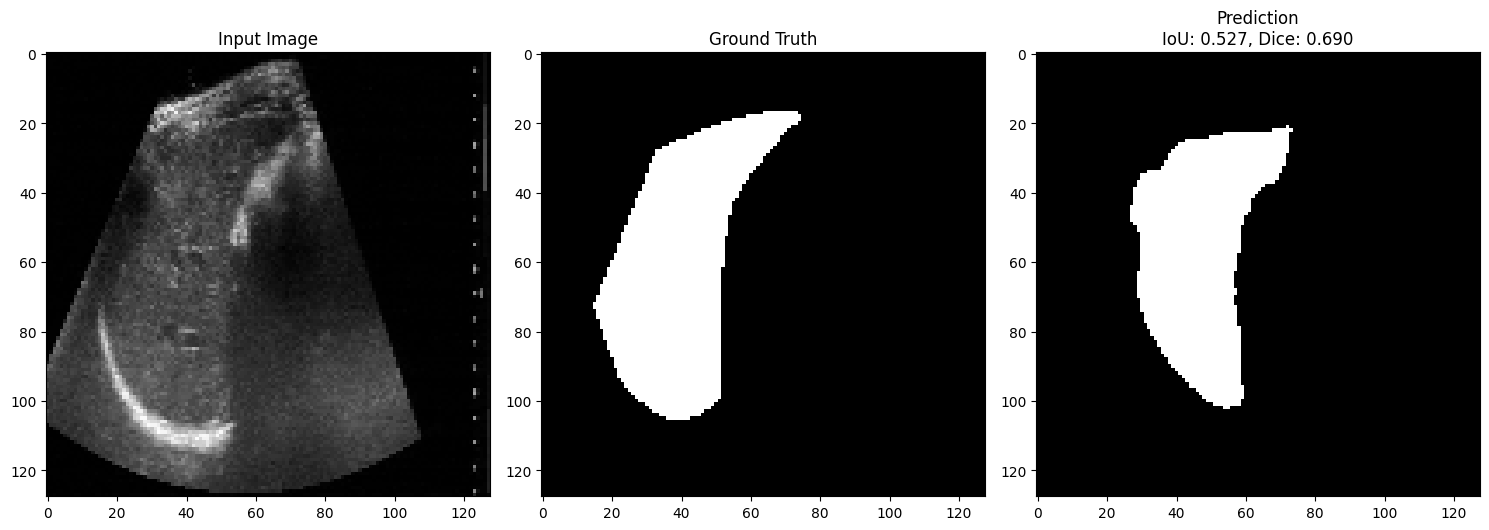

Processing image 52/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 53/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 54/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processing image 55/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing image 56/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


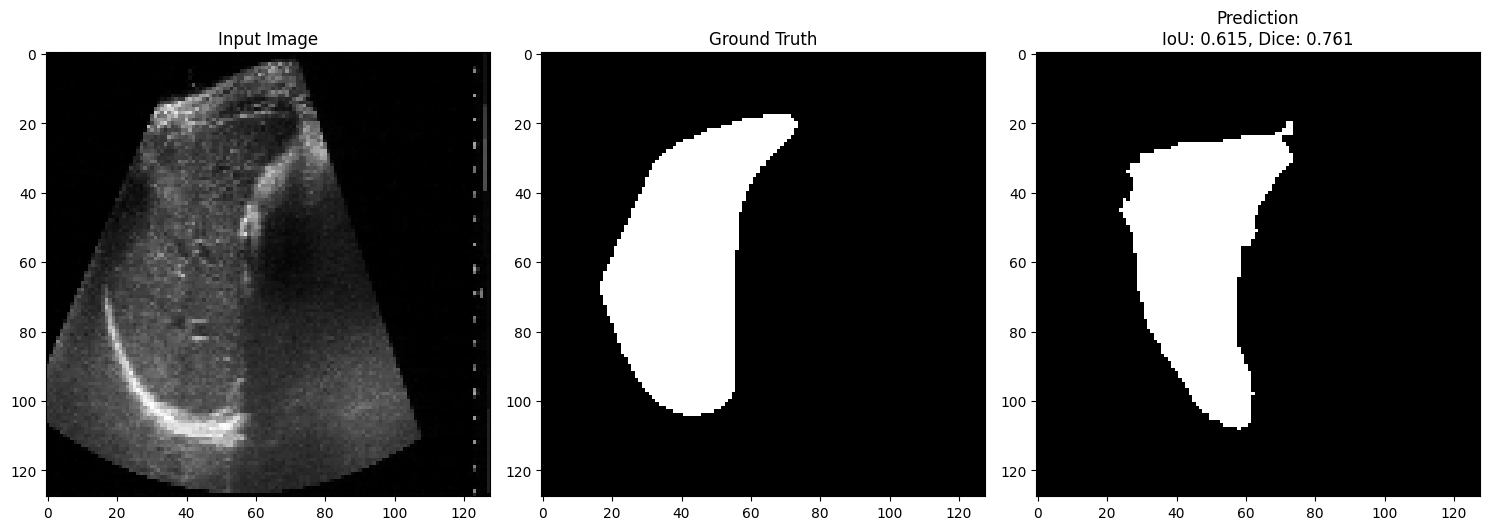

Processing image 57/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 58/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 59/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processing image 60/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Processing image 61/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


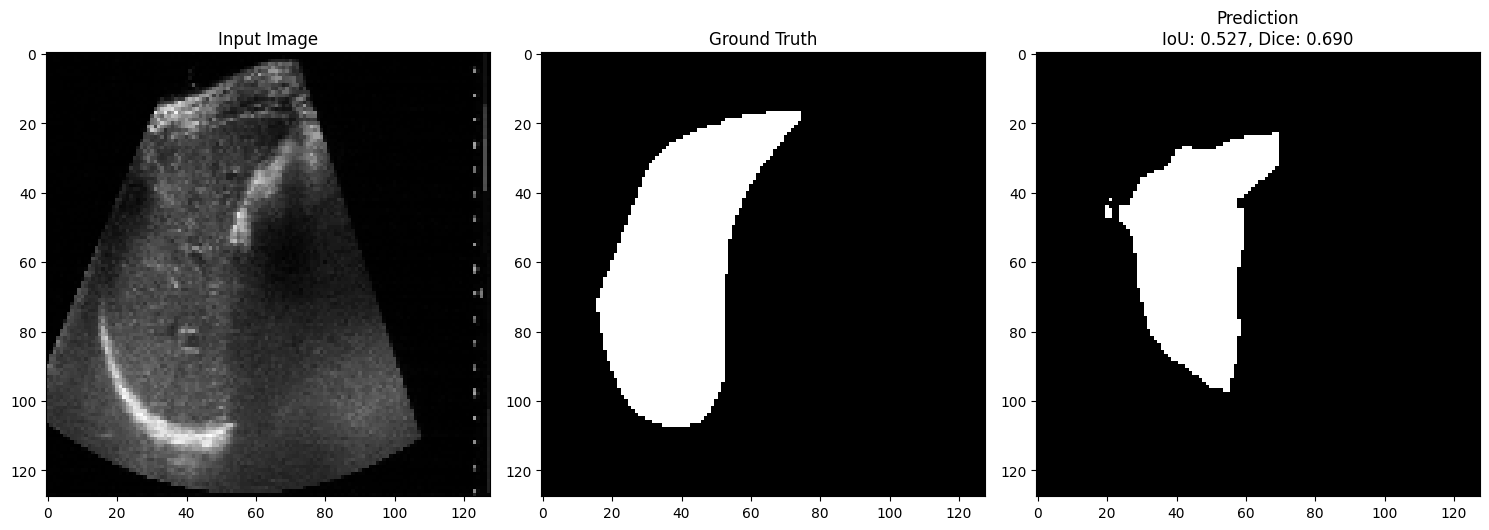

Processing image 62/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 63/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 64/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Processing image 65/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 66/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


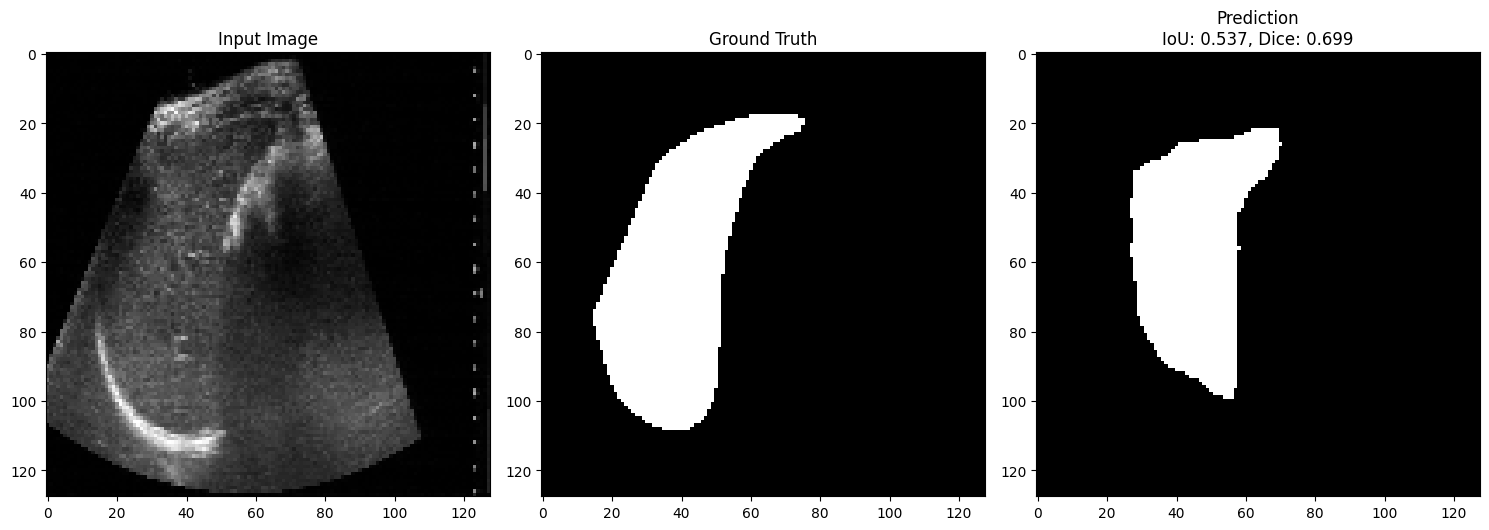

Processing image 67/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing image 68/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 69/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 70/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 71/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


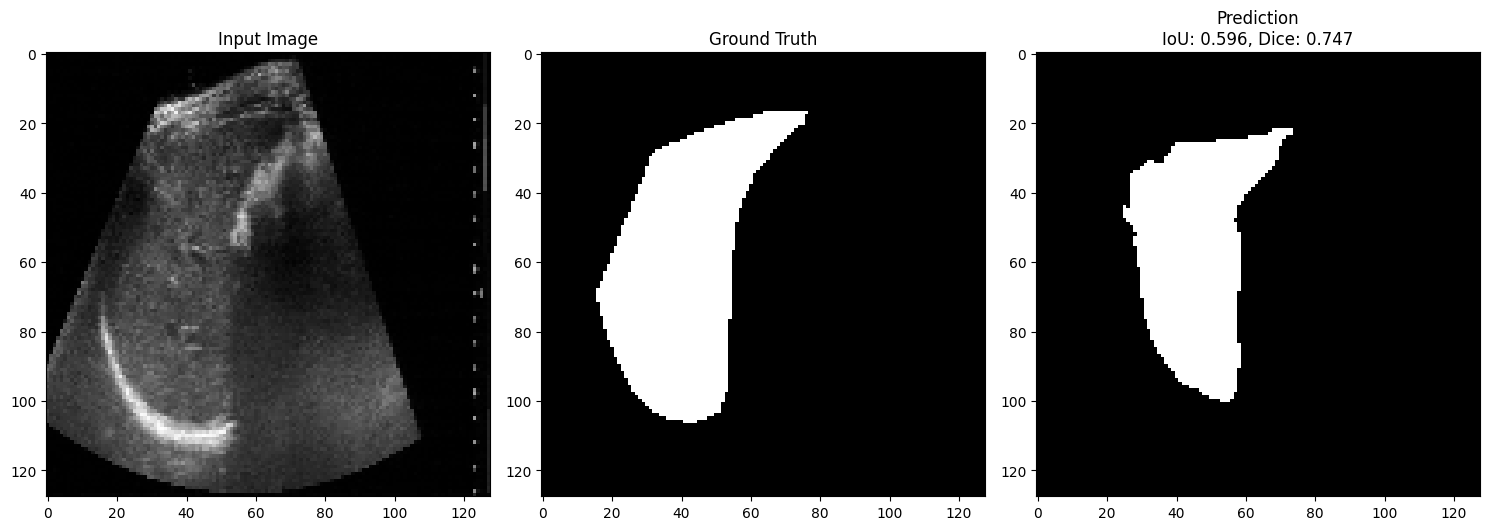

Processing image 72/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 73/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing image 74/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 75/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 76/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


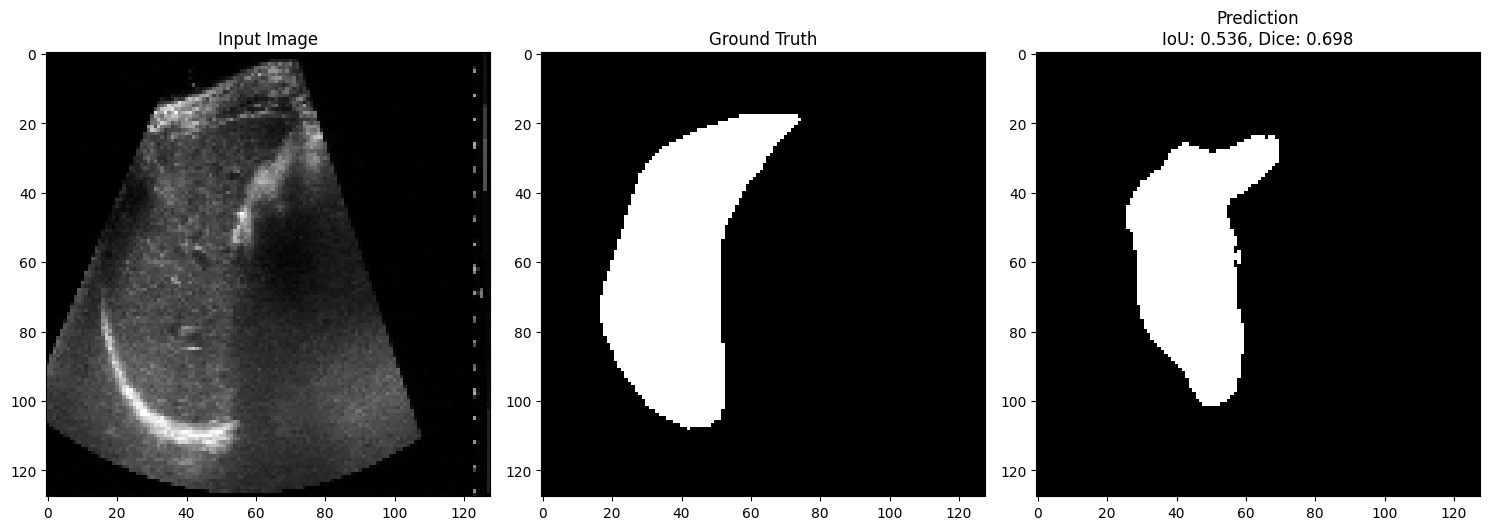

Processing image 77/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Processing image 78/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Processing image 79/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 80/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Processing image 81/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


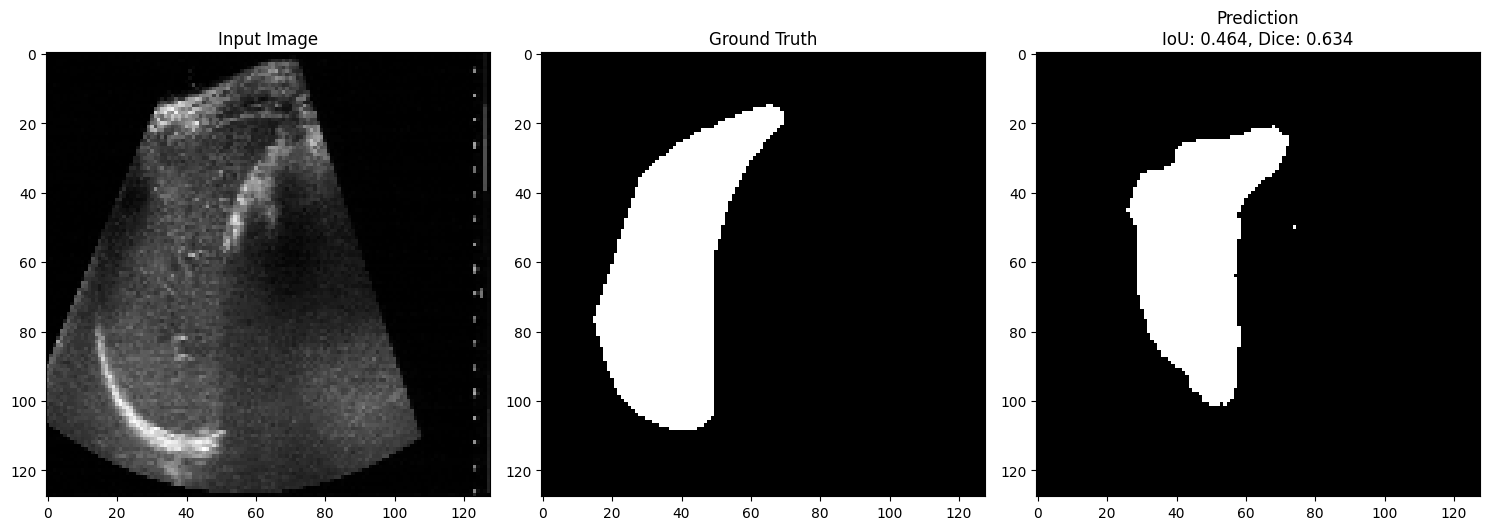

Processing image 82/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Processing image 83/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Processing image 84/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Processing image 85/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Processing image 86/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


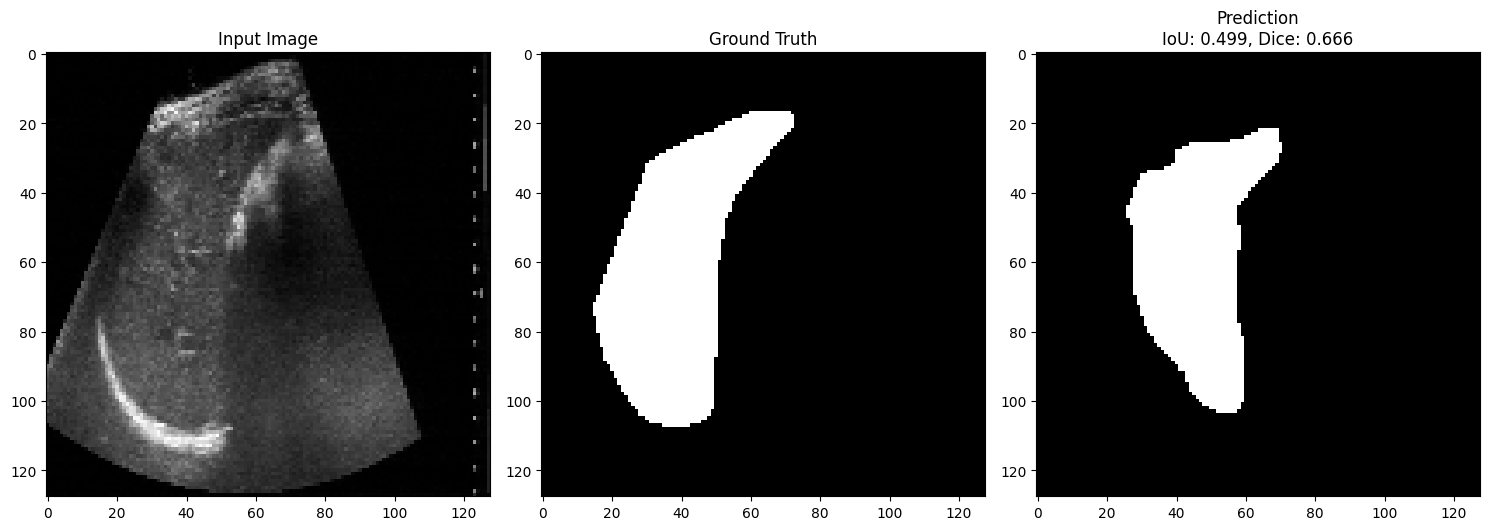

Processing image 87/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Processing image 88/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Processing image 89/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Processing image 90/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Processing image 91/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


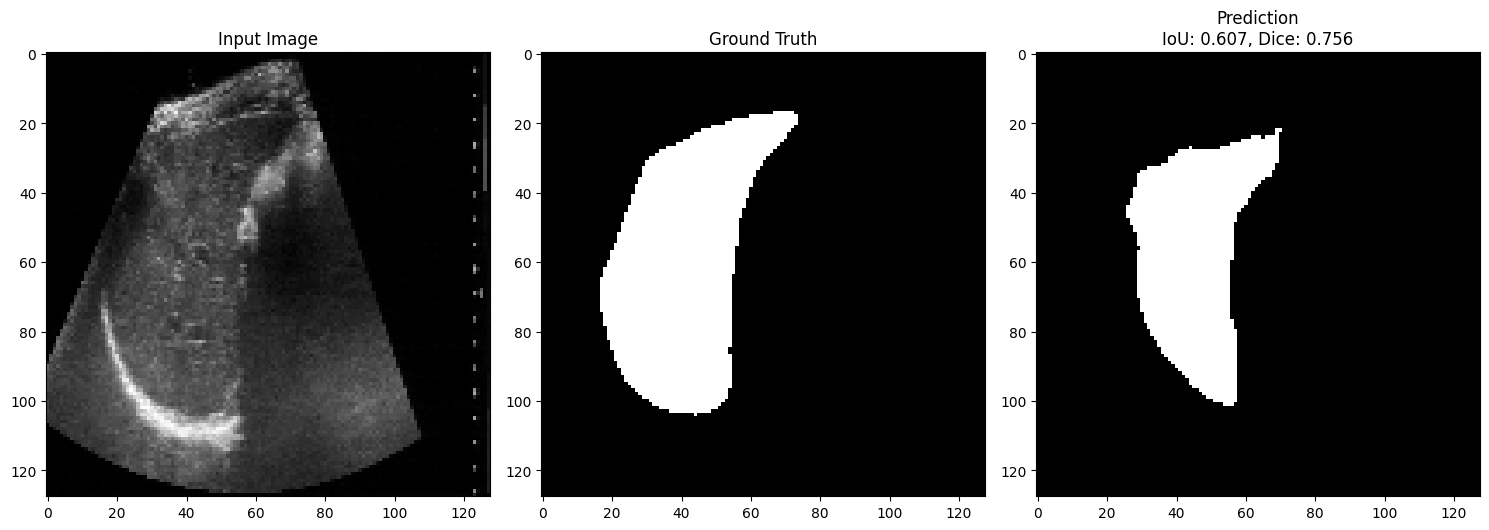

Processing image 92/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 93/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing image 94/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 95/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processing image 96/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


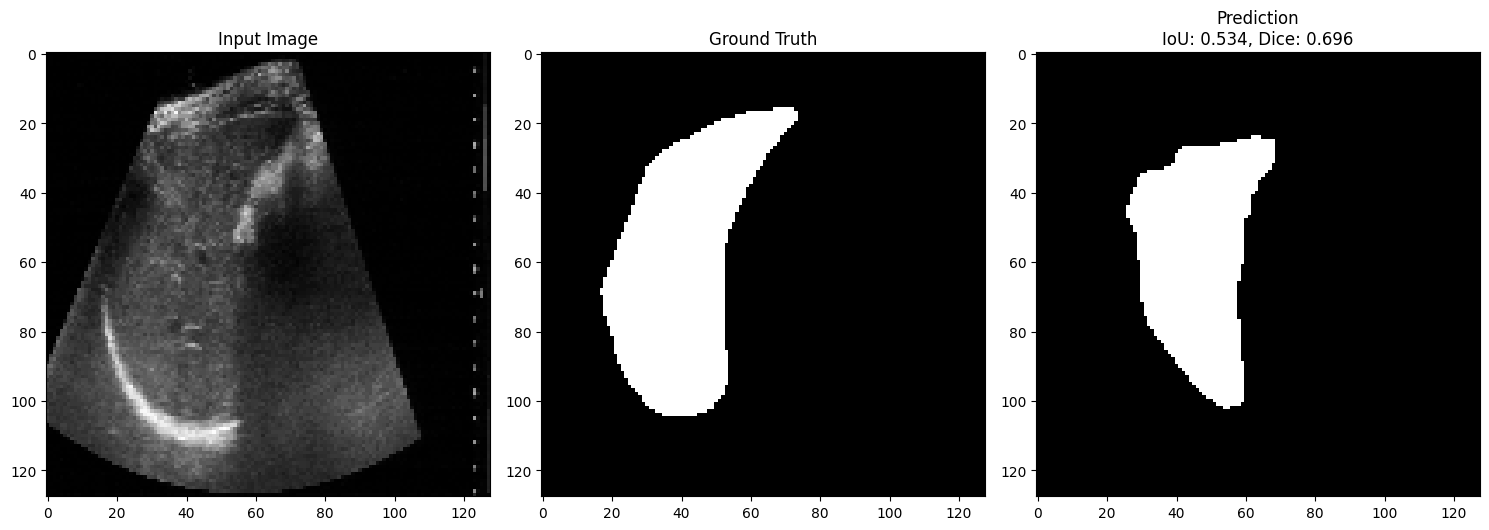

Processing image 97/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing image 98/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing image 99/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 100/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing image 101/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


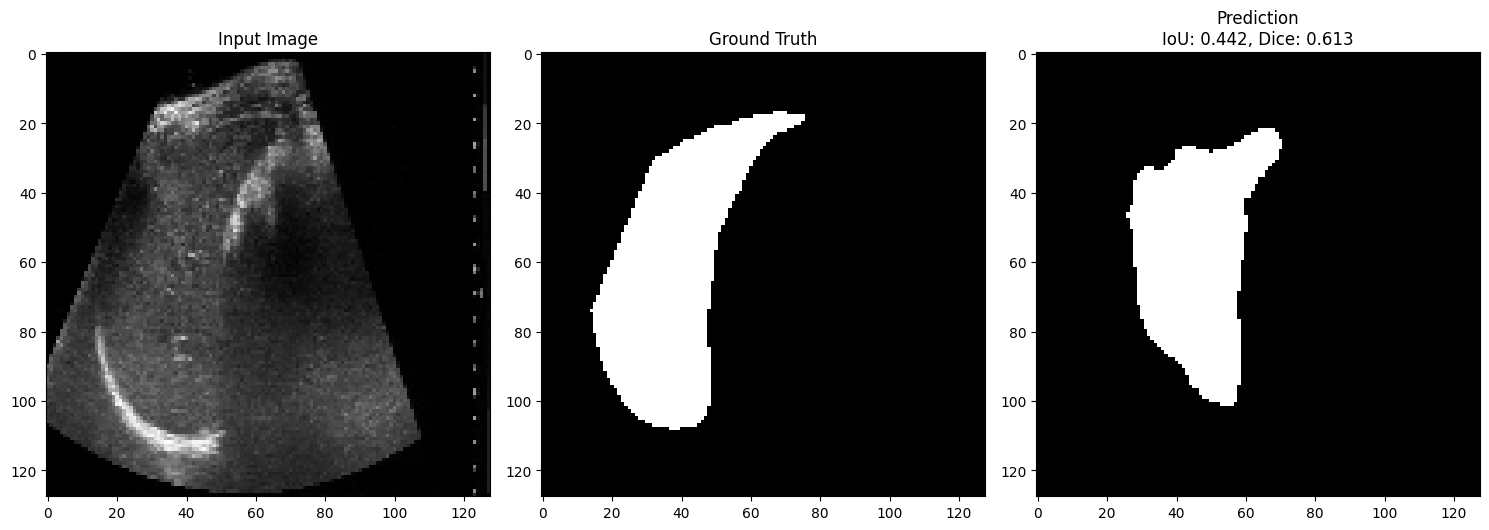

Processing image 102/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 103/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing image 104/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing image 105/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Processing image 106/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


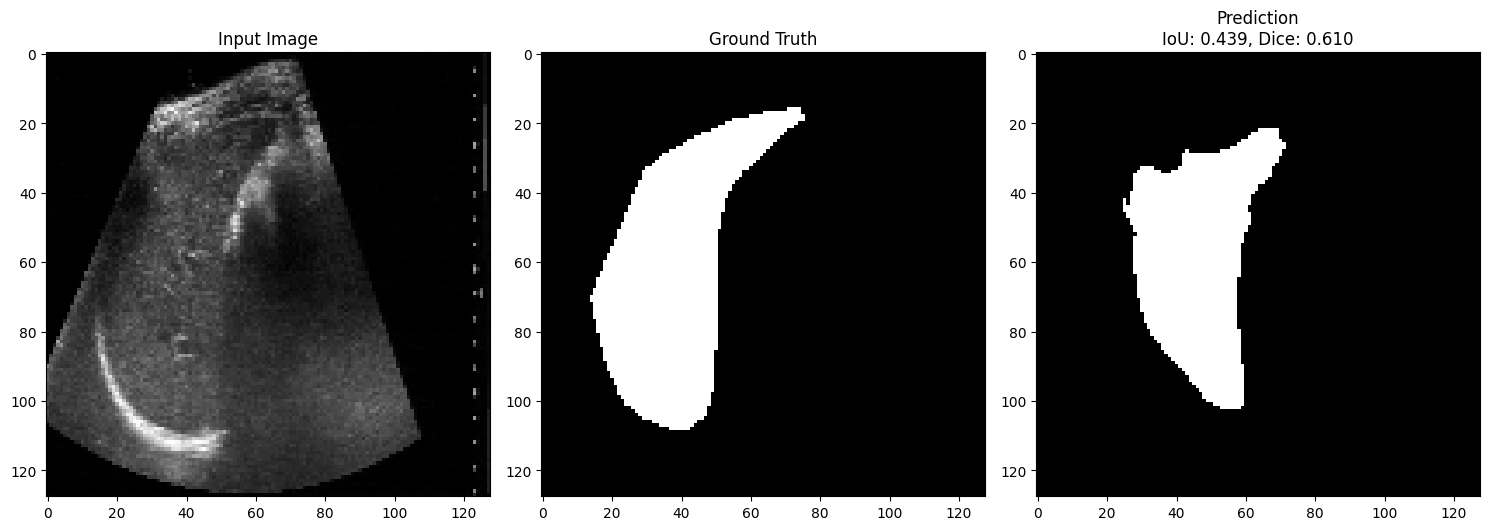

Processing image 107/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 108/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 109/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 110/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Processing image 111/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


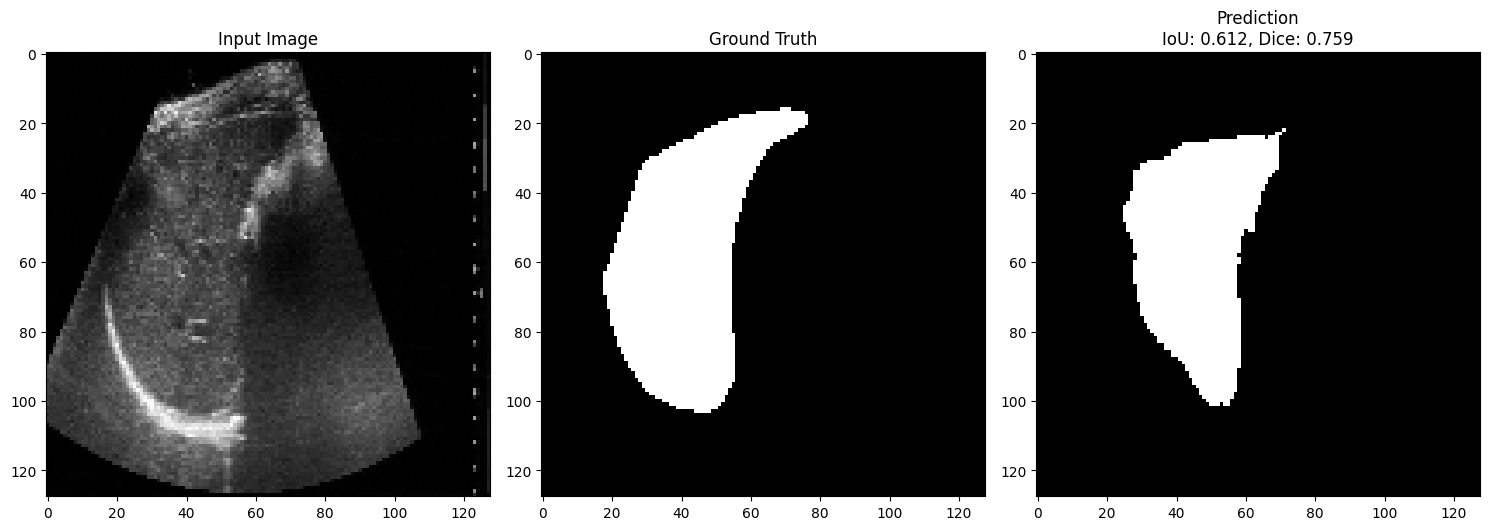

Processing image 112/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing image 113/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Processing image 114/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Processing image 115/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 116/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


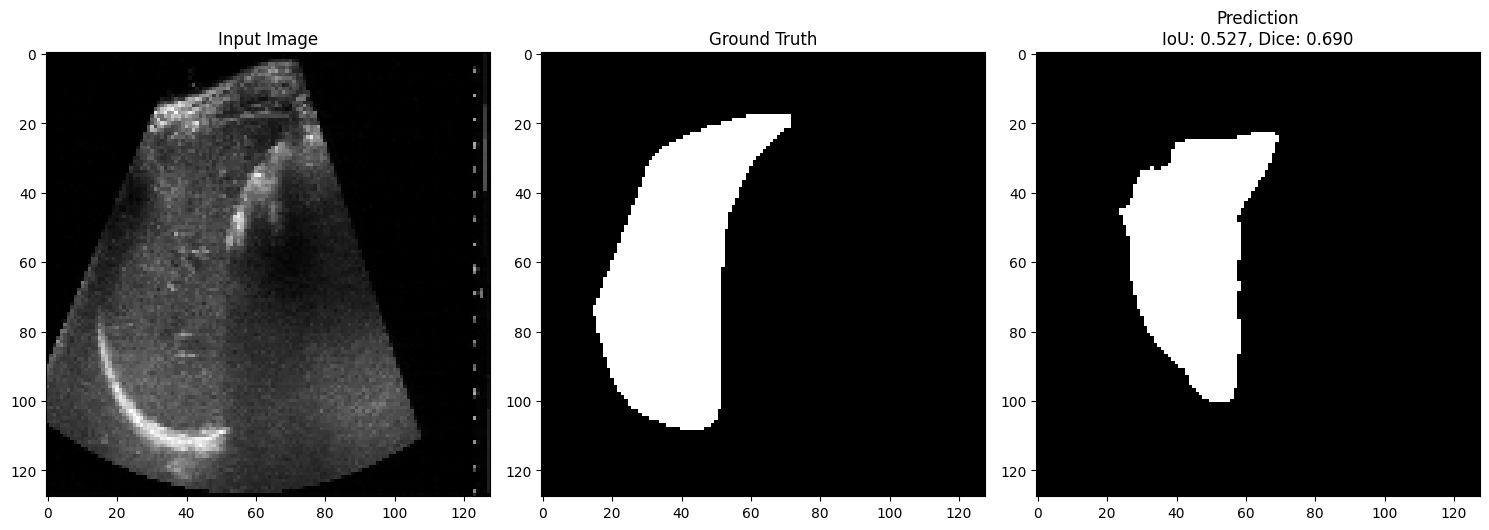

Processing image 117/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 118/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 119/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 120/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing image 121/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


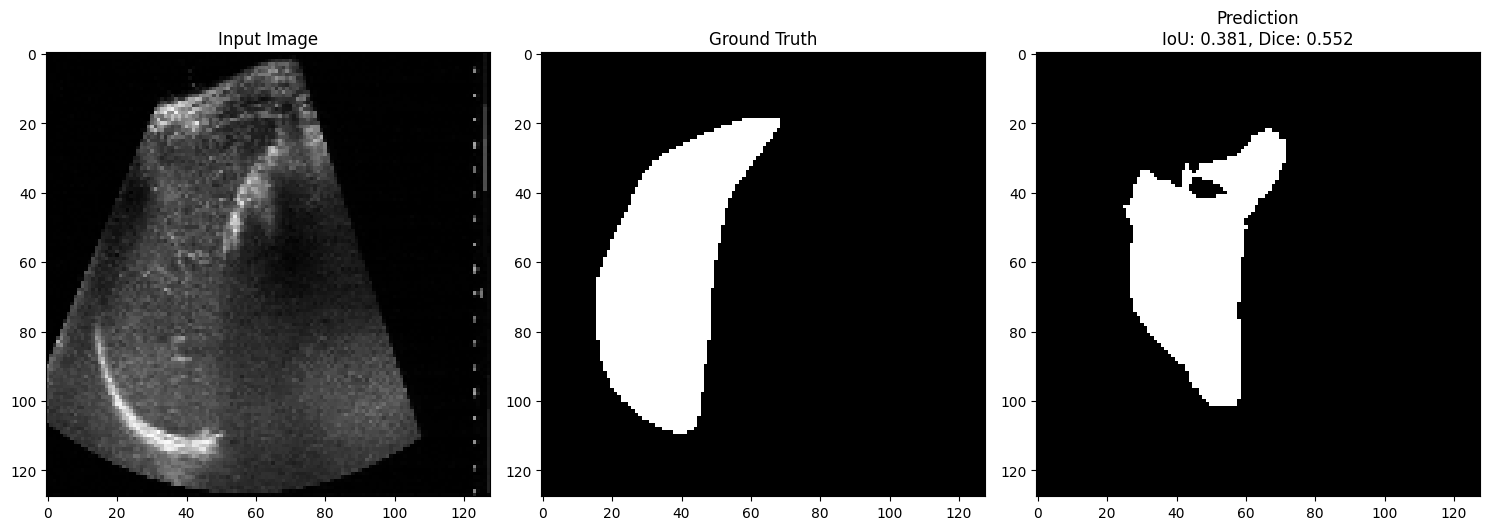

Processing image 122/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing image 123/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 124/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing image 125/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Processing image 126/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


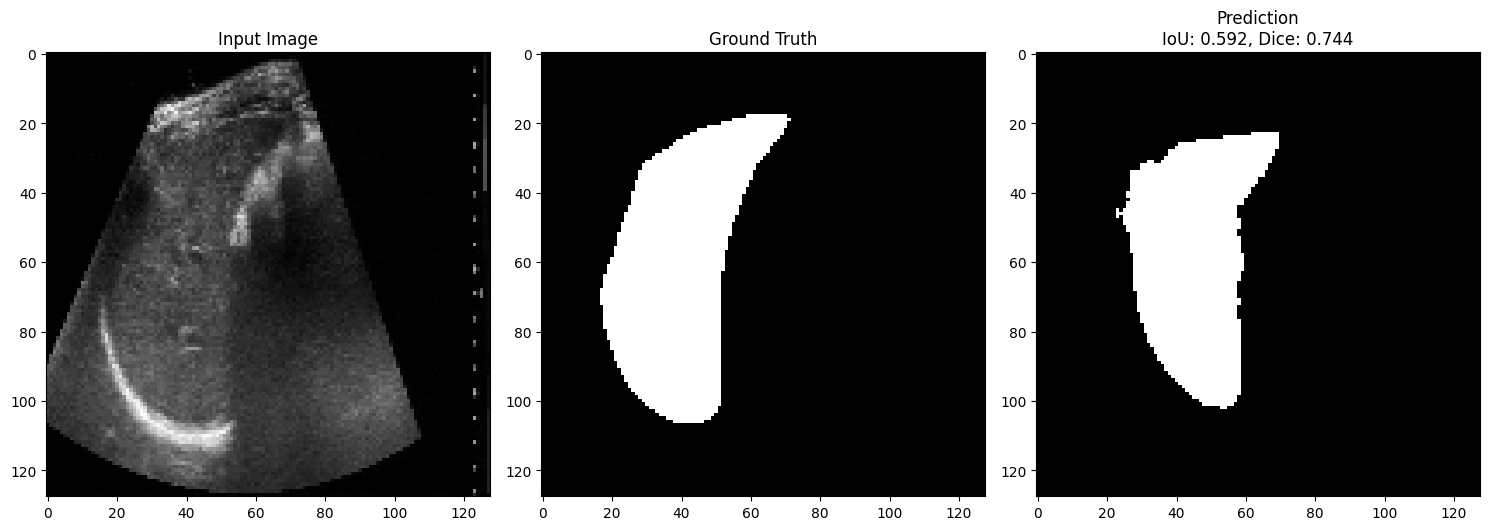

Processing image 127/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 128/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processing image 129/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 130/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 131/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


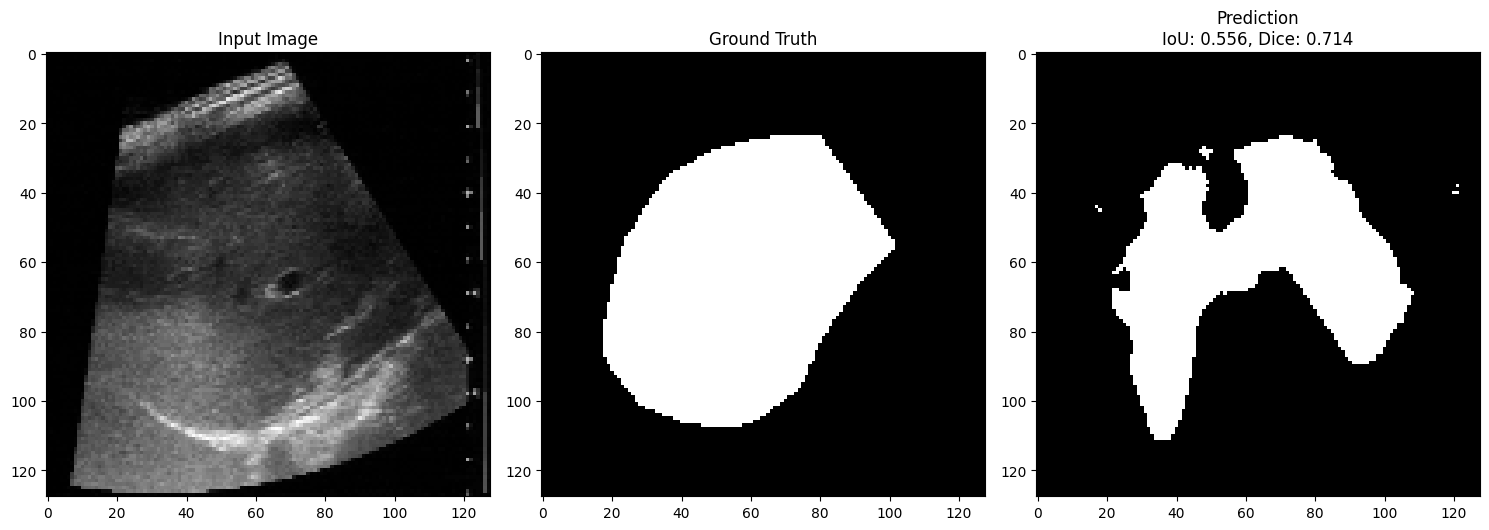

Processing image 132/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing image 133/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 134/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing image 135/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 136/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


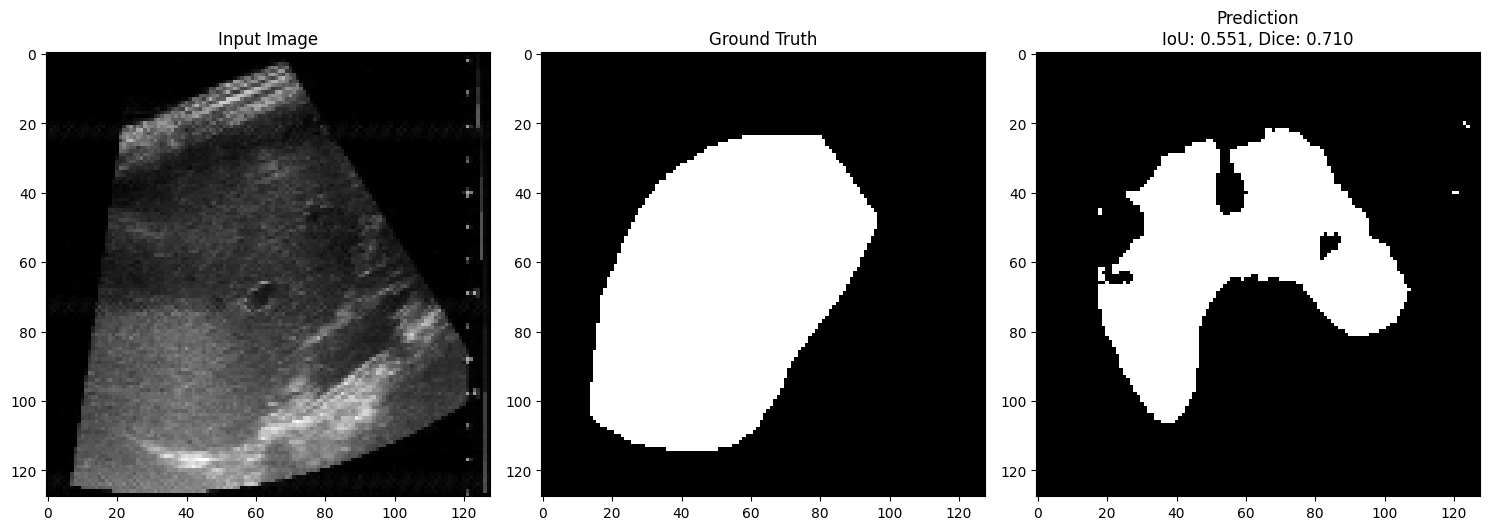

Processing image 137/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 138/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing image 139/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Processing image 140/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Processing image 141/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


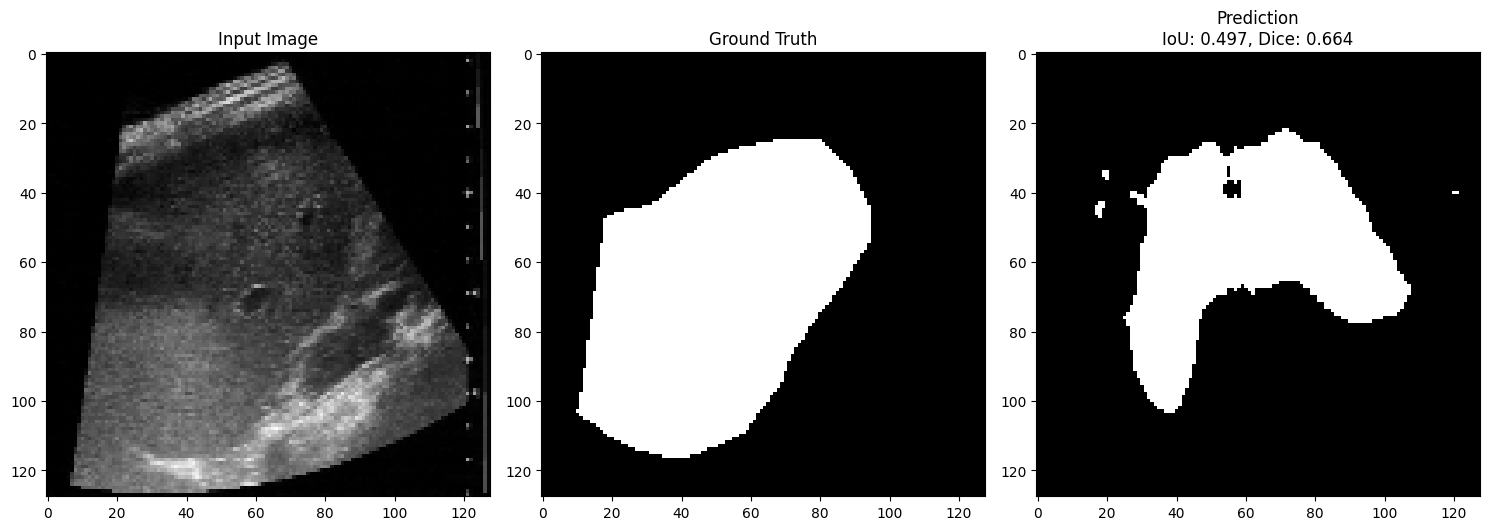

Processing image 142/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Processing image 143/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Processing image 144/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Processing image 145/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Processing image 146/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


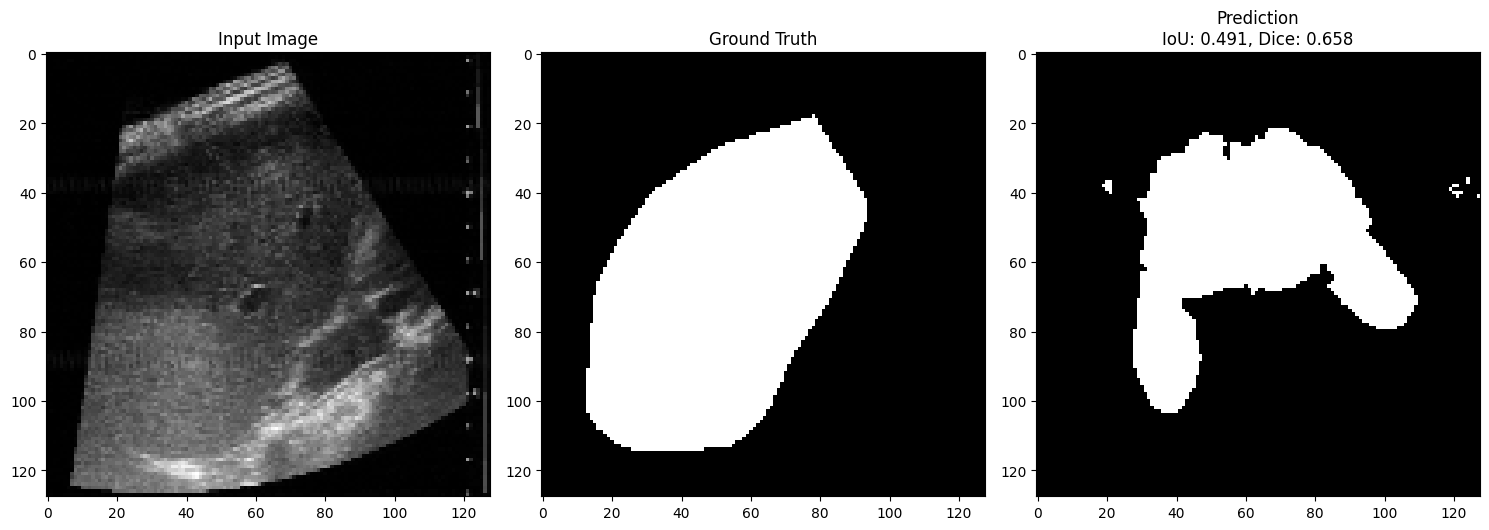

Processing image 147/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Processing image 148/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Processing image 149/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Processing image 150/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Processing image 151/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


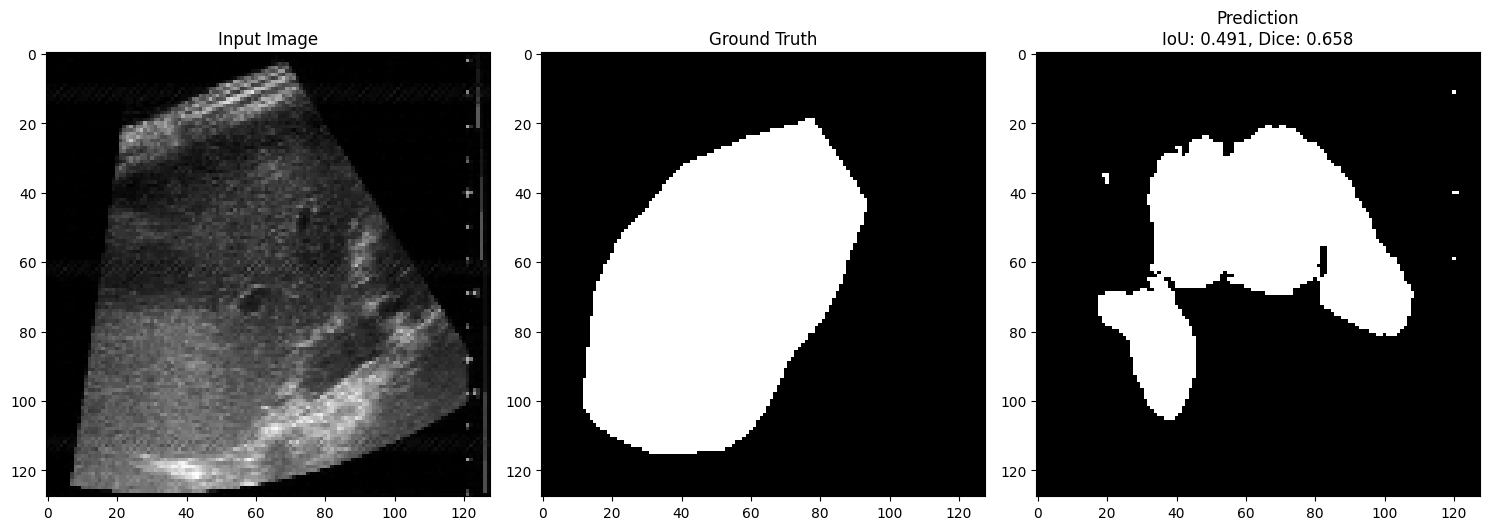

Processing image 152/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 153/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing image 154/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 155/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 156/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


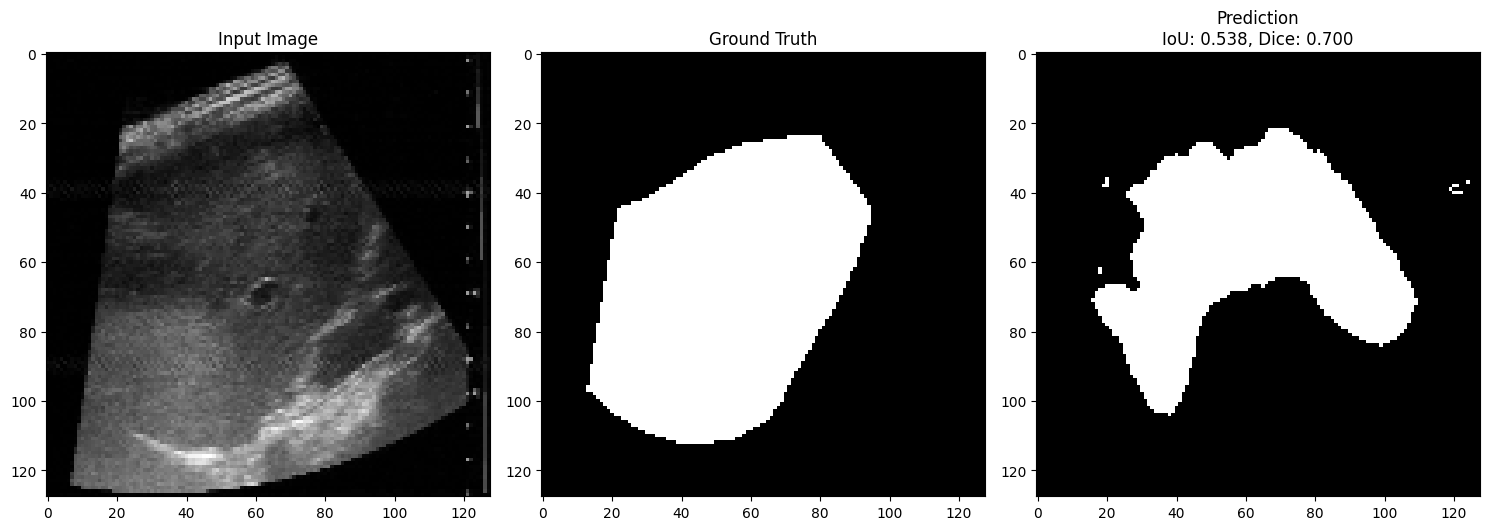

Processing image 157/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processing image 158/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 159/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Processing image 160/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing image 161/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


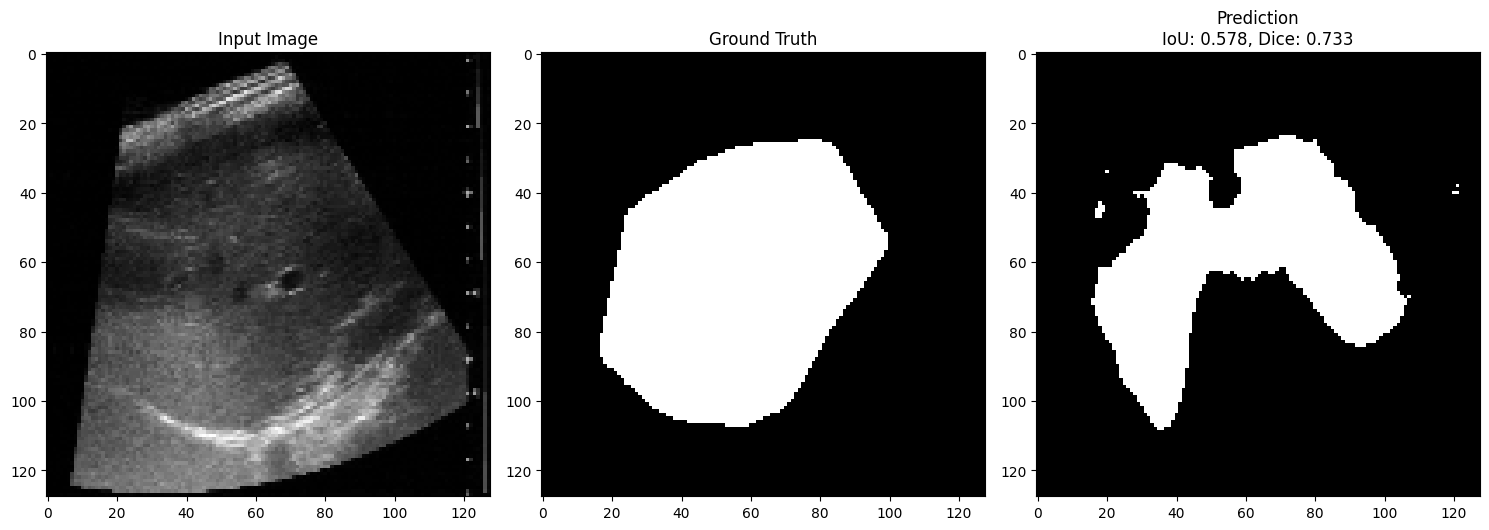

Processing image 162/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 163/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 164/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 165/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Processing image 166/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


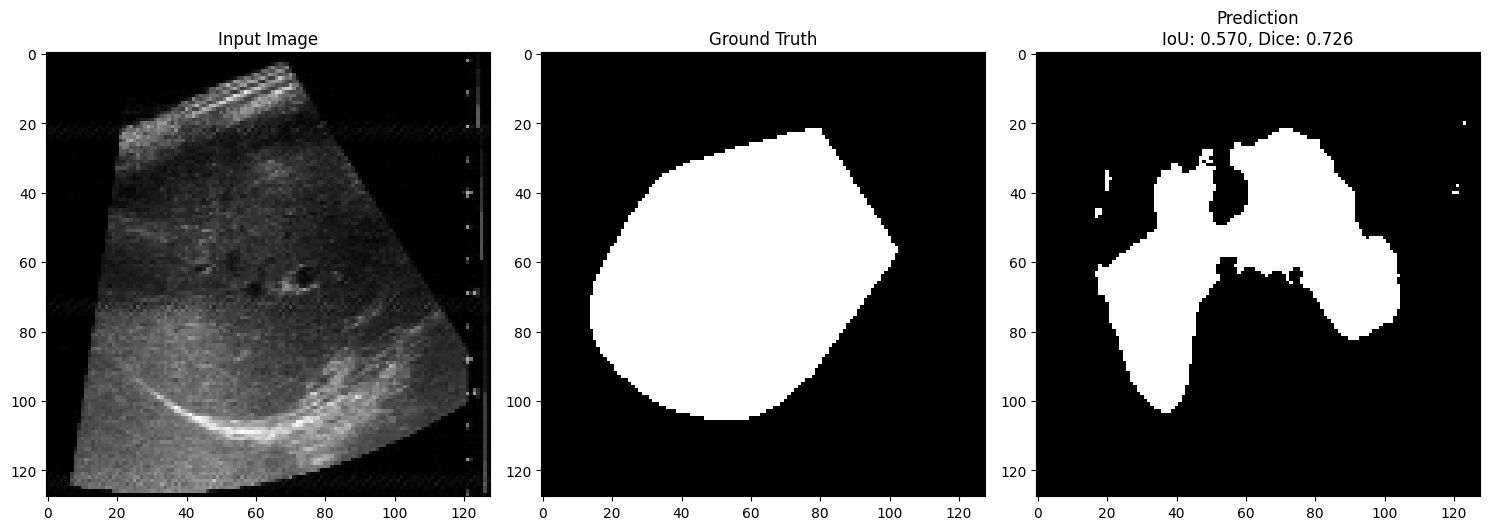

Processing image 167/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 168/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processing image 169/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Processing image 170/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 171/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


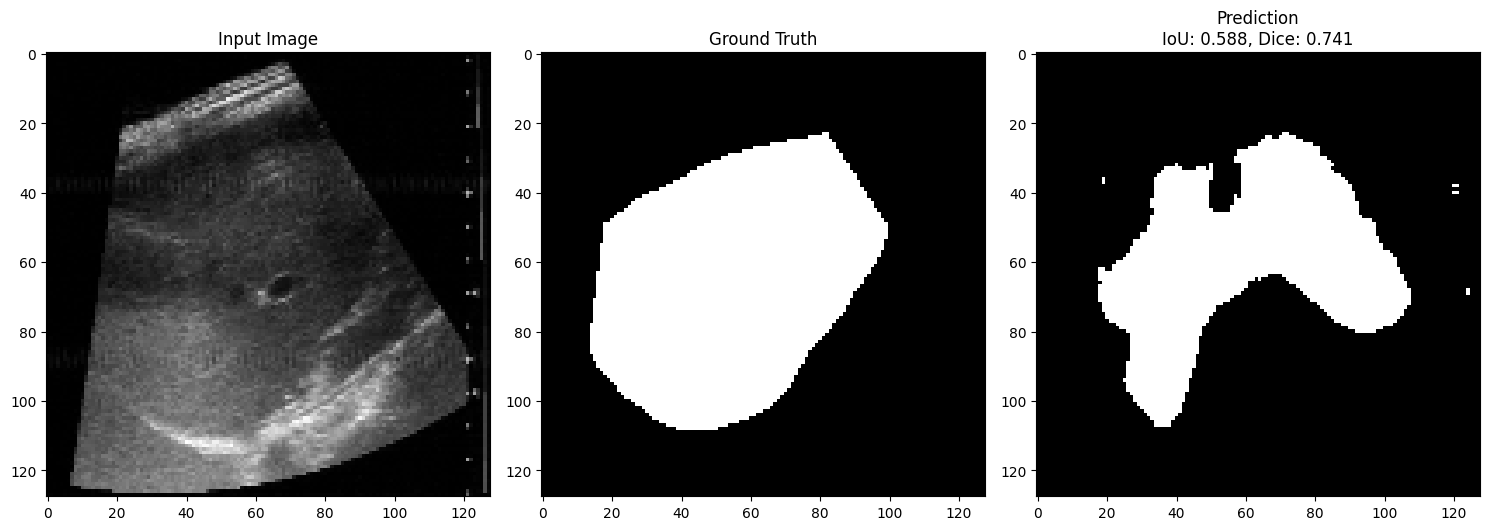

Processing image 172/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing image 173/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Processing image 174/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing image 175/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Processing image 176/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


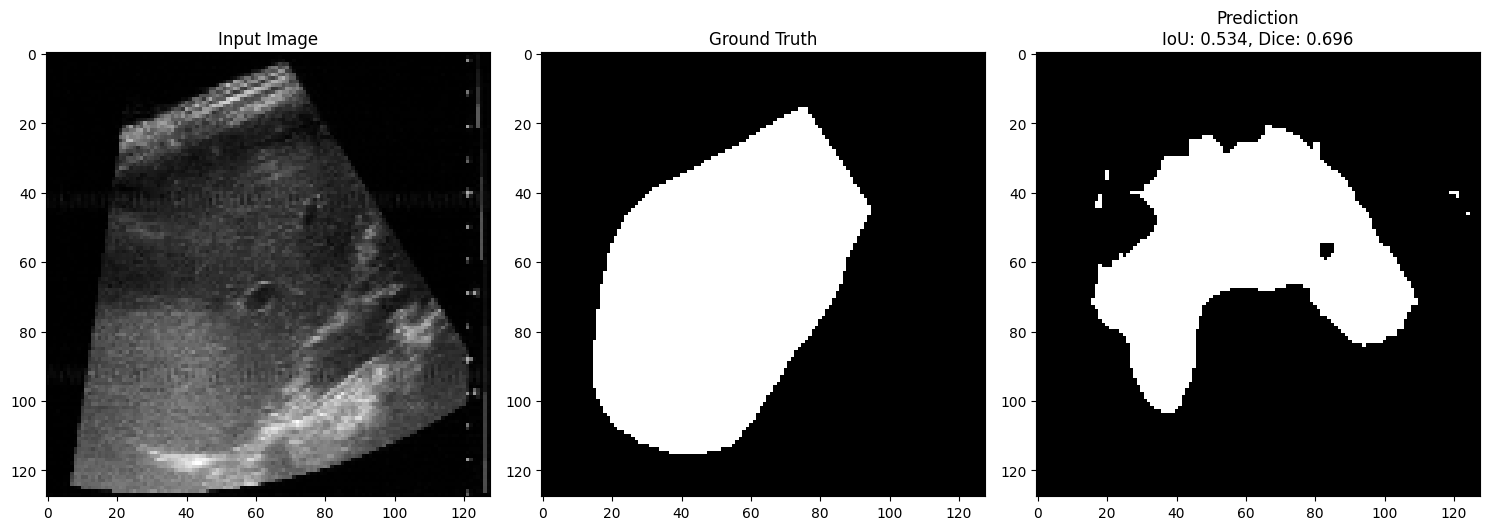

Processing image 177/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processing image 178/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 179/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 180/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Processing image 181/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


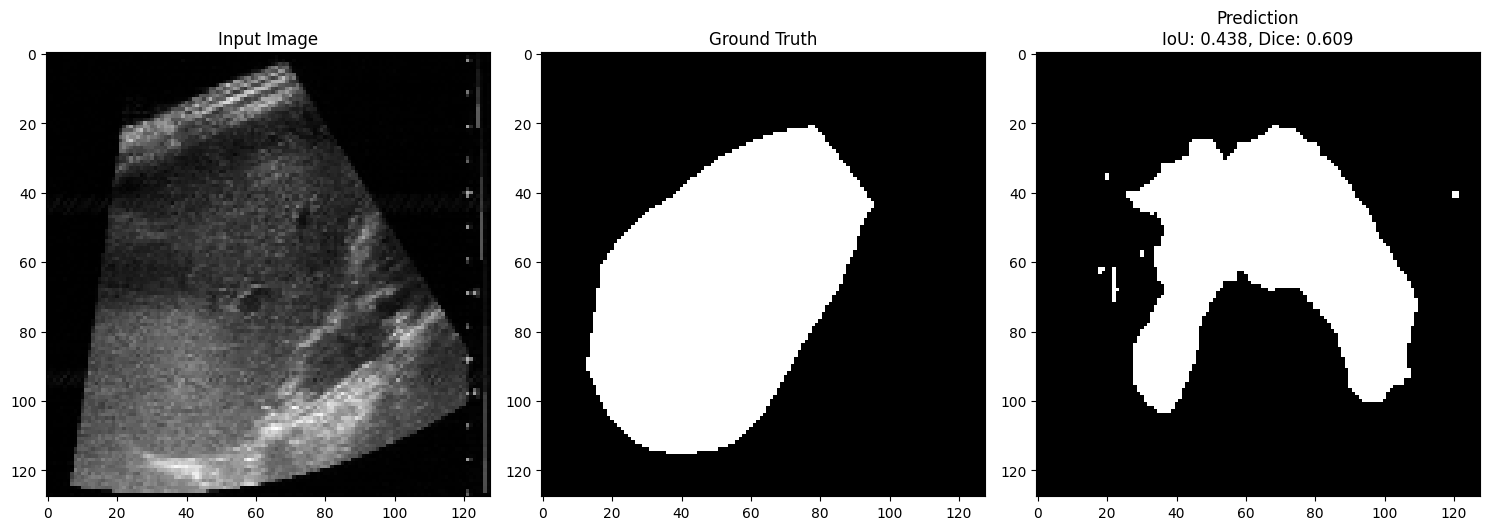

Processing image 182/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 183/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 184/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing image 185/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 186/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


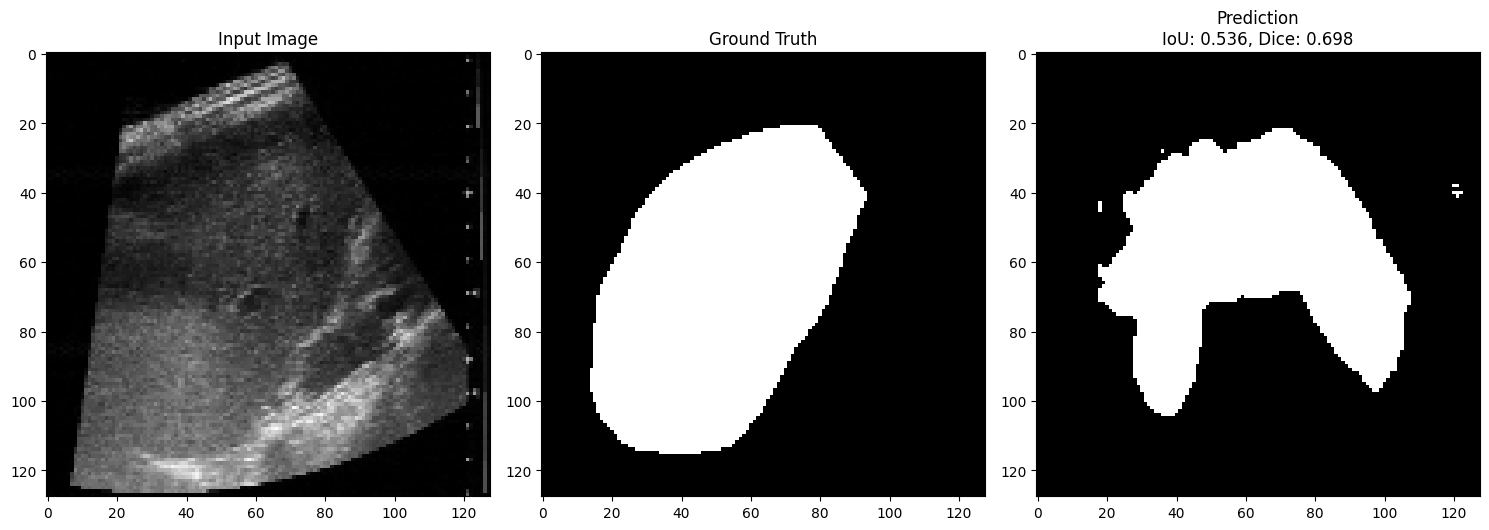

Processing image 187/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 188/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Processing image 189/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 190/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 191/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


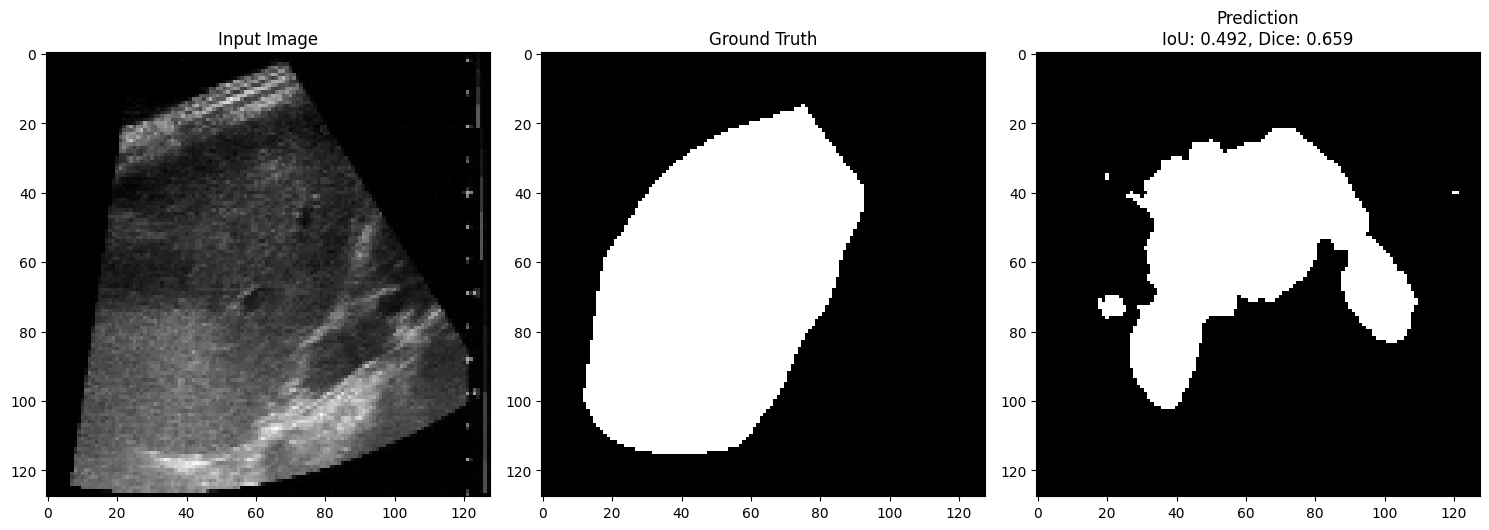

Processing image 192/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 193/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 194/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Processing image 195/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Processing image 196/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


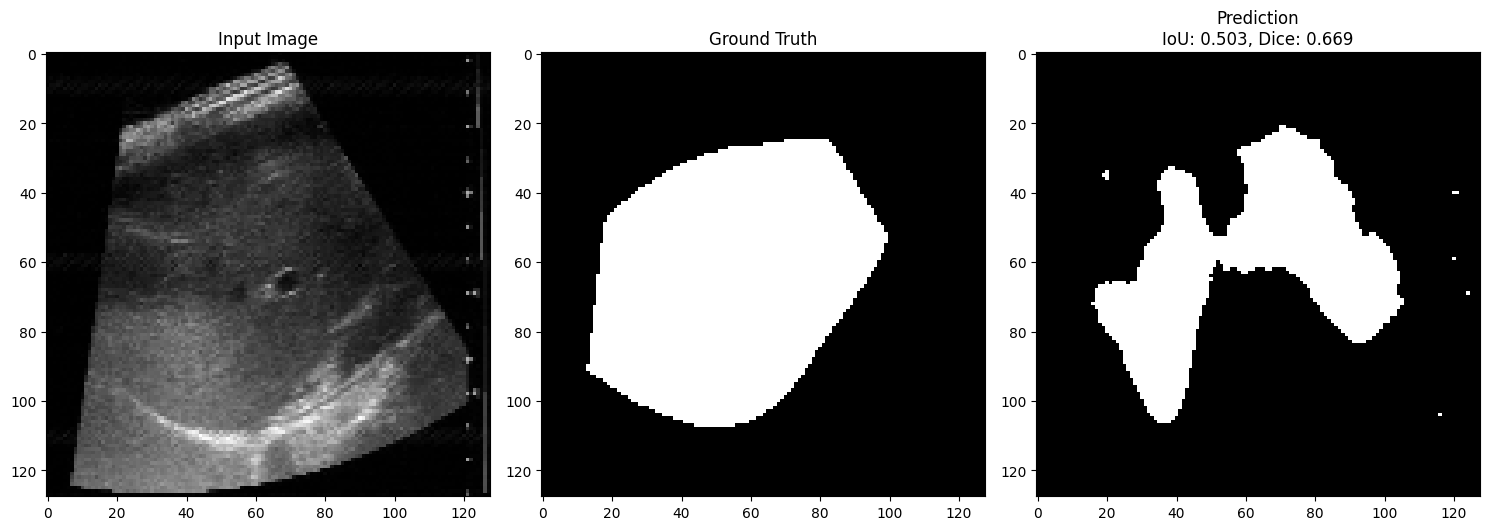

Processing image 197/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Processing image 198/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Processing image 199/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Processing image 200/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Processing image 201/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


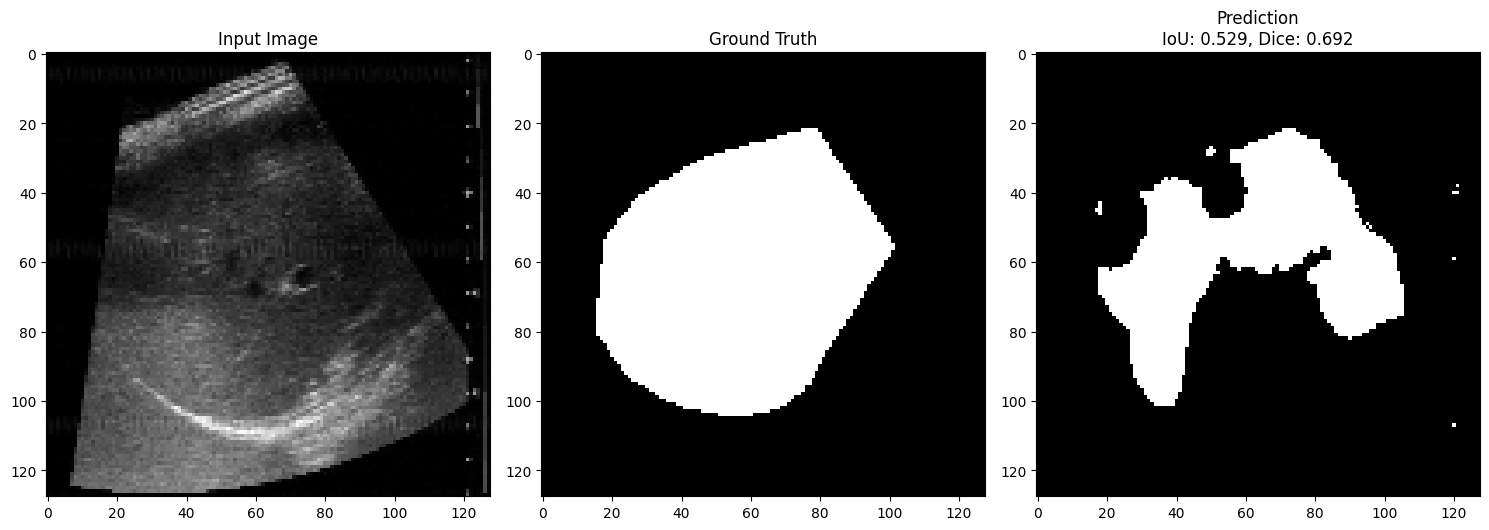

Processing image 202/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 203/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Processing image 204/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Processing image 205/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 206/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


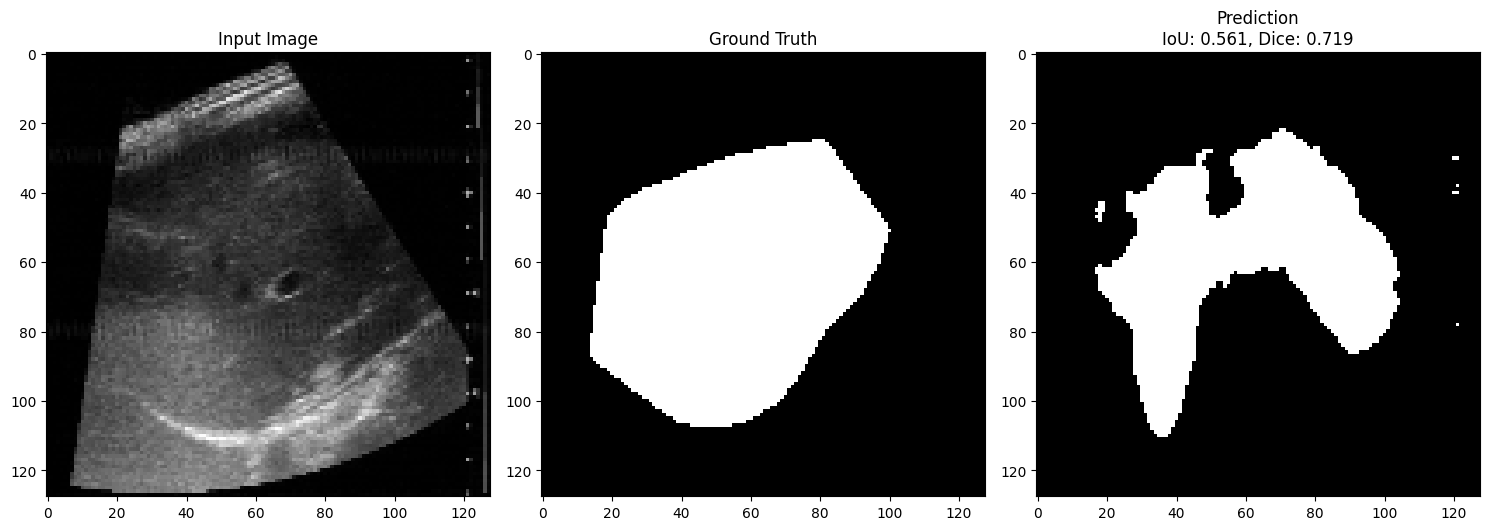

Processing image 207/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Processing image 208/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 209/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Processing image 210/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Processing image 211/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


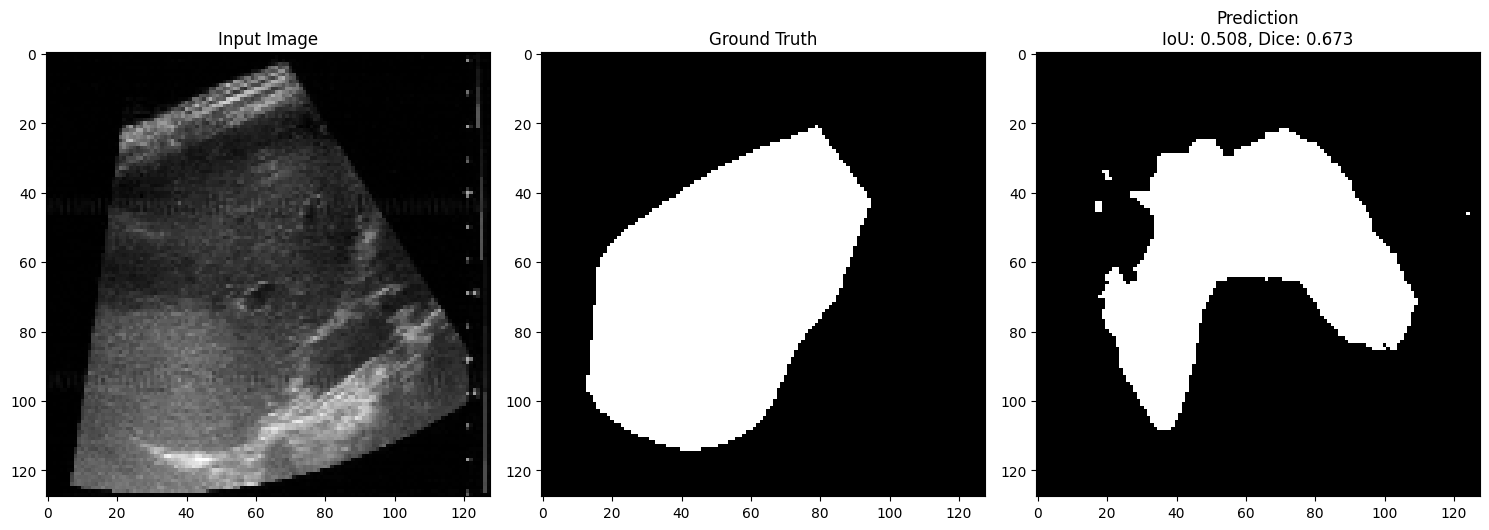

Processing image 212/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing image 213/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 214/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Processing image 215/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Processing image 216/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


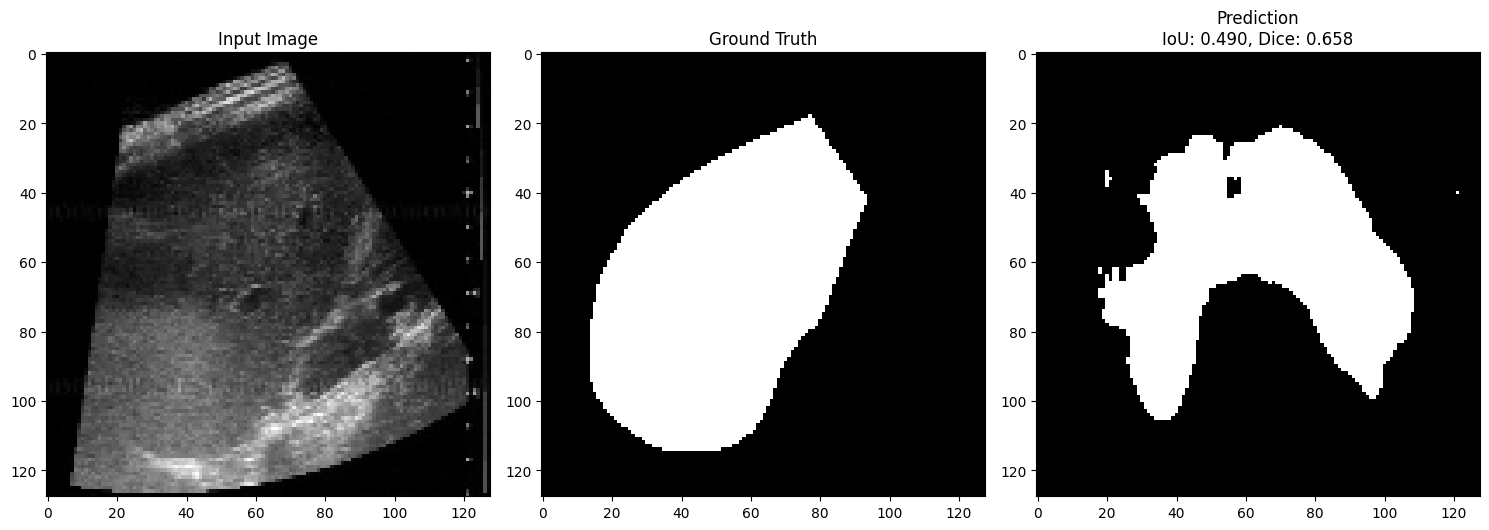

Processing image 217/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 218/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 219/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 220/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing image 221/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


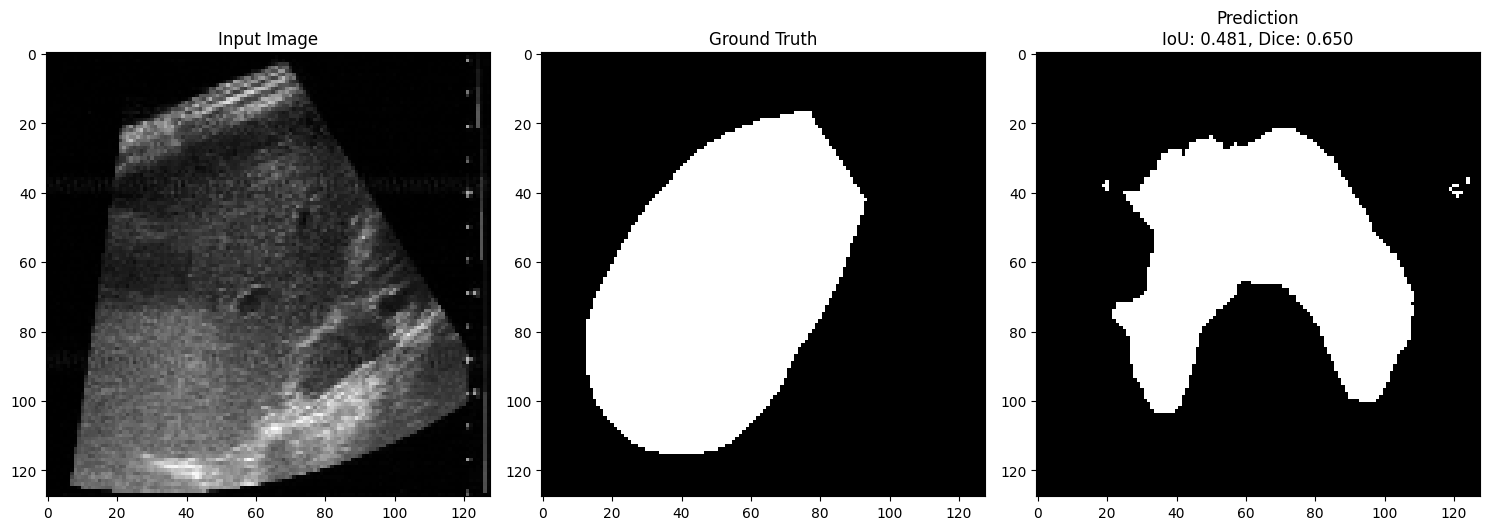

Processing image 222/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing image 223/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processing image 224/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Processing image 225/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing image 226/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


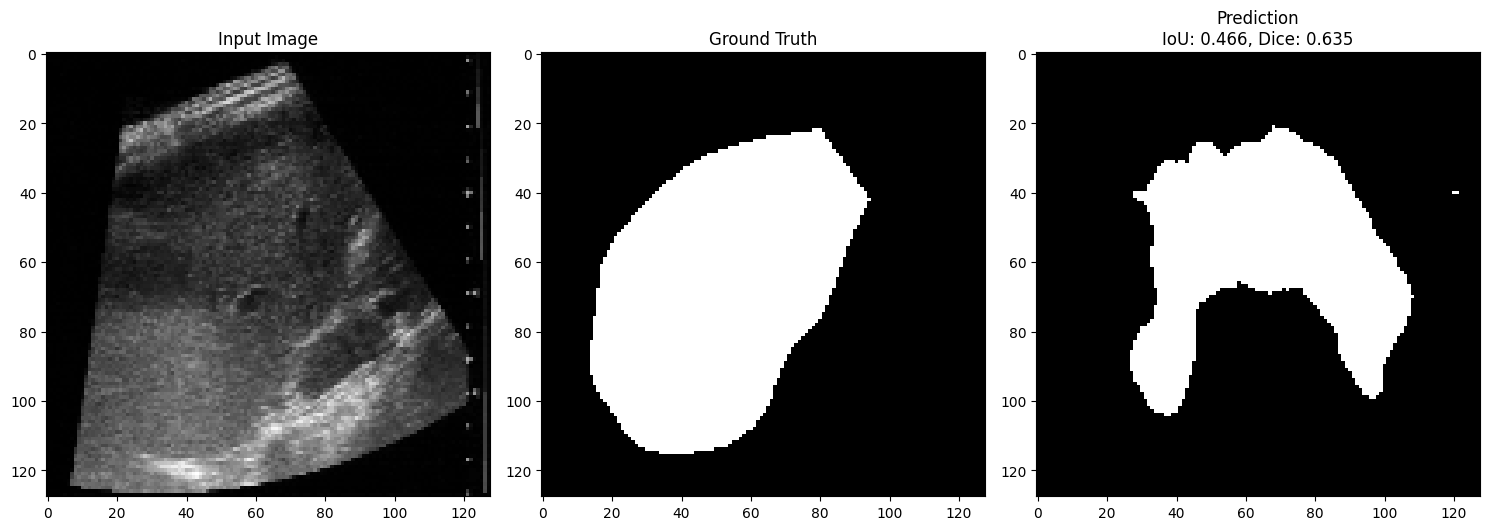

Processing image 227/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Processing image 228/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing image 229/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 230/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 231/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


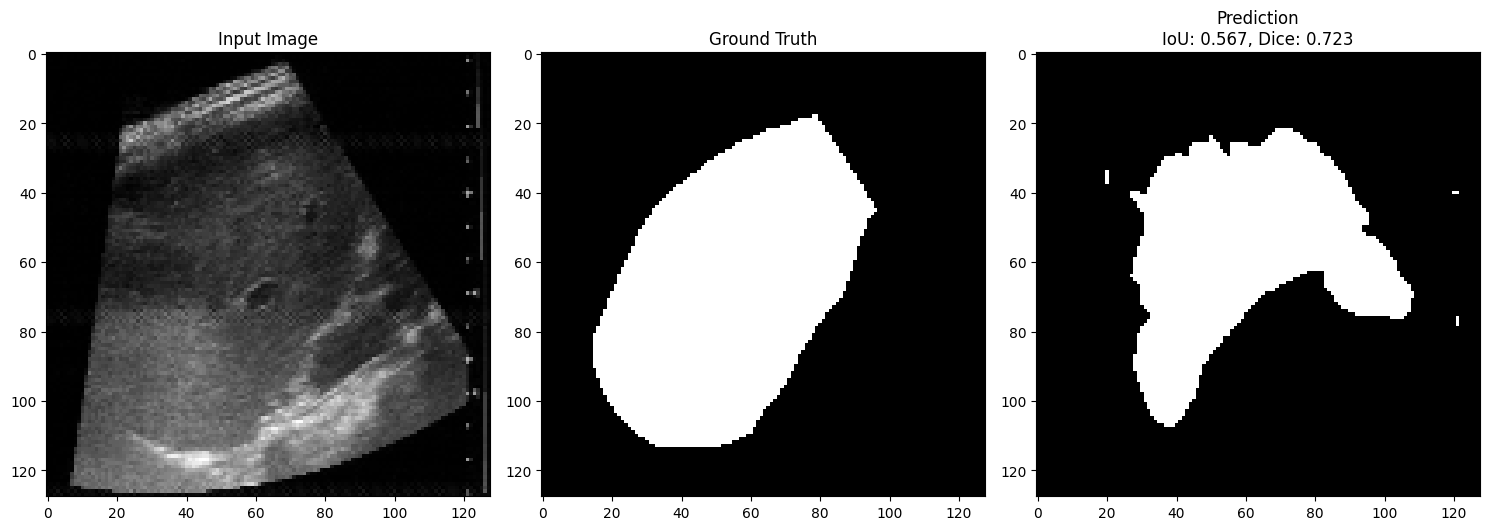

Processing image 232/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Processing image 233/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 234/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 235/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing image 236/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


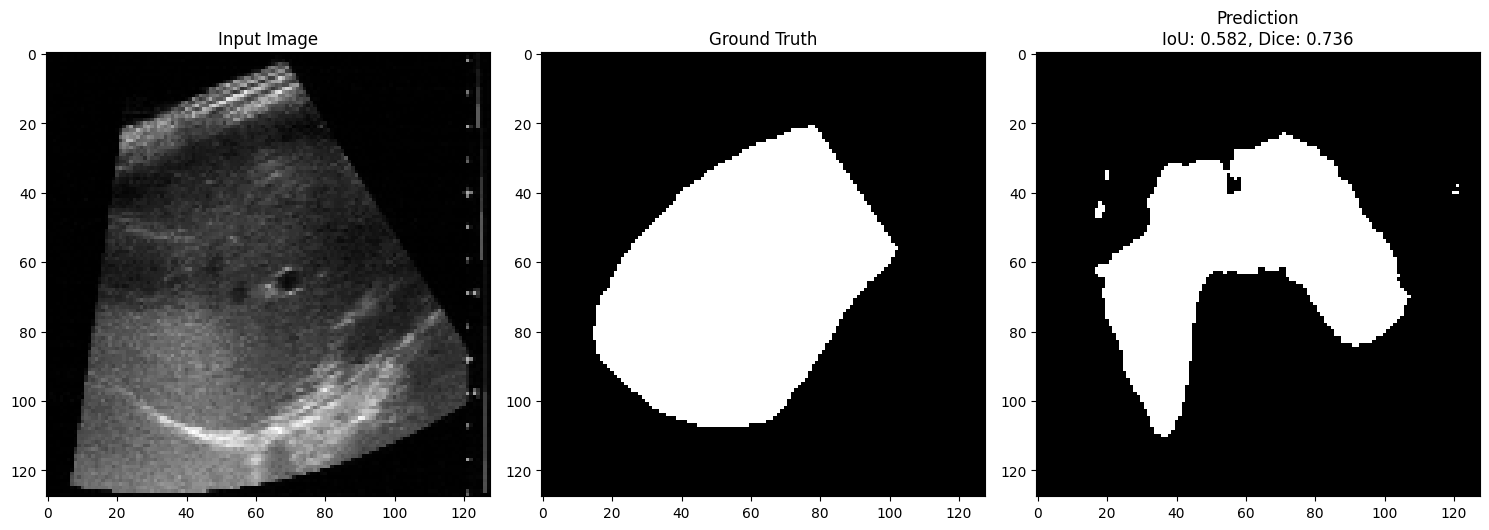

Processing image 237/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 238/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 239/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 240/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing image 241/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


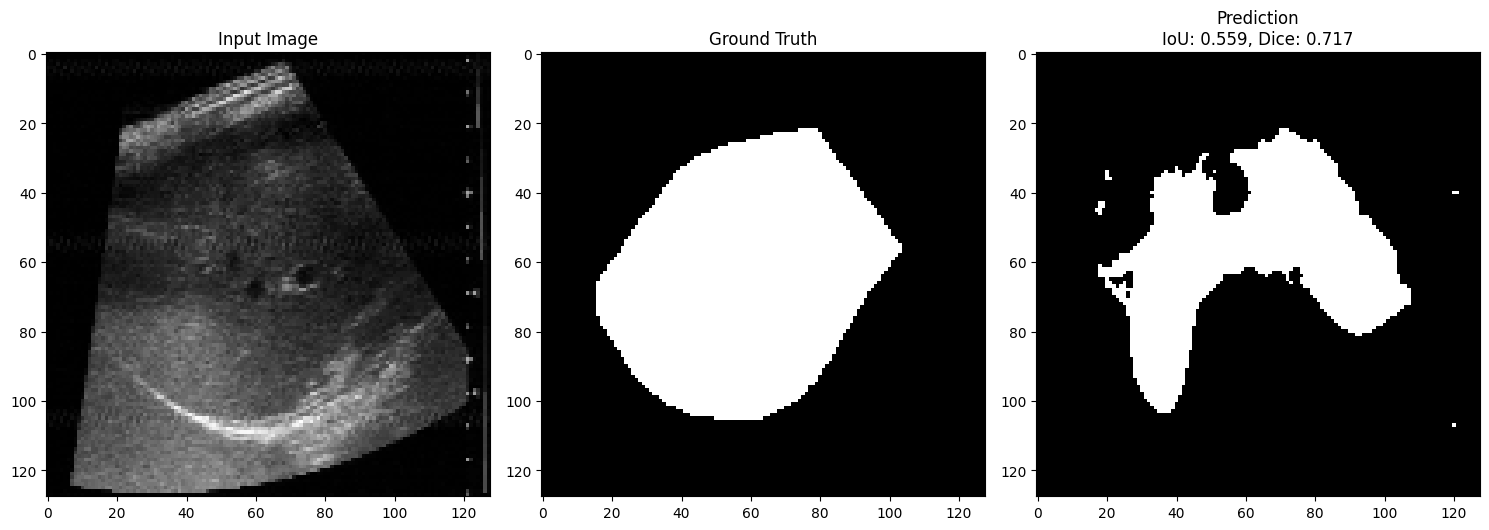

Processing image 242/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 243/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processing image 244/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Processing image 245/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 246/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


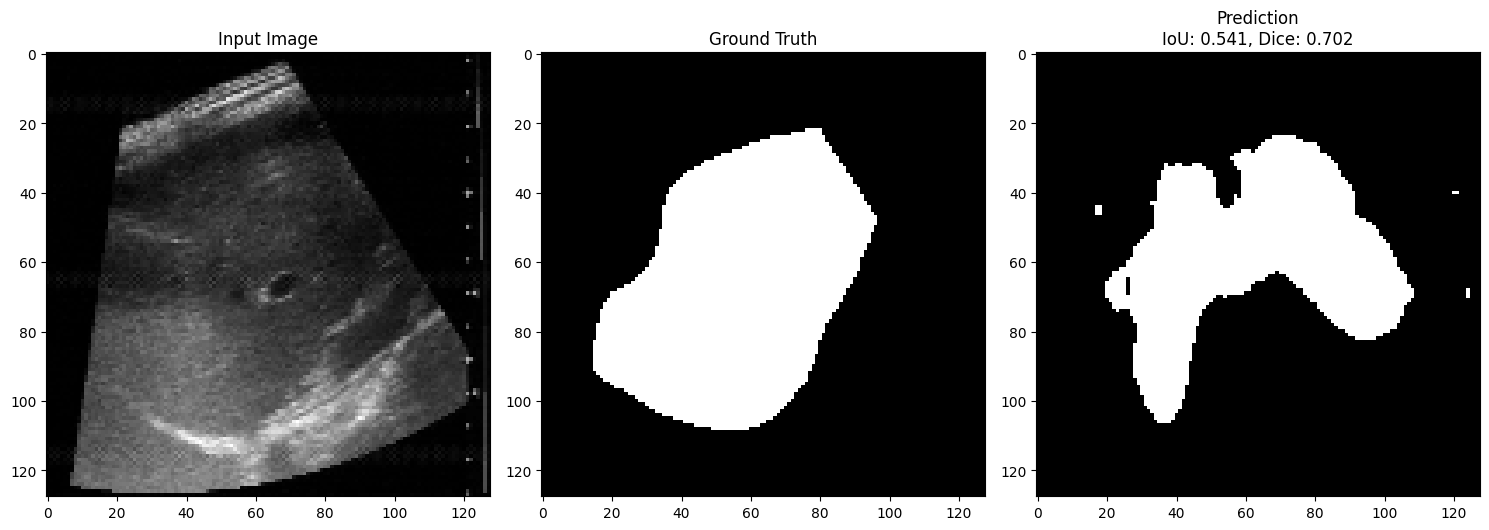

Processing image 247/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Processing image 248/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 249/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 250/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 251/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


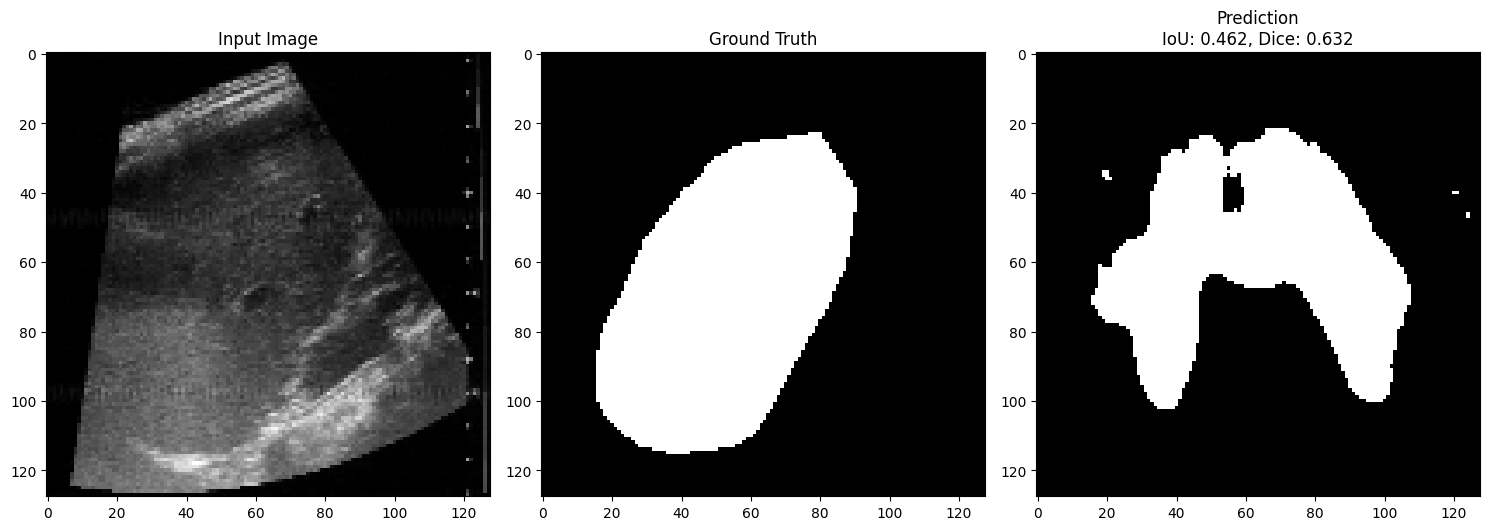

Processing image 252/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 253/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Processing image 254/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing image 255/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Processing image 256/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


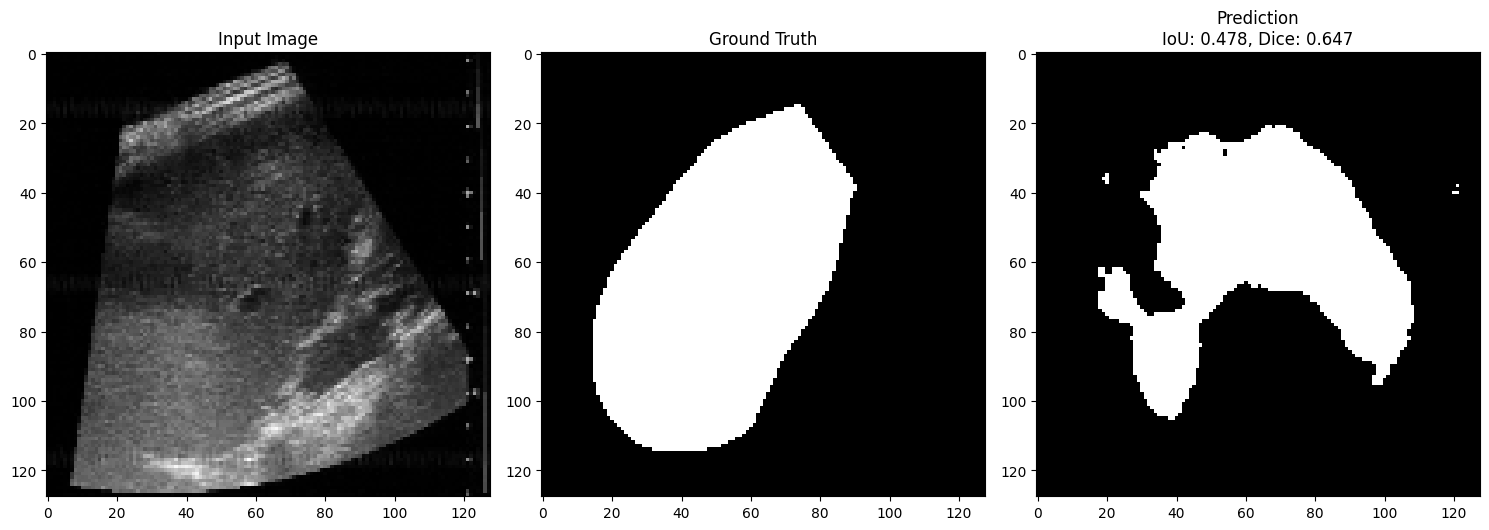

Processing image 257/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Processing image 258/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Processing image 259/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 260/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 261/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


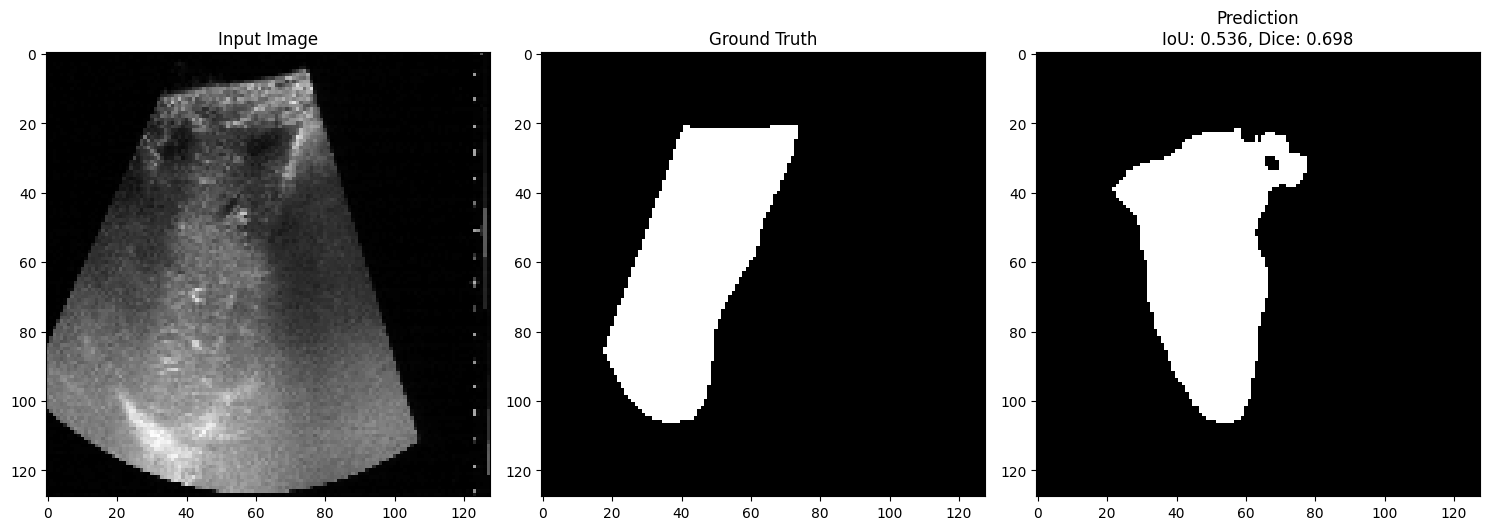

Processing image 262/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Processing image 263/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Processing image 264/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Processing image 265/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Processing image 266/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


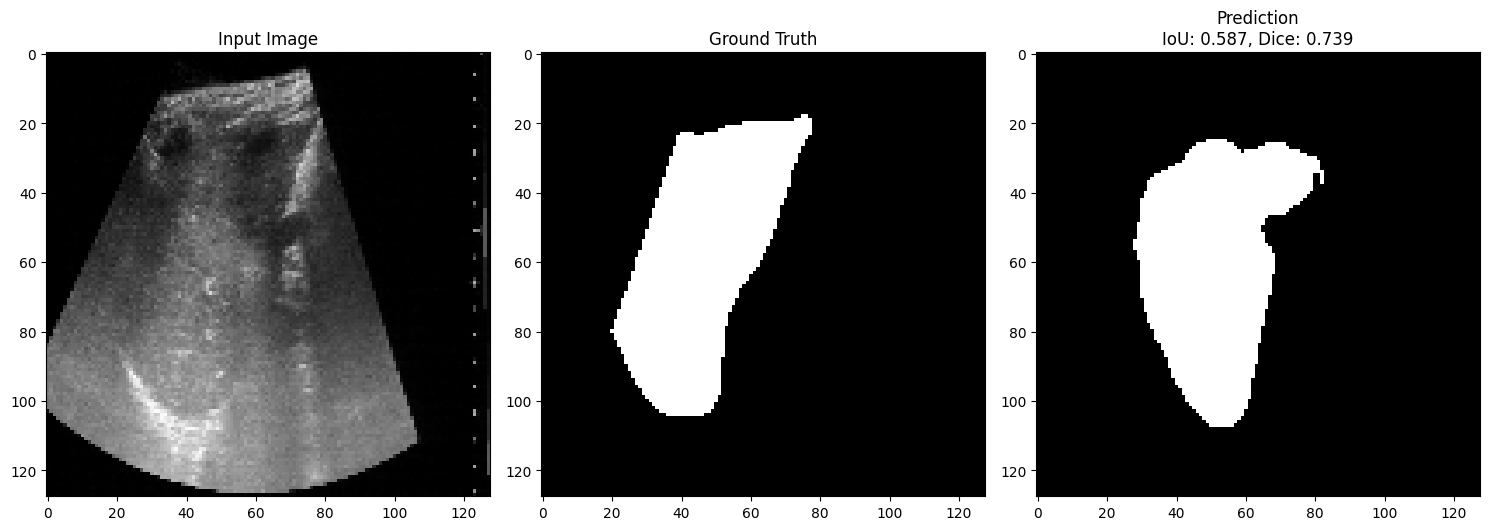

Processing image 267/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Processing image 268/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Processing image 269/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 270/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 271/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


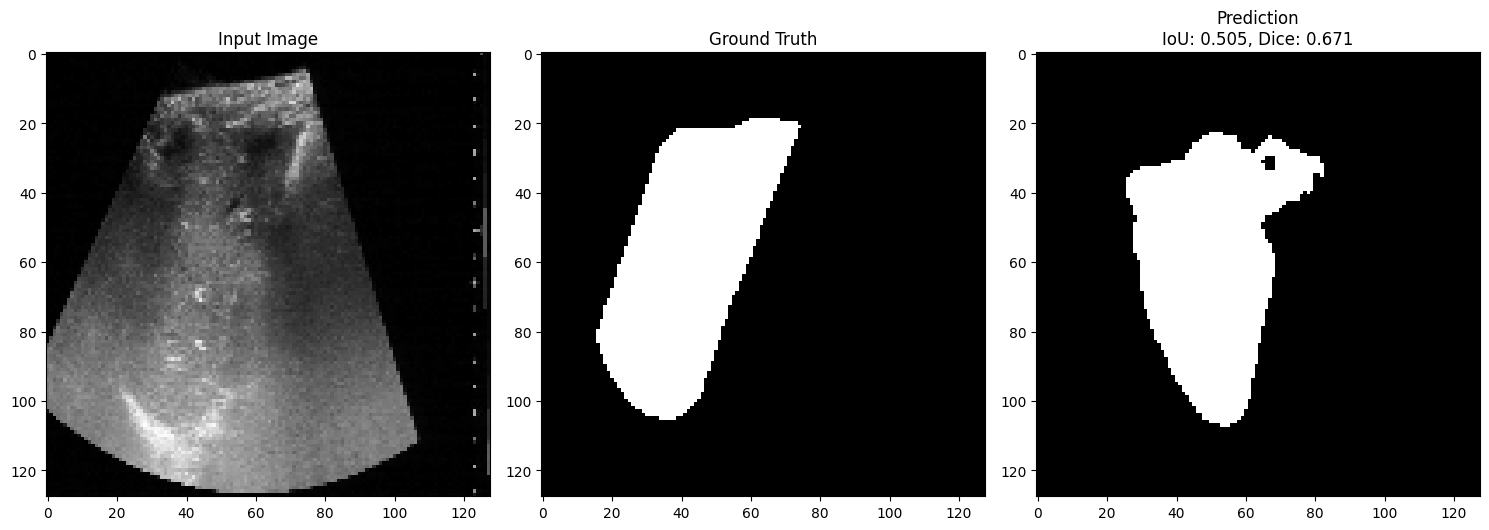

Processing image 272/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 273/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processing image 274/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 275/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 276/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


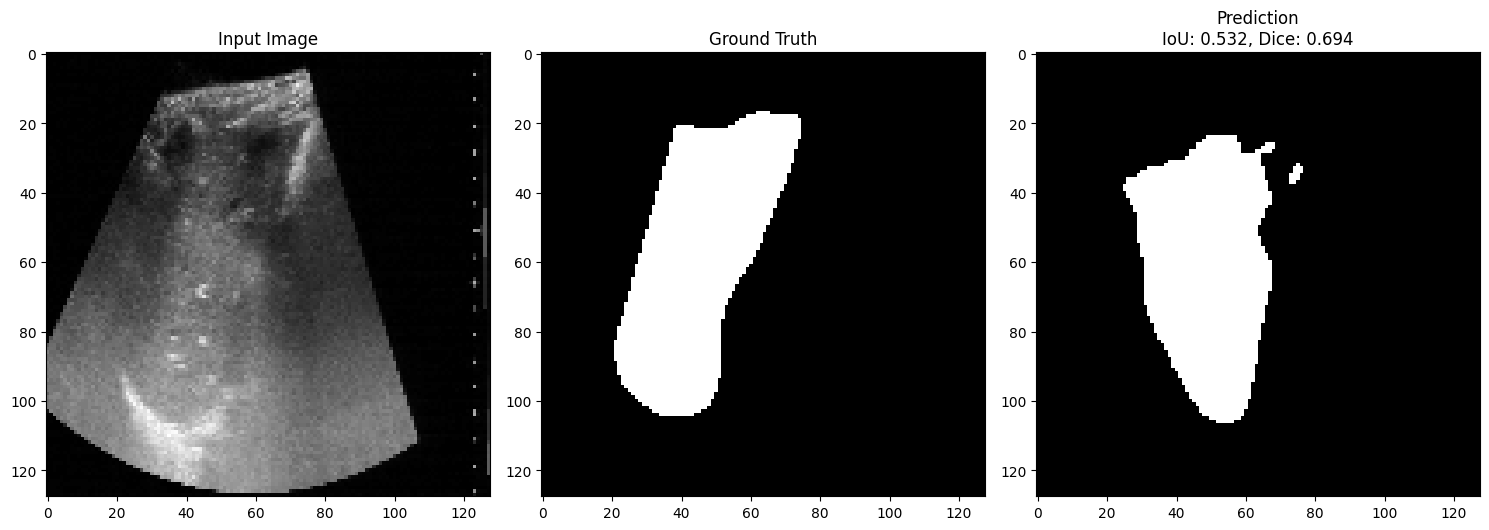

Processing image 277/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Processing image 278/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Processing image 279/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing image 280/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing image 281/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


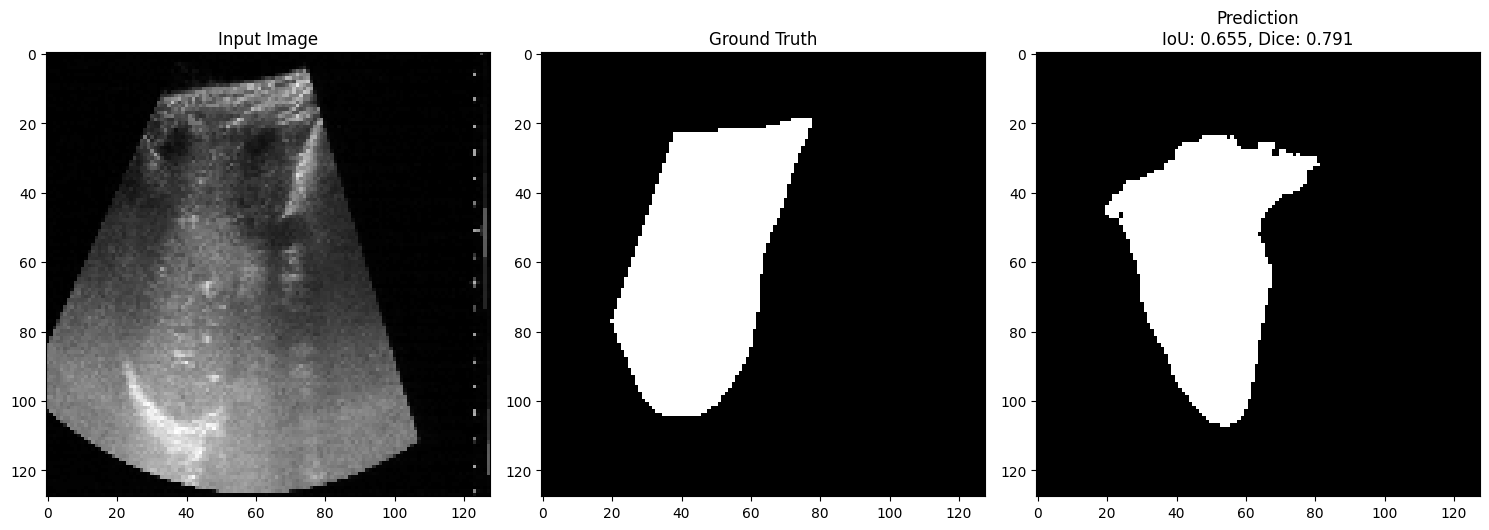

Processing image 282/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 283/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 284/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 285/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 286/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


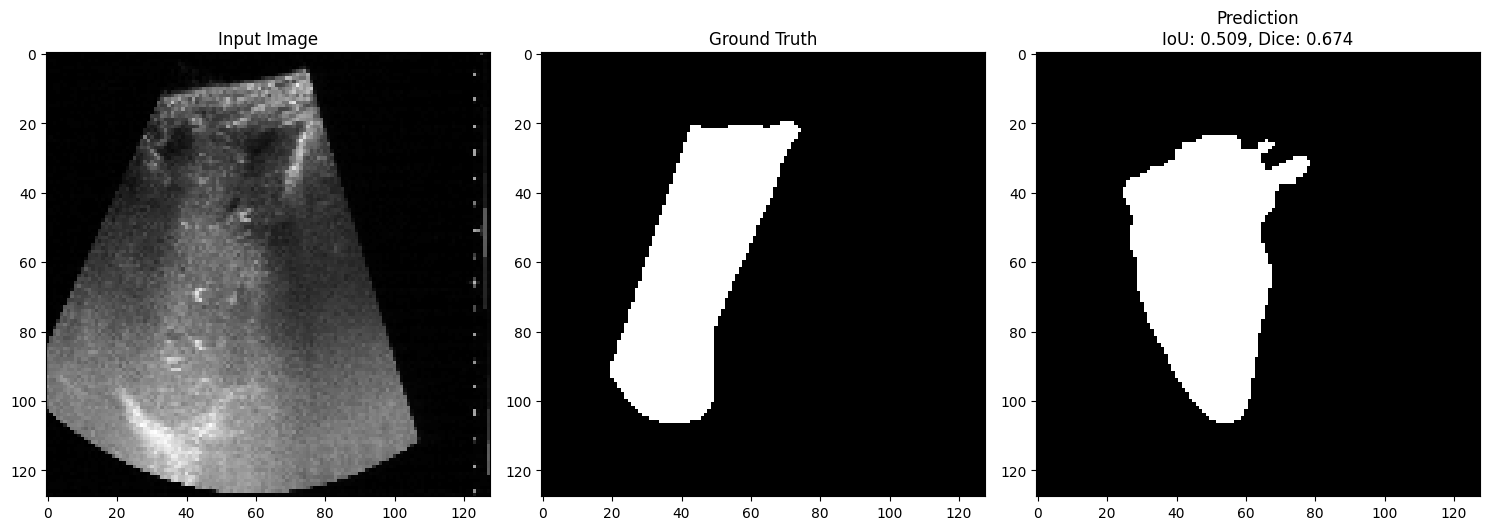

Processing image 287/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 288/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 289/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 290/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 291/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


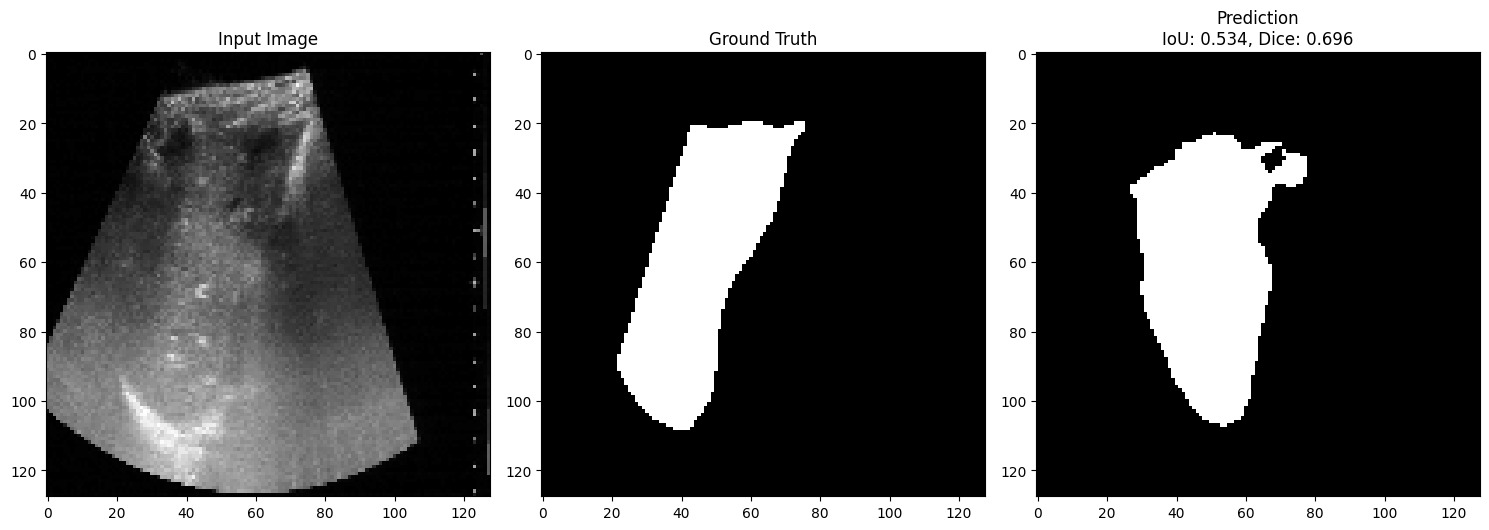

Processing image 292/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing image 293/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing image 294/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 295/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Processing image 296/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


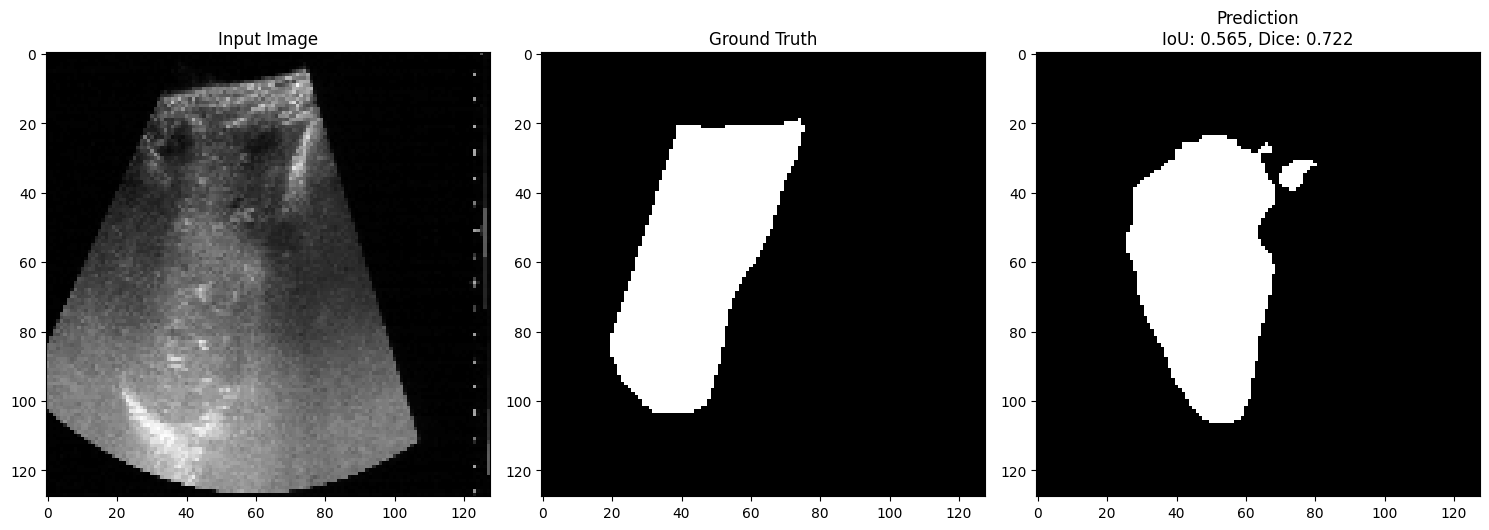

Processing image 297/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 298/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 299/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 300/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 301/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


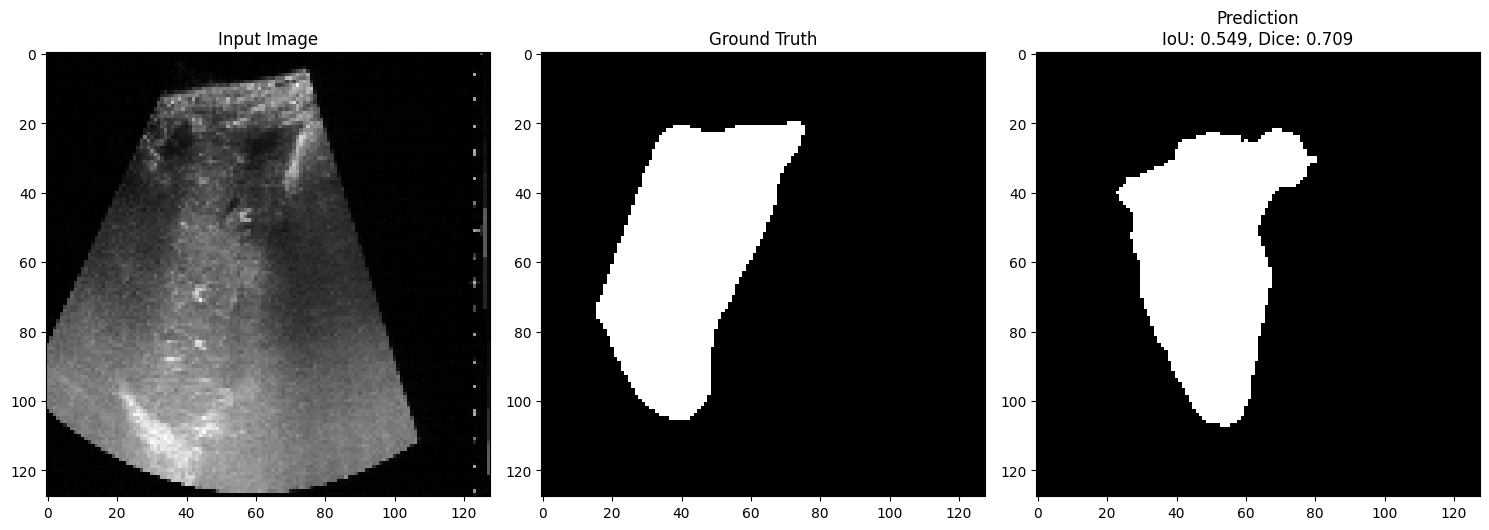

Processing image 302/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 303/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 304/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 305/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Processing image 306/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


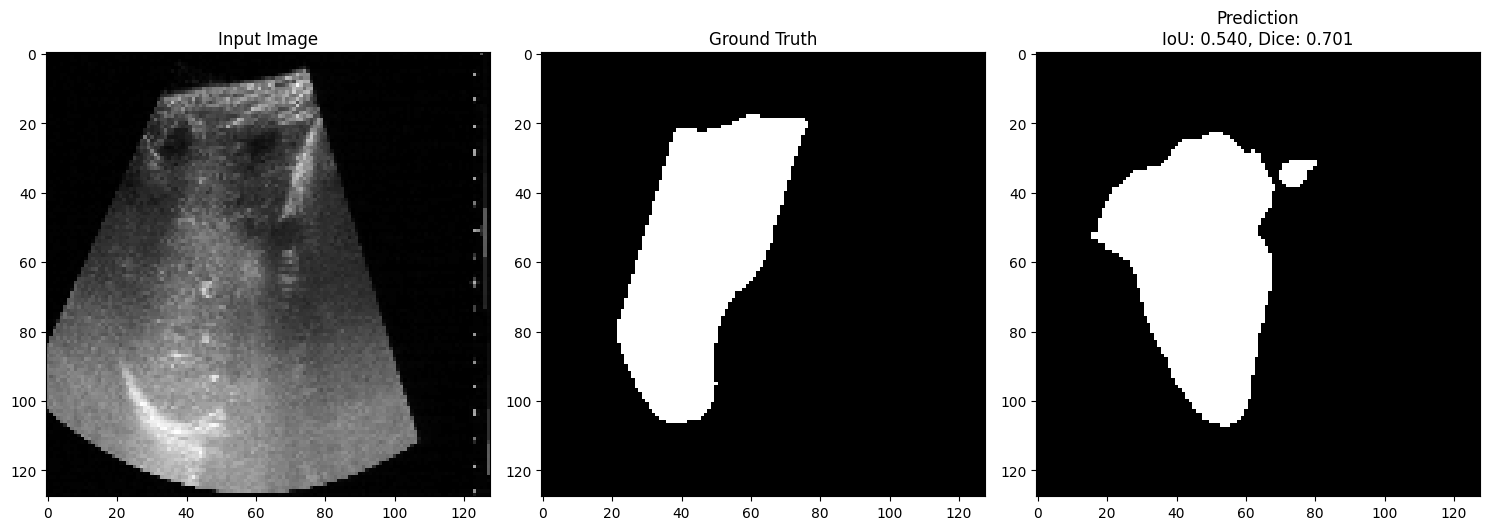

Processing image 307/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Processing image 308/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Processing image 309/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Processing image 310/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Processing image 311/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


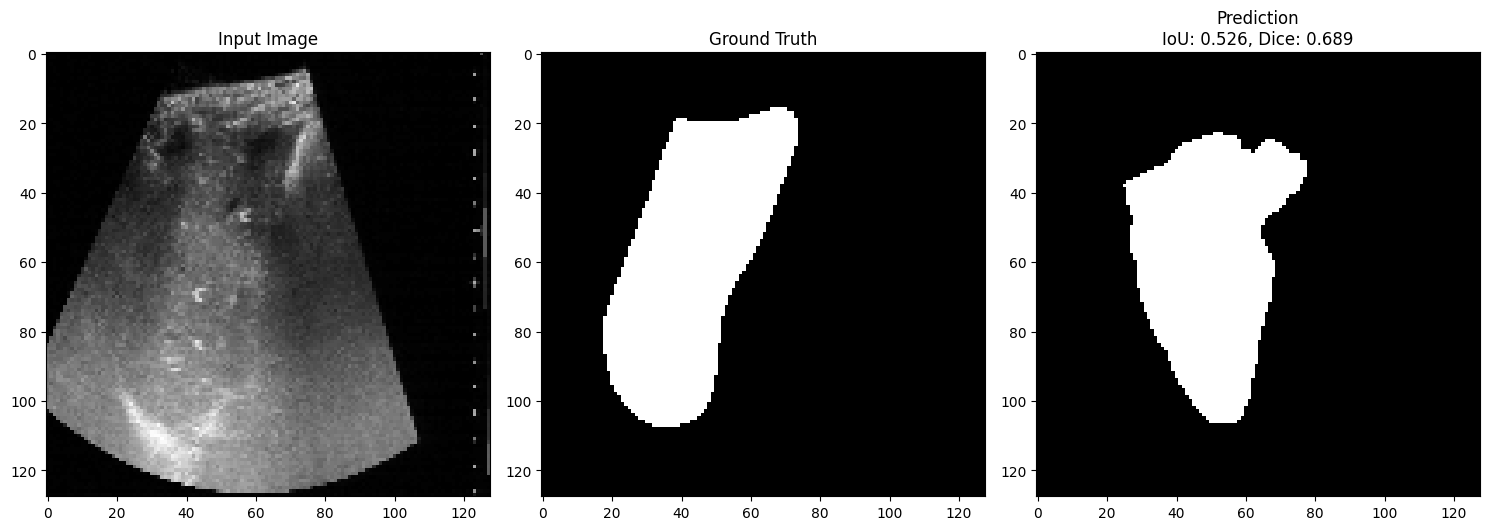

Processing image 312/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Processing image 313/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Processing image 314/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Processing image 315/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 316/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


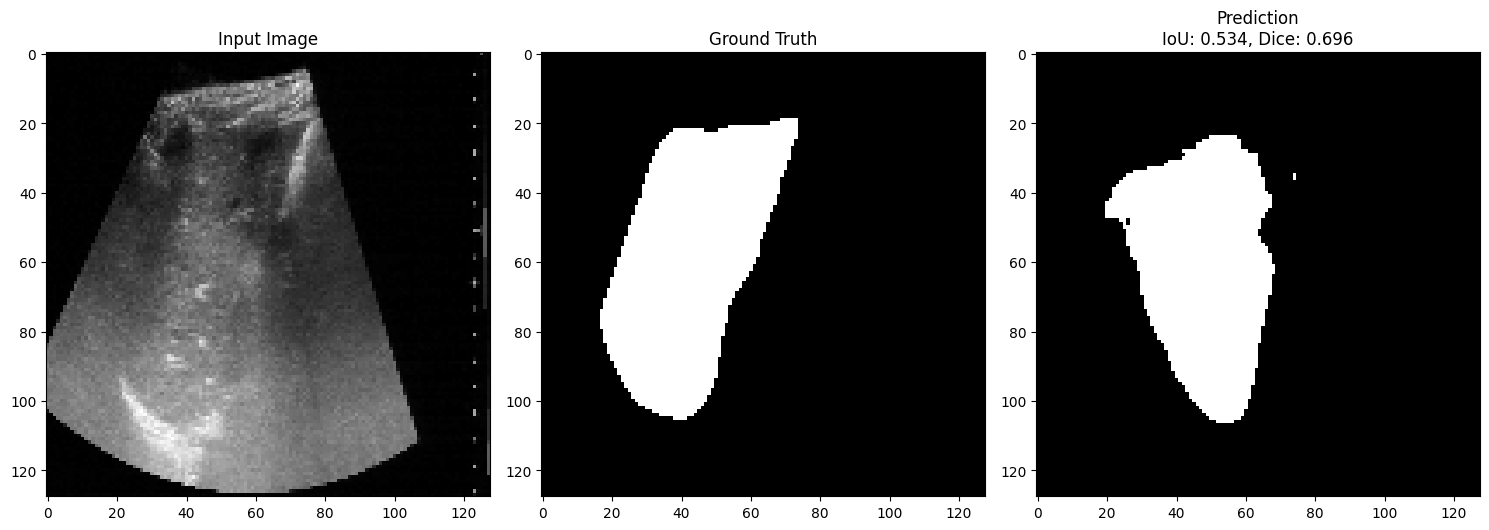

Processing image 317/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Processing image 318/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Processing image 319/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Processing image 320/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Processing image 321/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


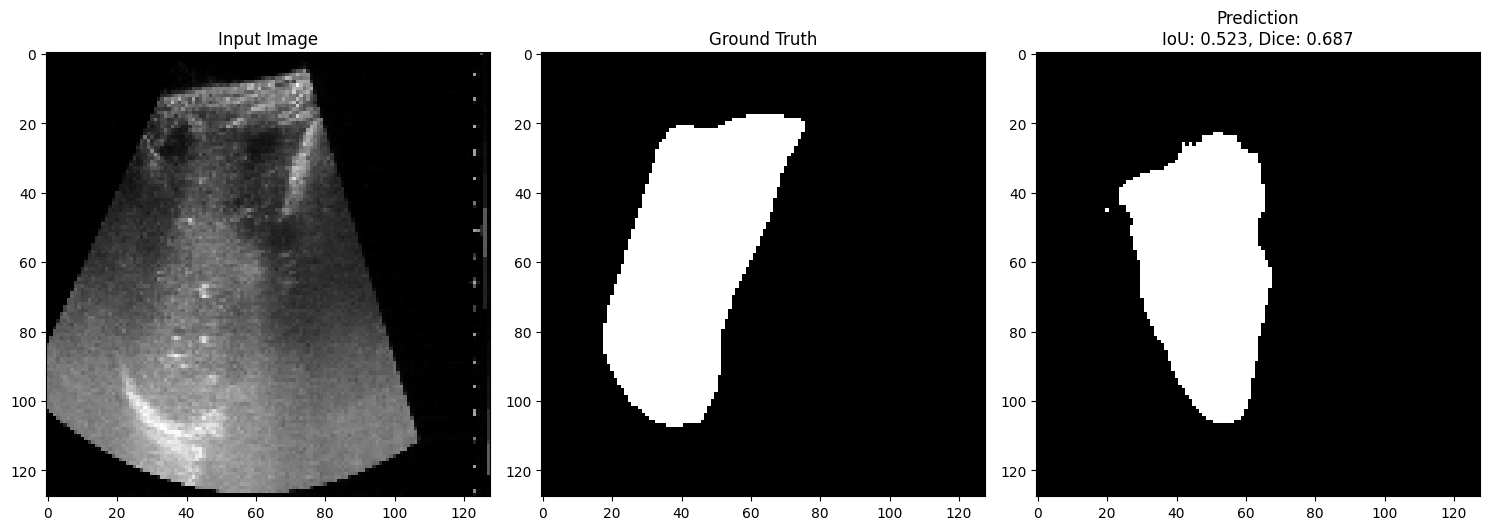

Processing image 322/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Processing image 323/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Processing image 324/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Processing image 325/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Processing image 326/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


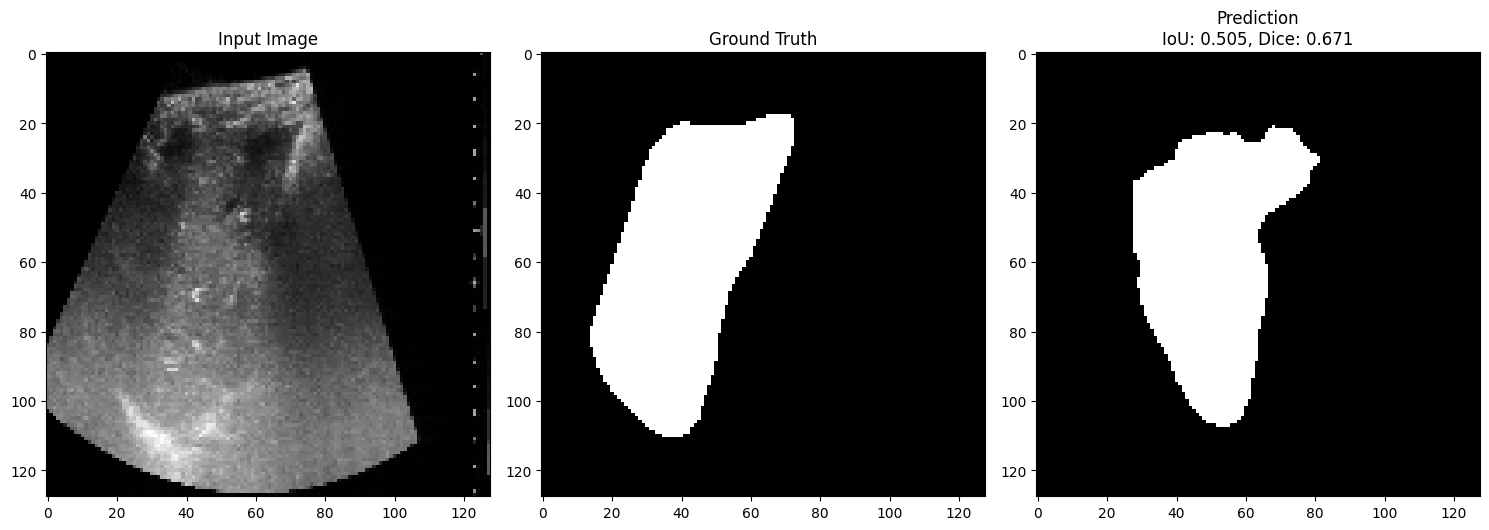

Processing image 327/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 328/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 329/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Processing image 330/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 331/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


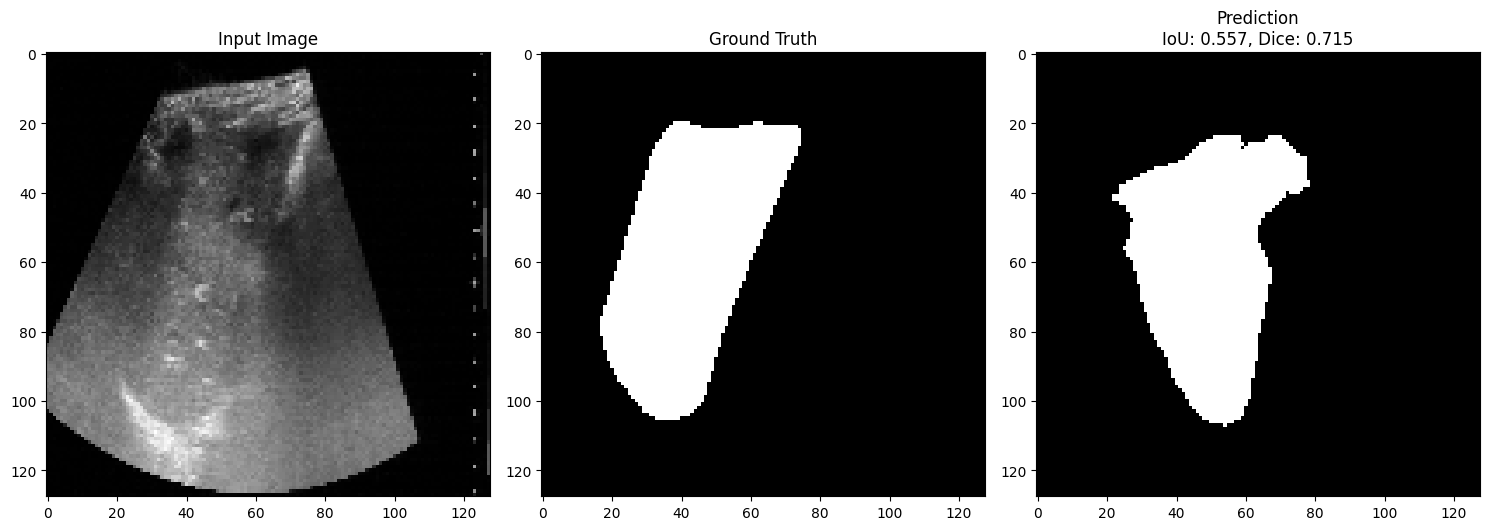

Processing image 332/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Processing image 333/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 334/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Processing image 335/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 336/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


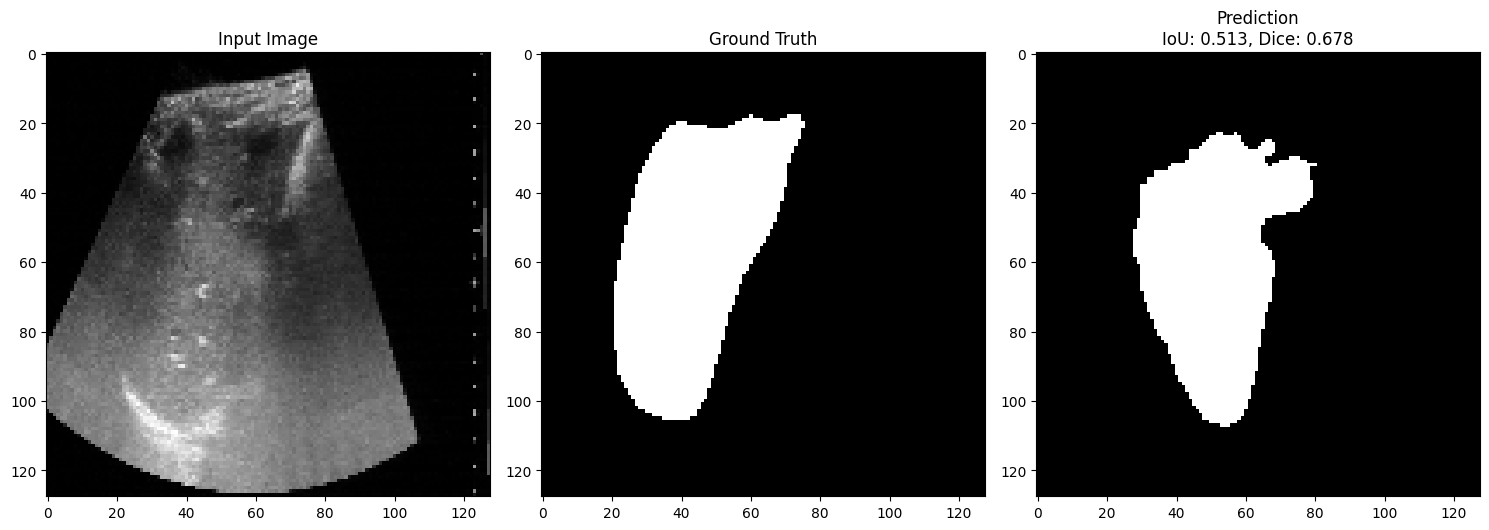

Processing image 337/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 338/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 339/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 340/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 341/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


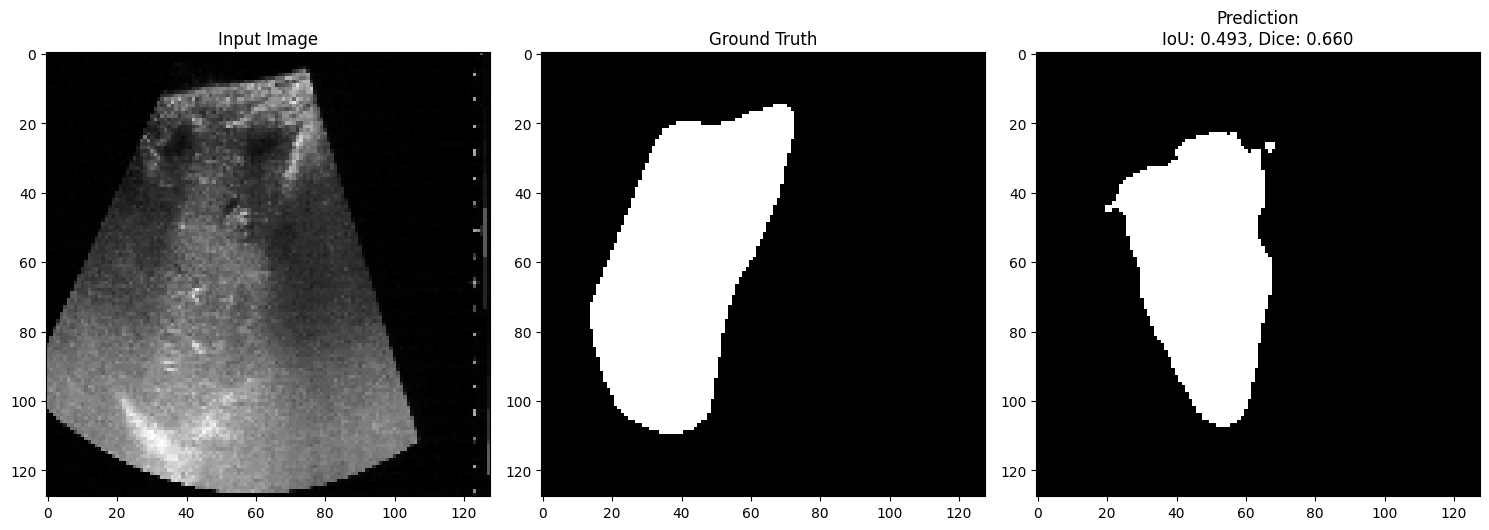

Processing image 342/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing image 343/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 344/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 345/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 346/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


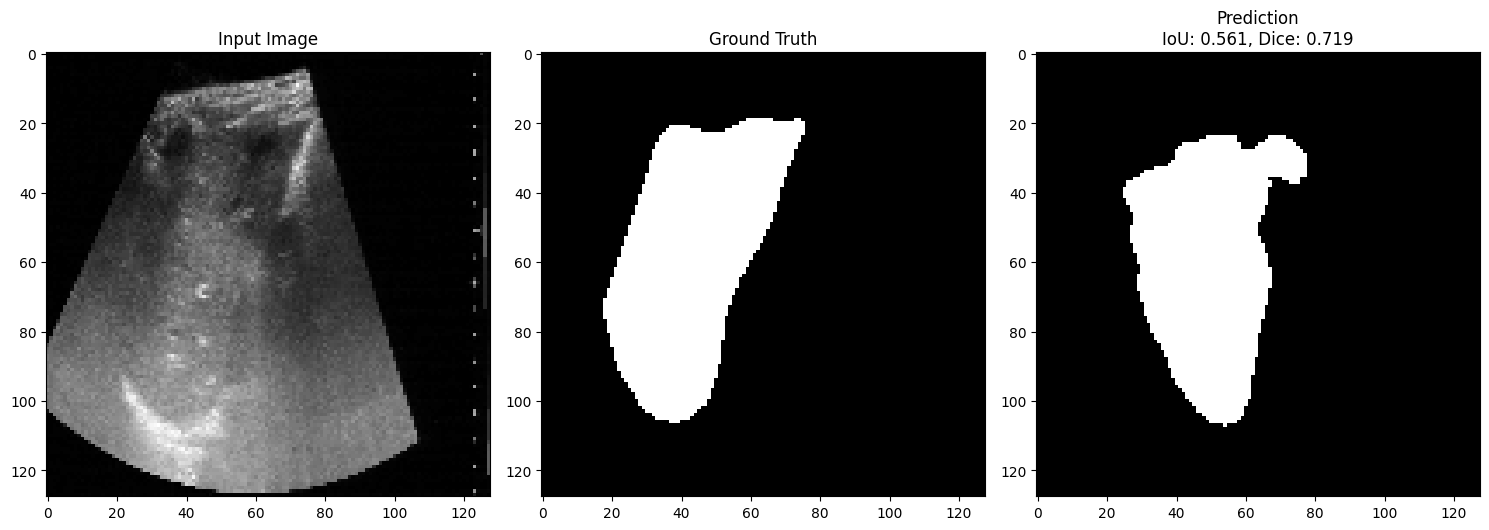

Processing image 347/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 348/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing image 349/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 350/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing image 351/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


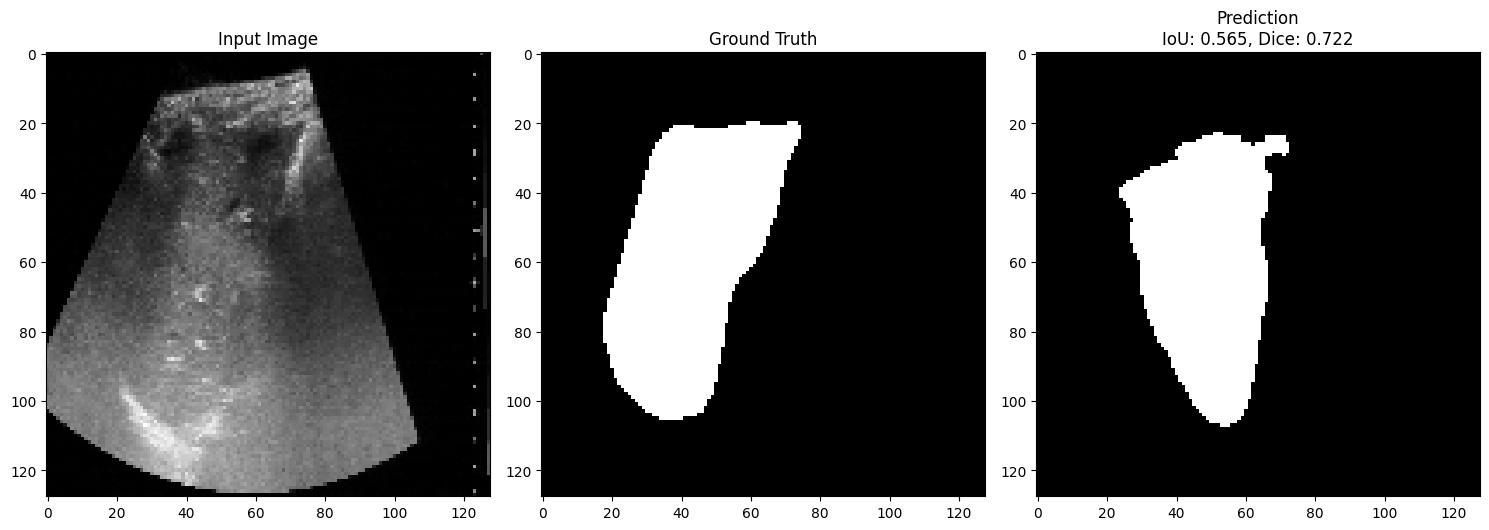

Processing image 352/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 353/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 354/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Processing image 355/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 356/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


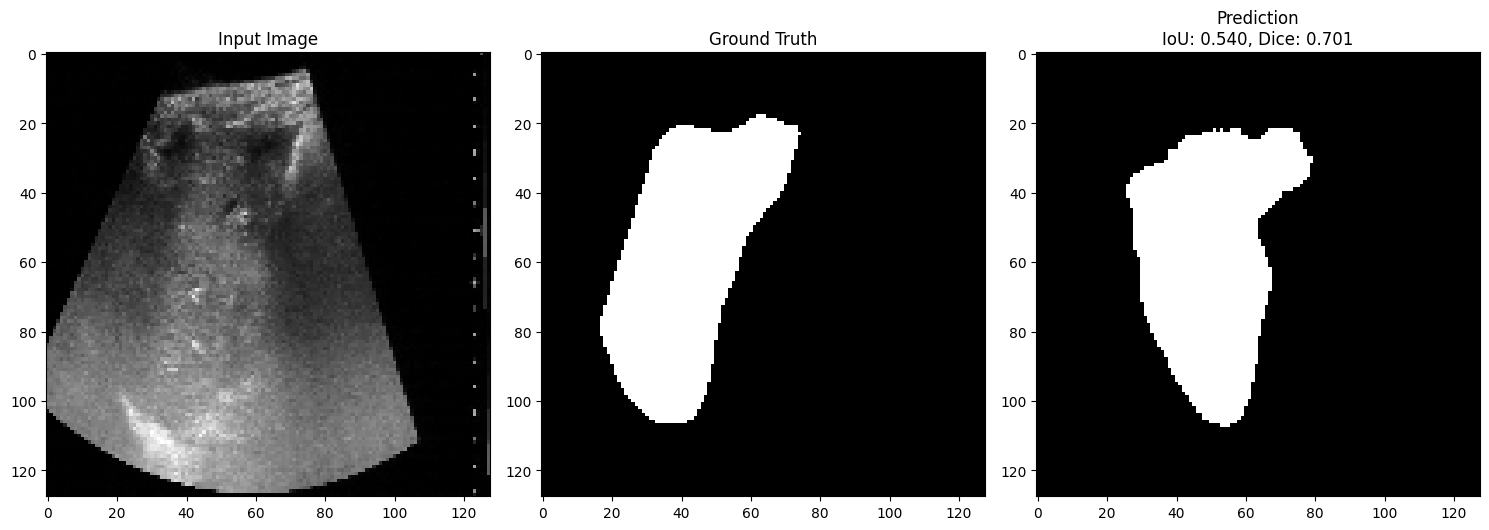

Processing image 357/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 358/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 359/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing image 360/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 361/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


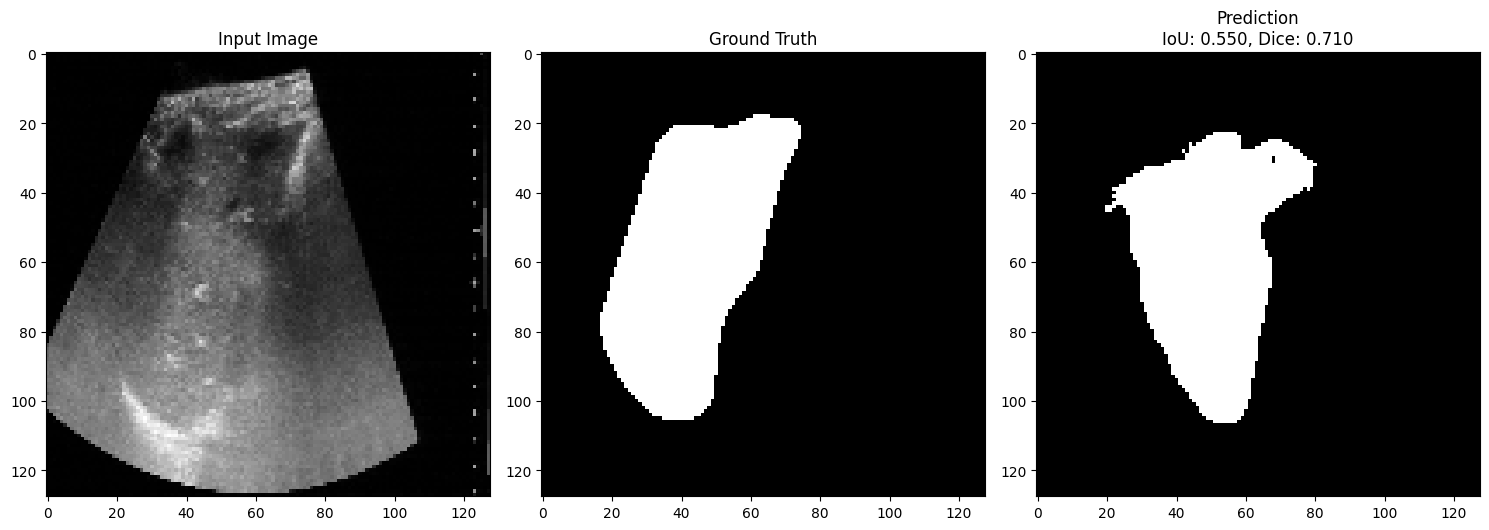

Processing image 362/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing image 363/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Processing image 364/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 365/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Processing image 366/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


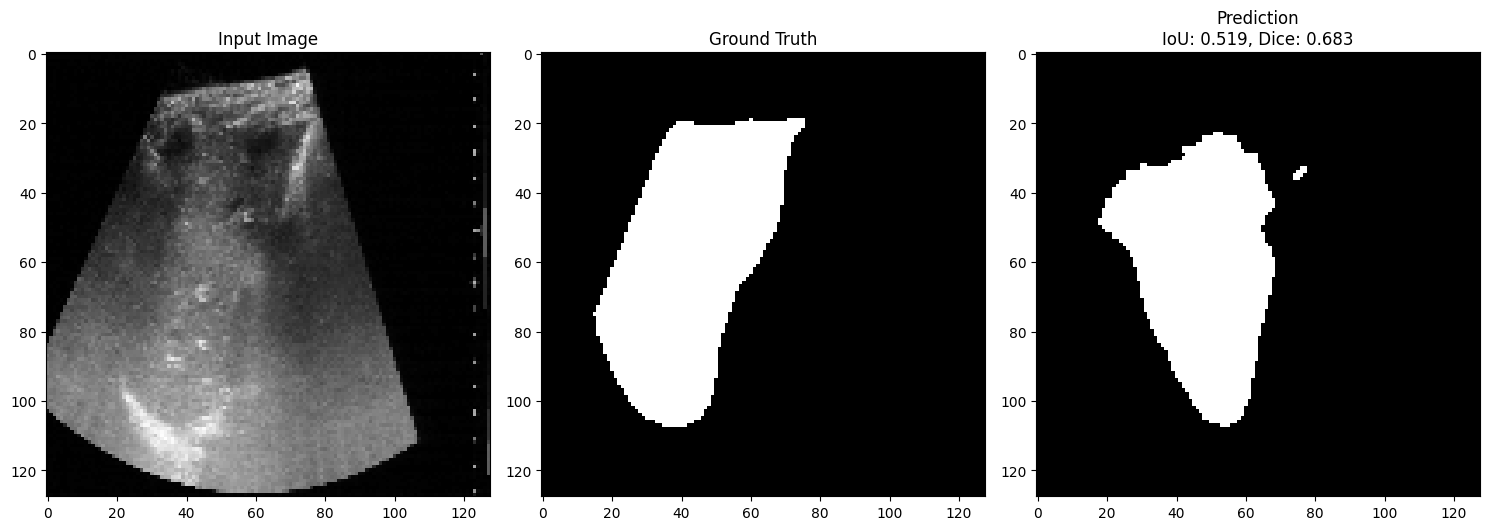

Processing image 367/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 368/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 369/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Processing image 370/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Processing image 371/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


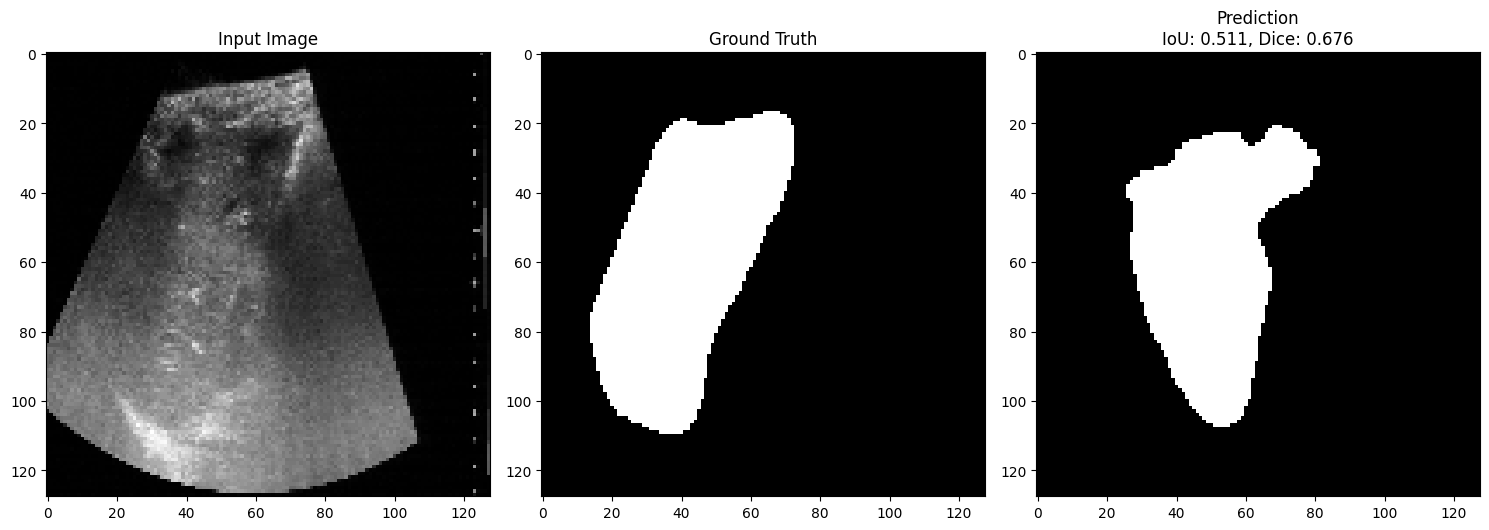

Processing image 372/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Processing image 373/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Processing image 374/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Processing image 375/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Processing image 376/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


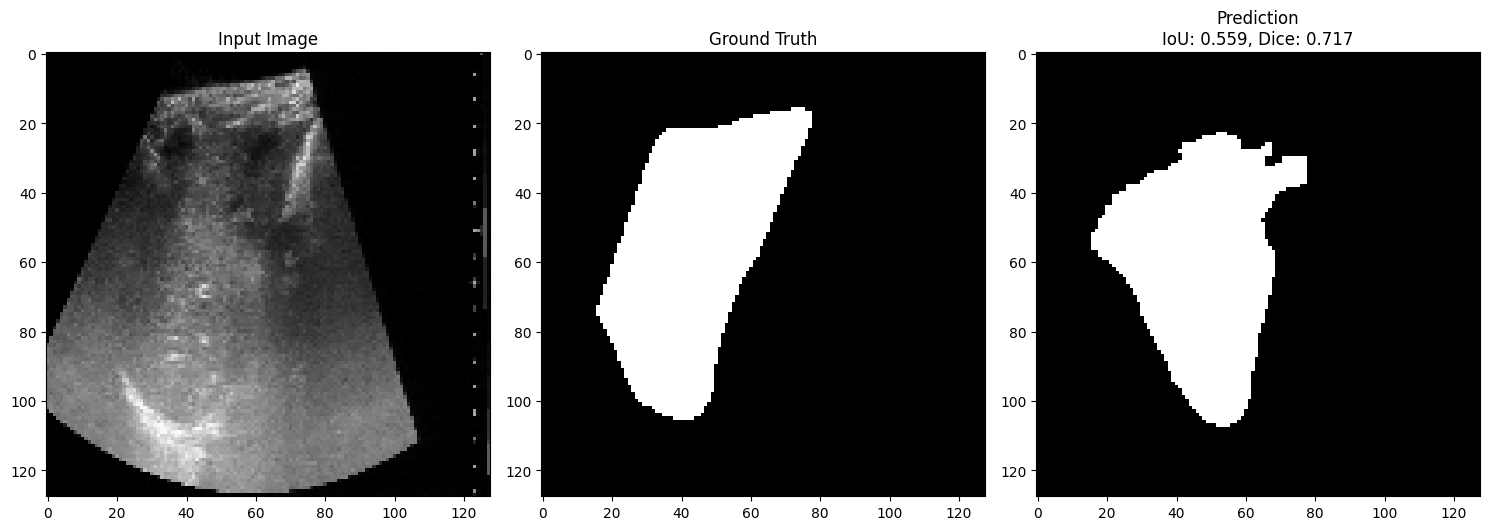

Processing image 377/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 378/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Processing image 379/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Processing image 380/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Processing image 381/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


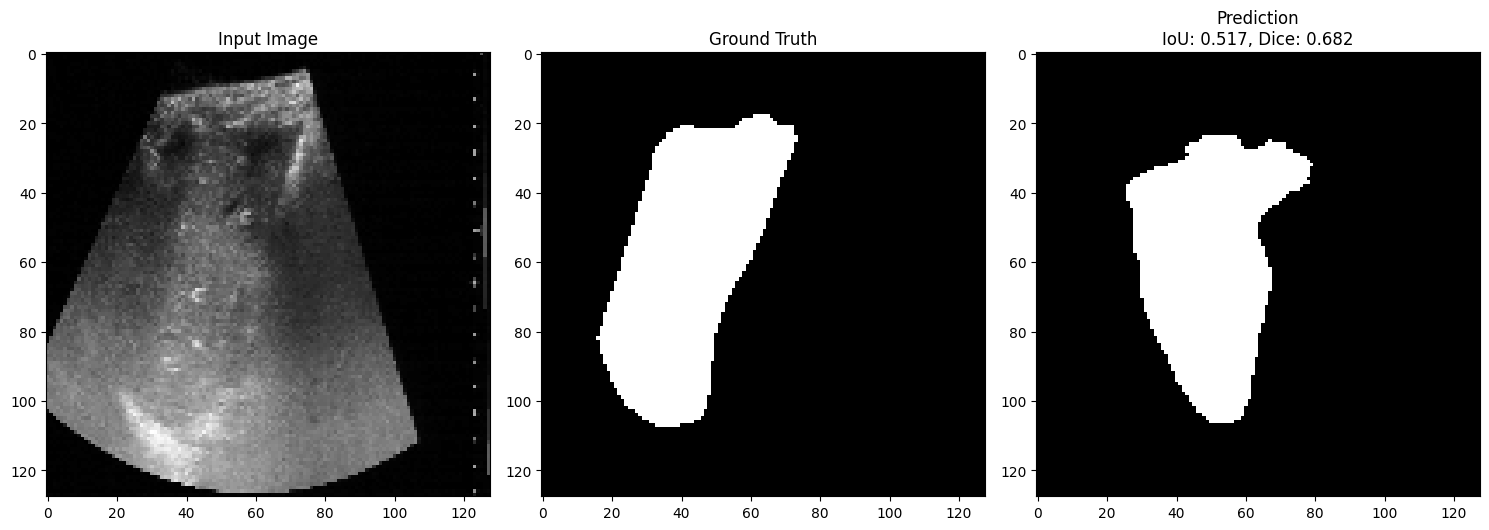

Processing image 382/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Processing image 383/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Processing image 384/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Processing image 385/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Processing image 386/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


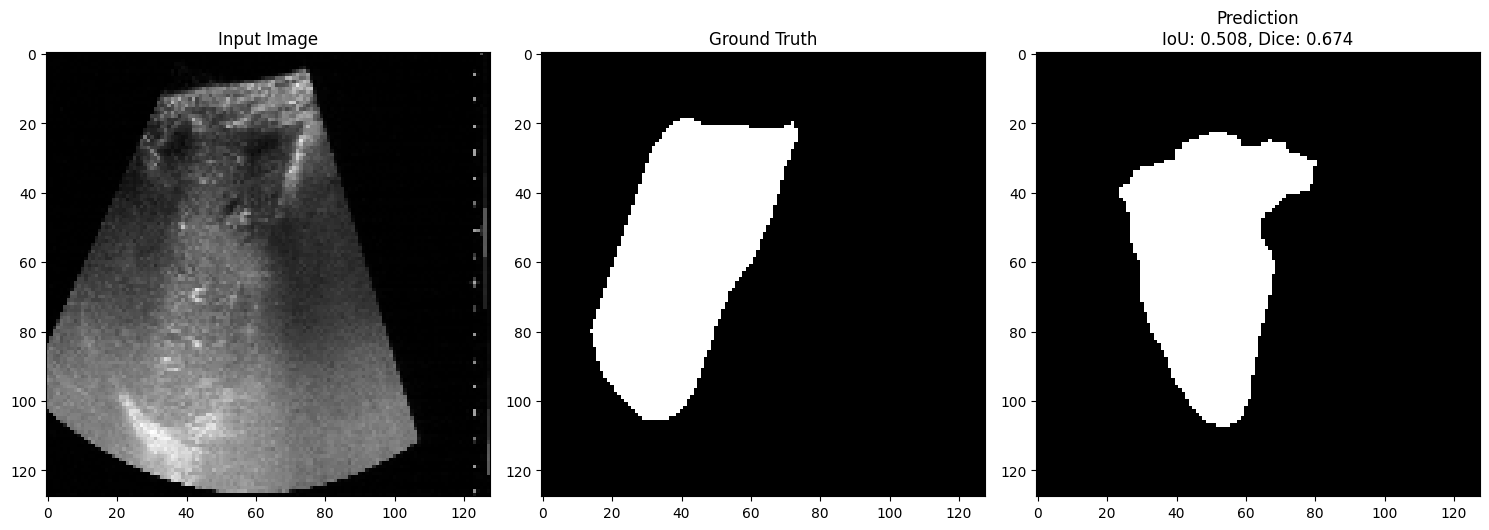

Processing image 387/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Processing image 388/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 389/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Processing image 390/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 391/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


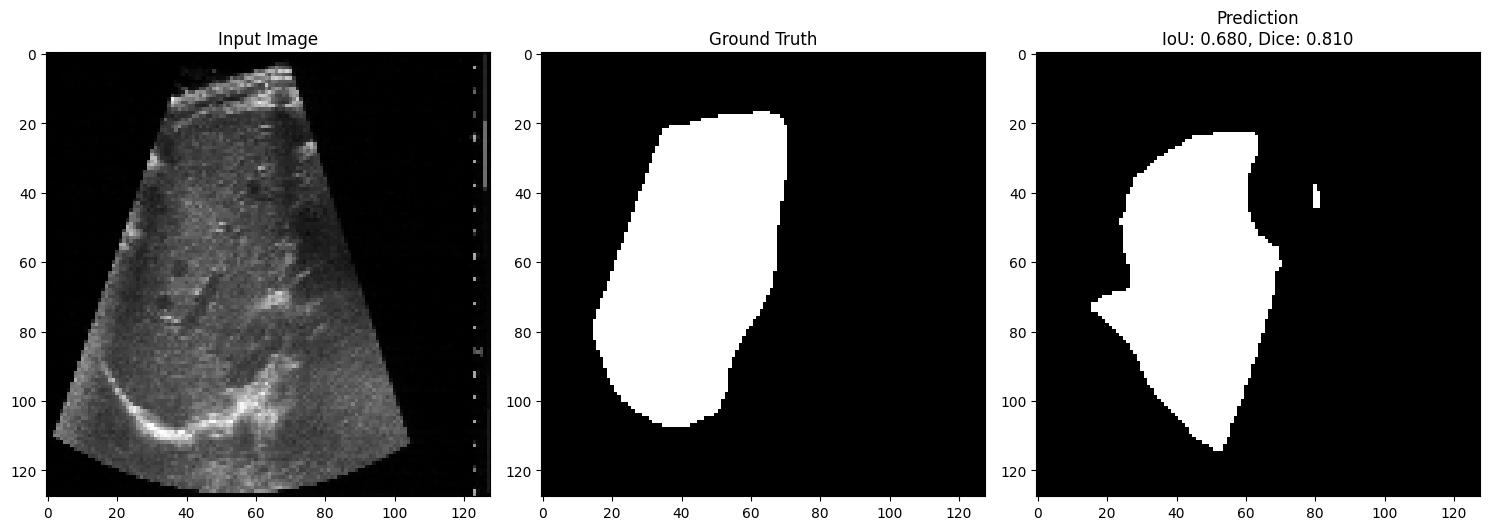

Processing image 392/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 393/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Processing image 394/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 395/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Processing image 396/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


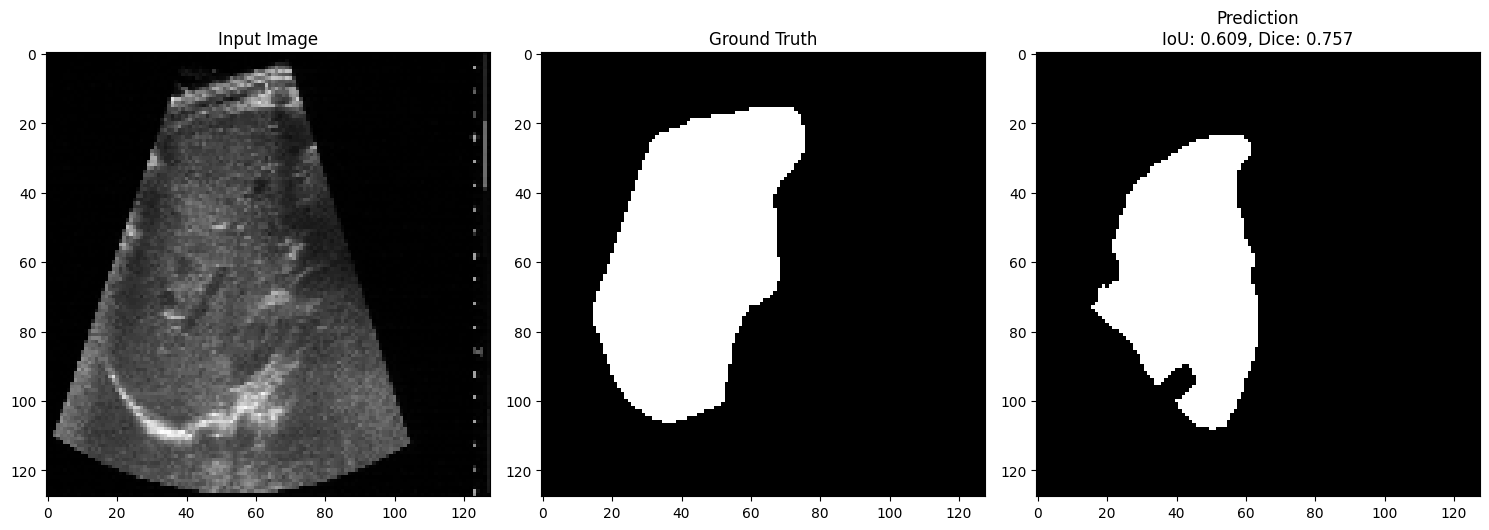

Processing image 397/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 398/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 399/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 400/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Processing image 401/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


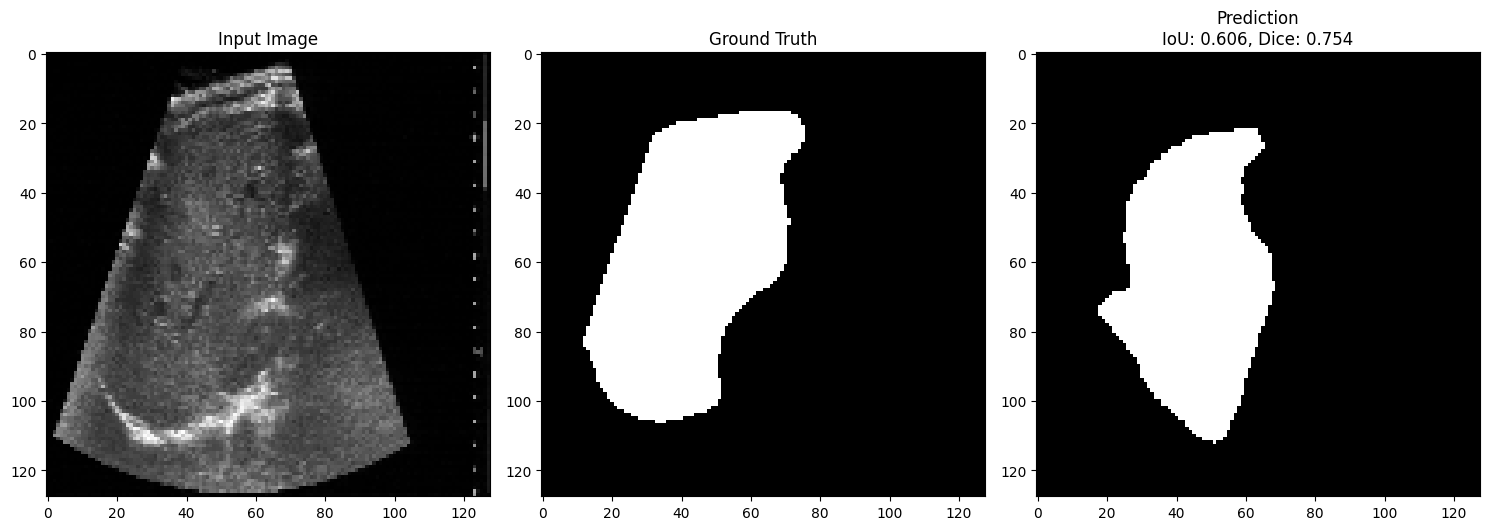

Processing image 402/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Processing image 403/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 404/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 405/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 406/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


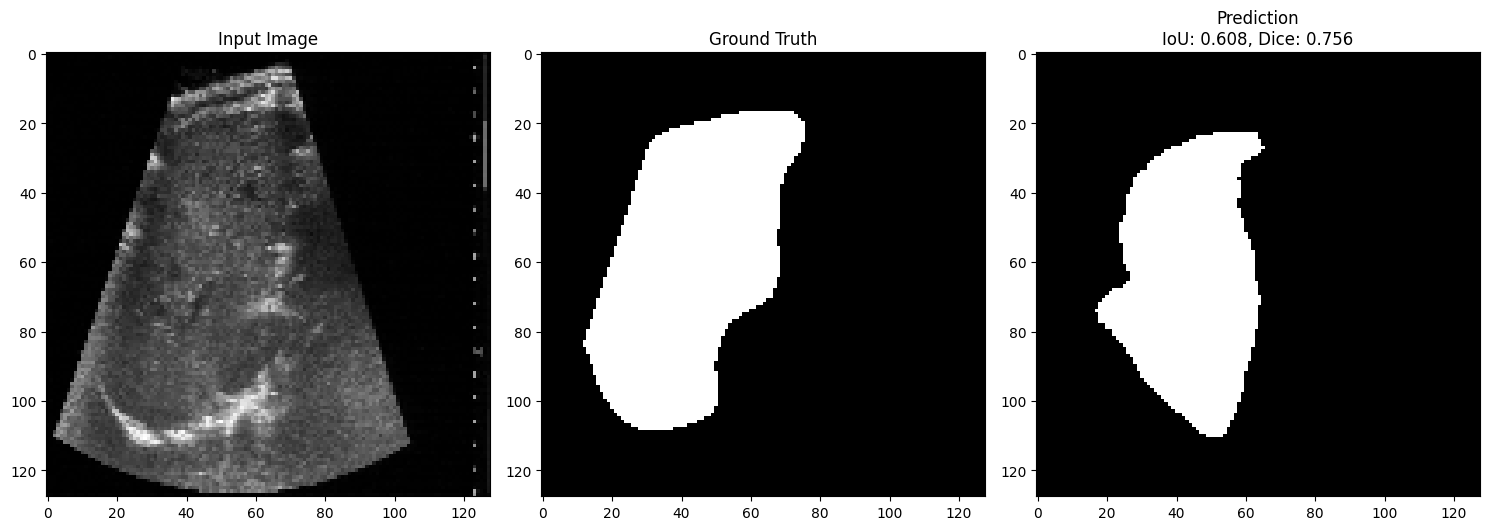

Processing image 407/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 408/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 409/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 410/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 411/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


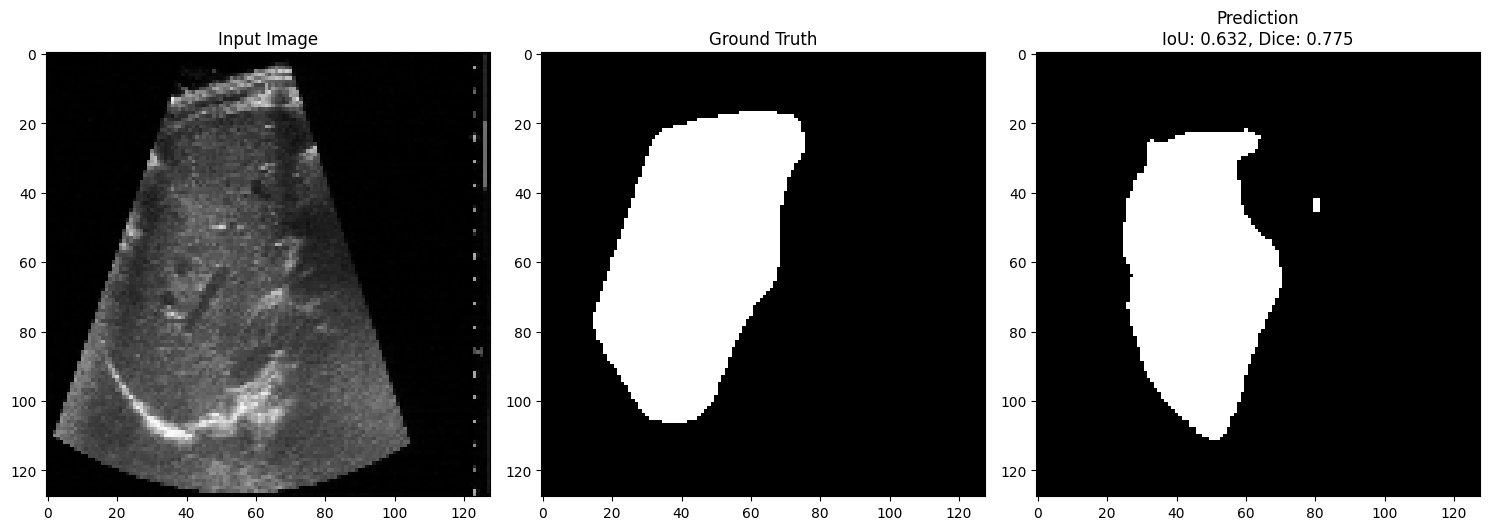

Processing image 412/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing image 413/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 414/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 415/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Processing image 416/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


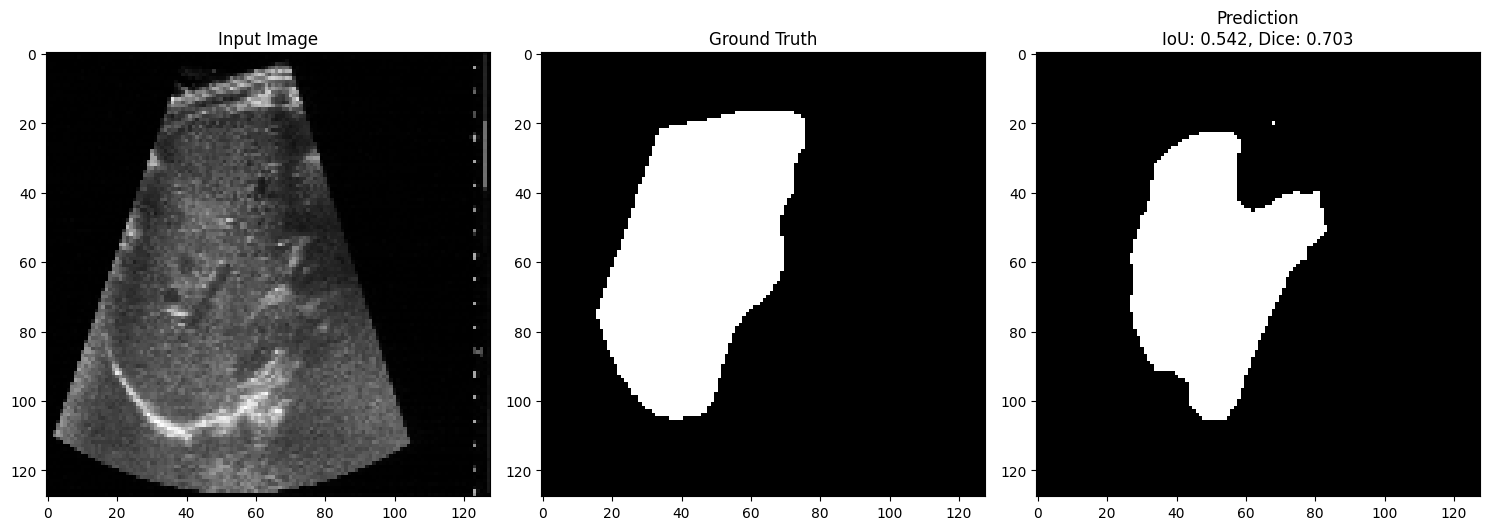

Processing image 417/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Processing image 418/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Processing image 419/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Processing image 420/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Processing image 421/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


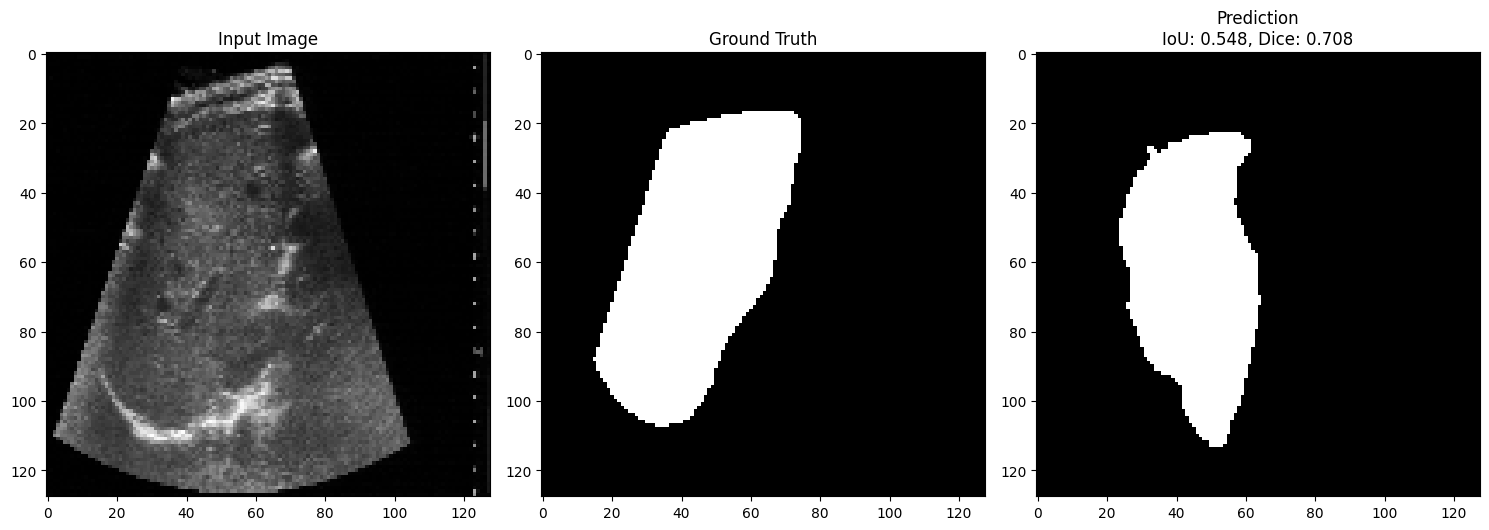

Processing image 422/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 423/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Processing image 424/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Processing image 425/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 426/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


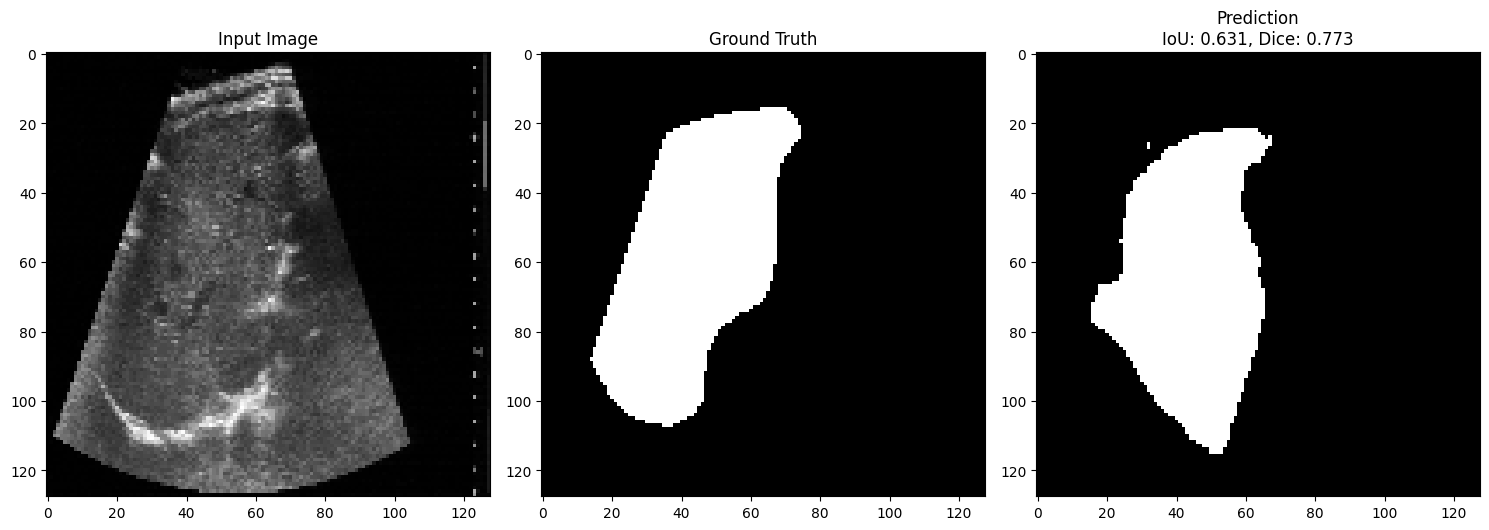

Processing image 427/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 428/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Processing image 429/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Processing image 430/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Processing image 431/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


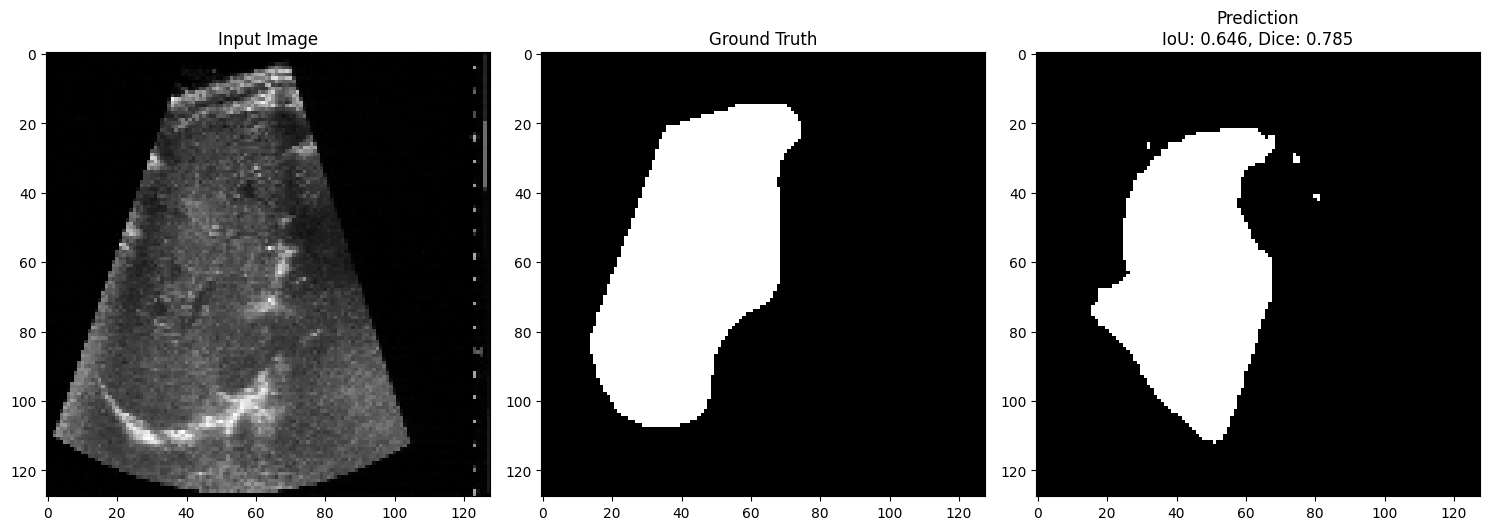

Processing image 432/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Processing image 433/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Processing image 434/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Processing image 435/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Processing image 436/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


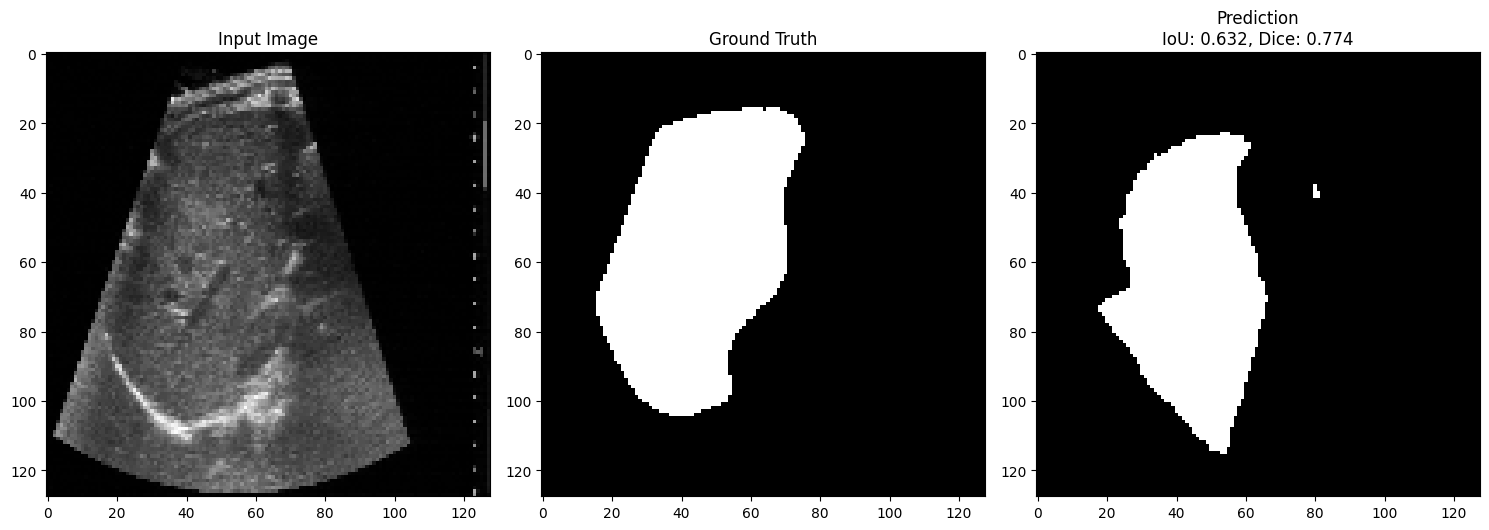

Processing image 437/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Processing image 438/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Processing image 439/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Processing image 440/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Processing image 441/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


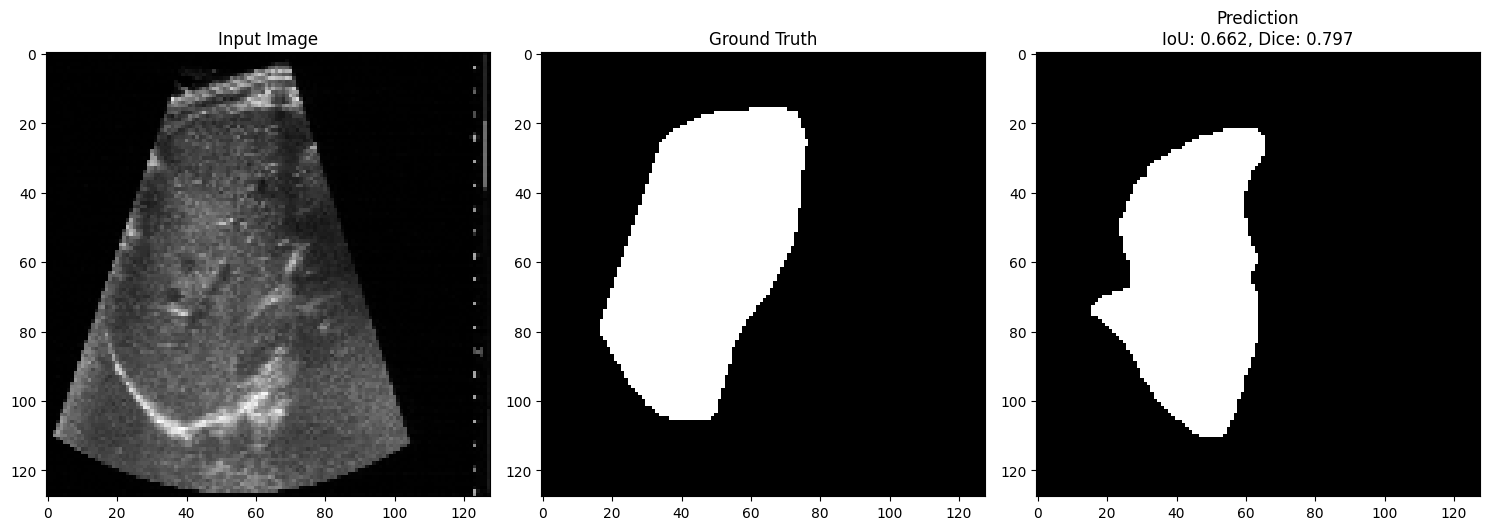

Processing image 442/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Processing image 443/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Processing image 444/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Processing image 445/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Processing image 446/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


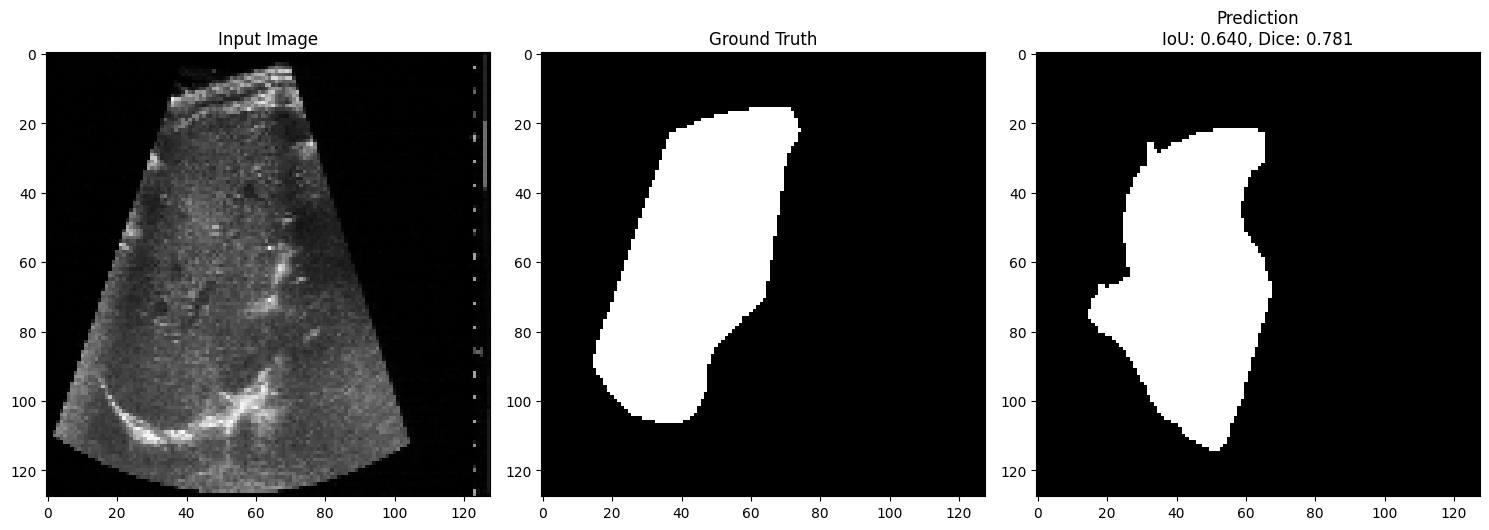

Processing image 447/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Processing image 448/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing image 449/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 450/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 451/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


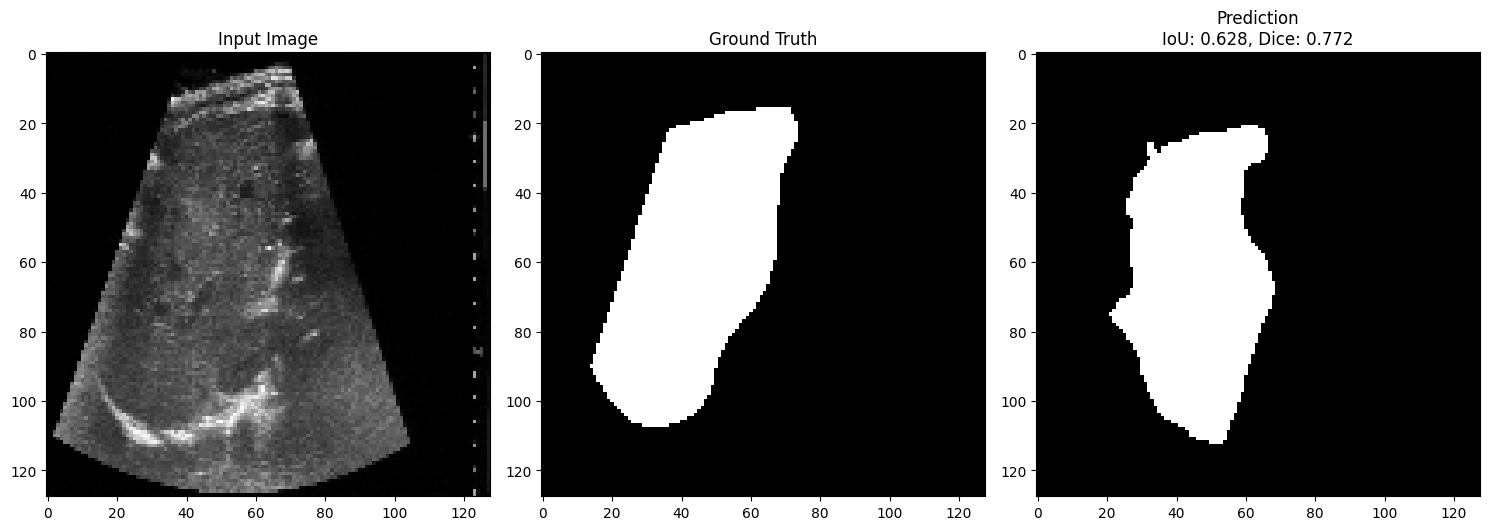

Processing image 452/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 453/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 454/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 455/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 456/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


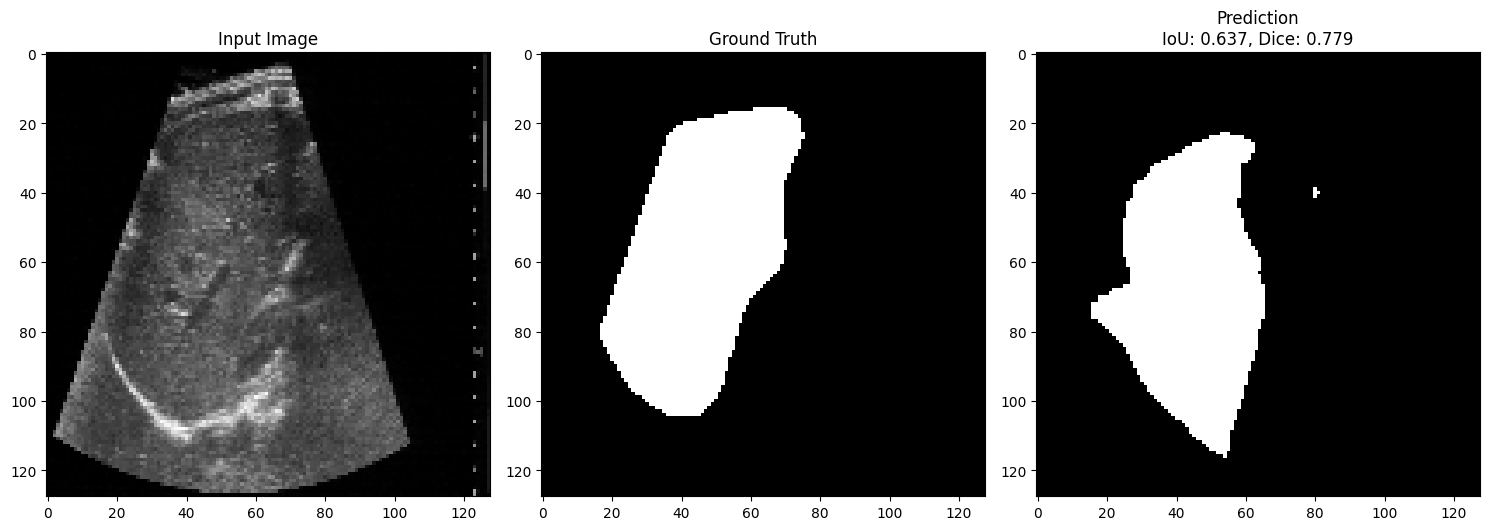

Processing image 457/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 458/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 459/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Processing image 460/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Processing image 461/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


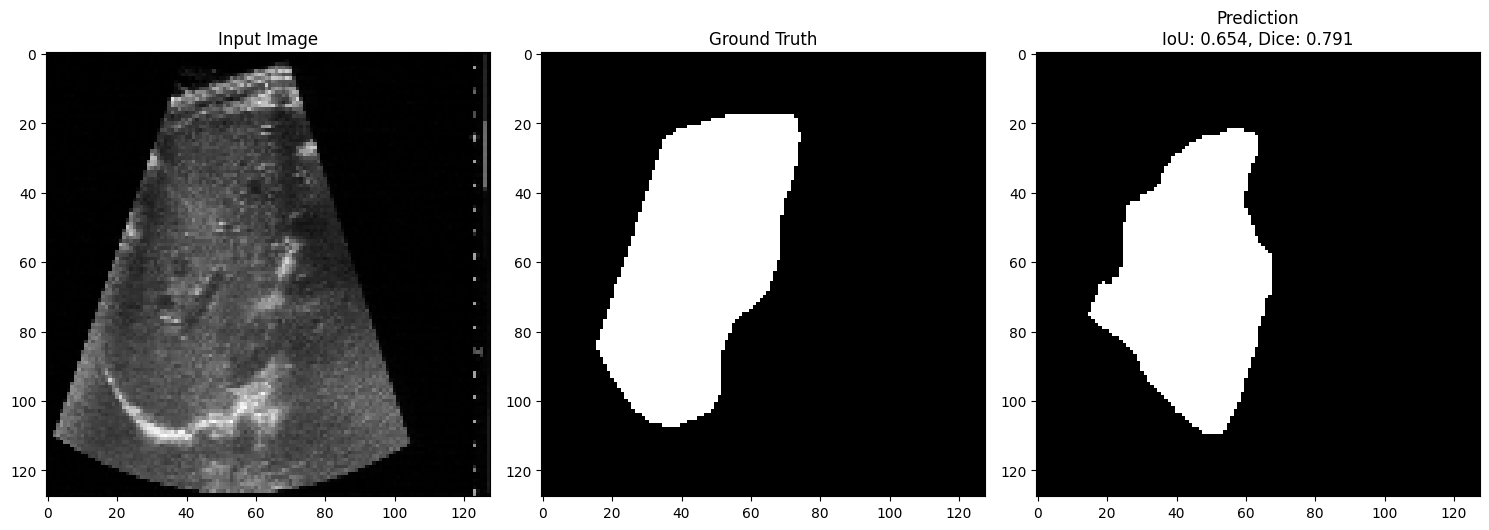

Processing image 462/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing image 463/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 464/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 465/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Processing image 466/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


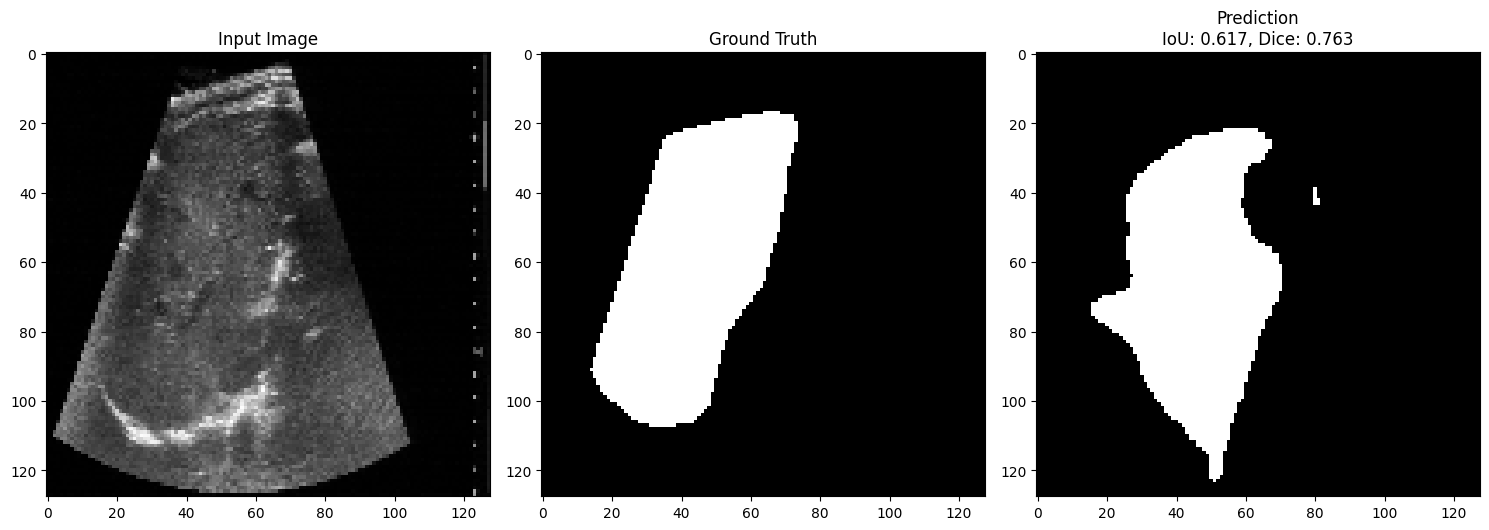

Processing image 467/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing image 468/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 469/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 470/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processing image 471/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


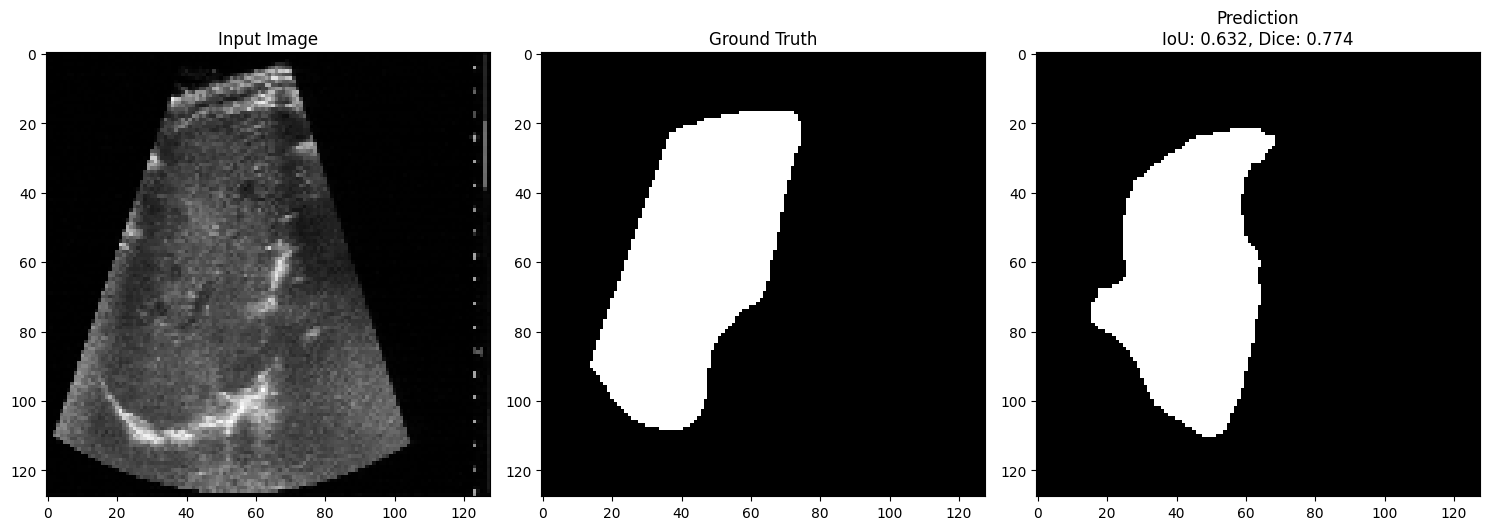

Processing image 472/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 473/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Processing image 474/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 475/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 476/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


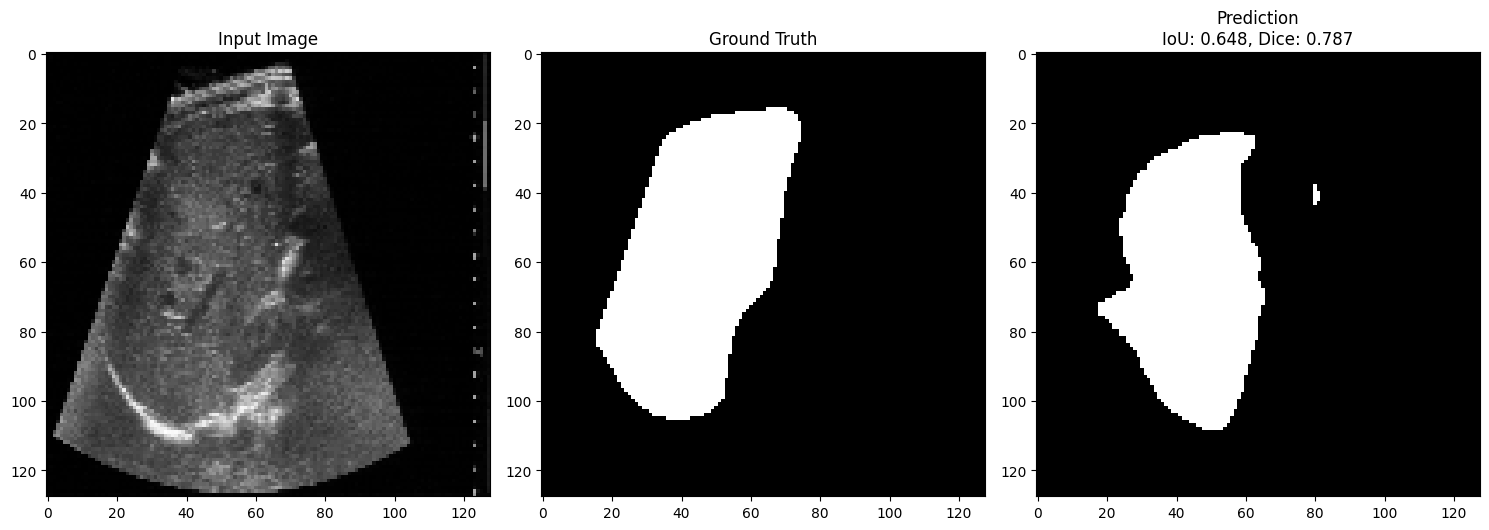

Processing image 477/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 478/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing image 479/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 480/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 481/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


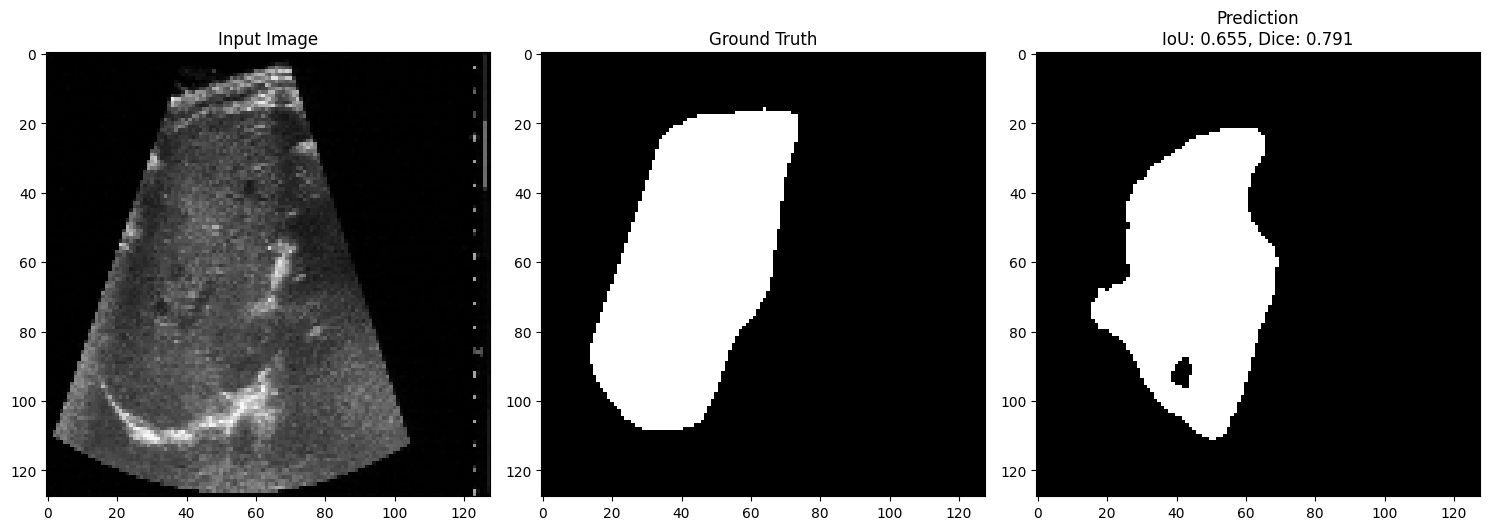

Processing image 482/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Processing image 483/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Processing image 484/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Processing image 485/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Processing image 486/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


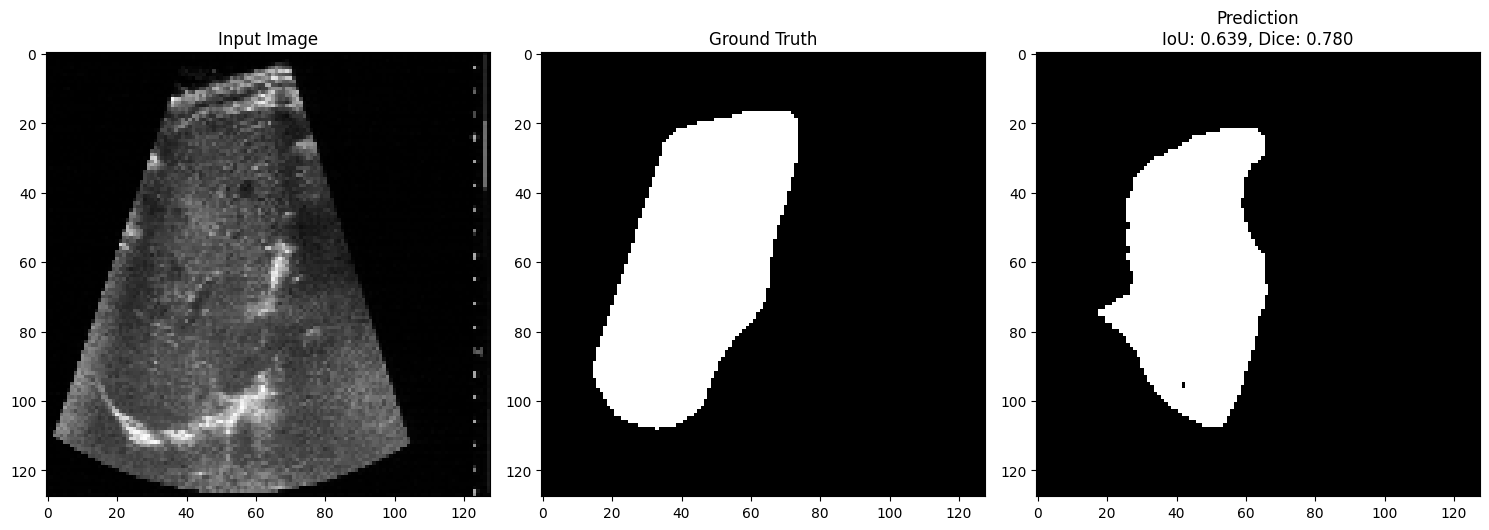

Processing image 487/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Processing image 488/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Processing image 489/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Processing image 490/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Processing image 491/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


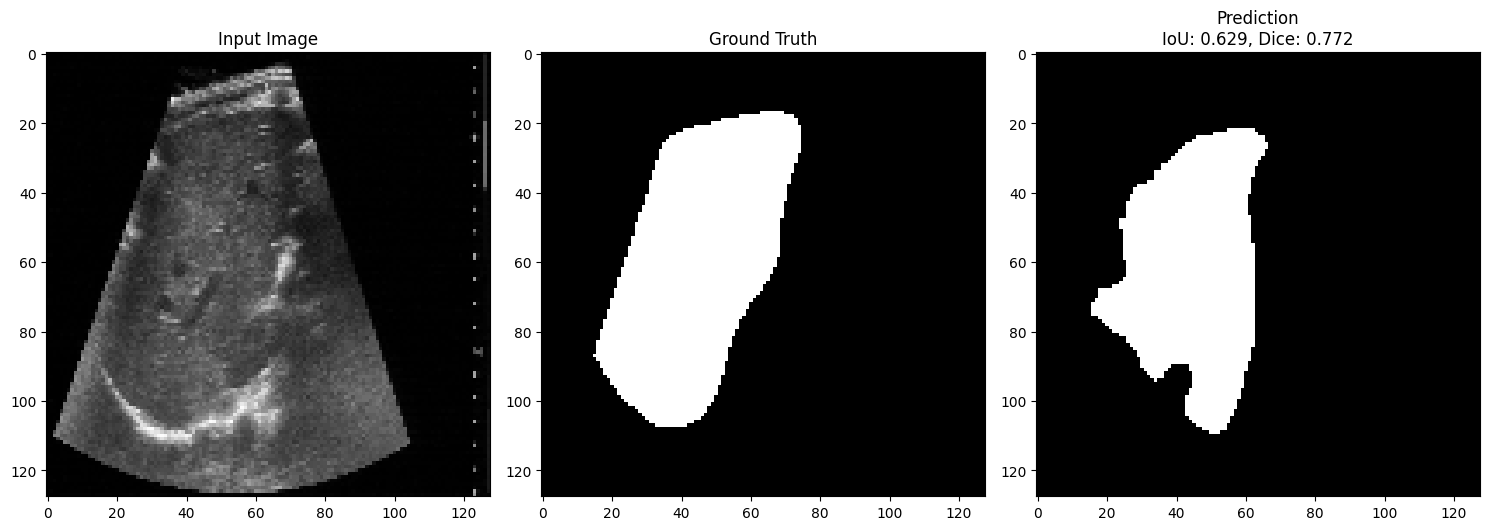

Processing image 492/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Processing image 493/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Processing image 494/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Processing image 495/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Processing image 496/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


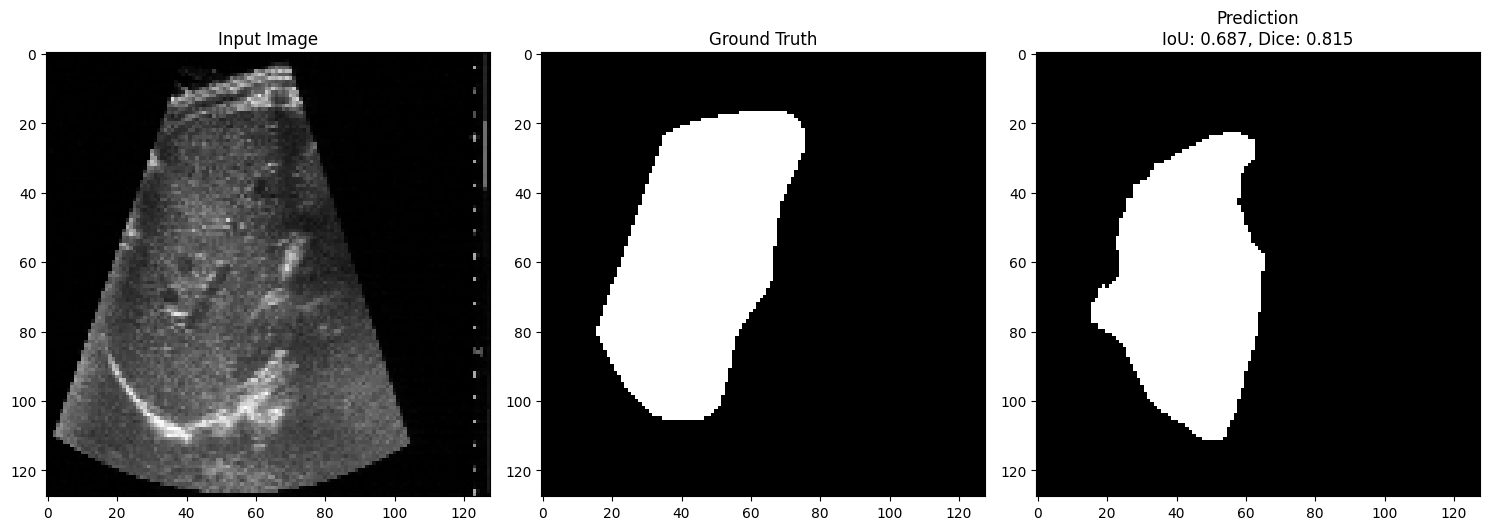

Processing image 497/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Processing image 498/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Processing image 499/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing image 500/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Processing image 501/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


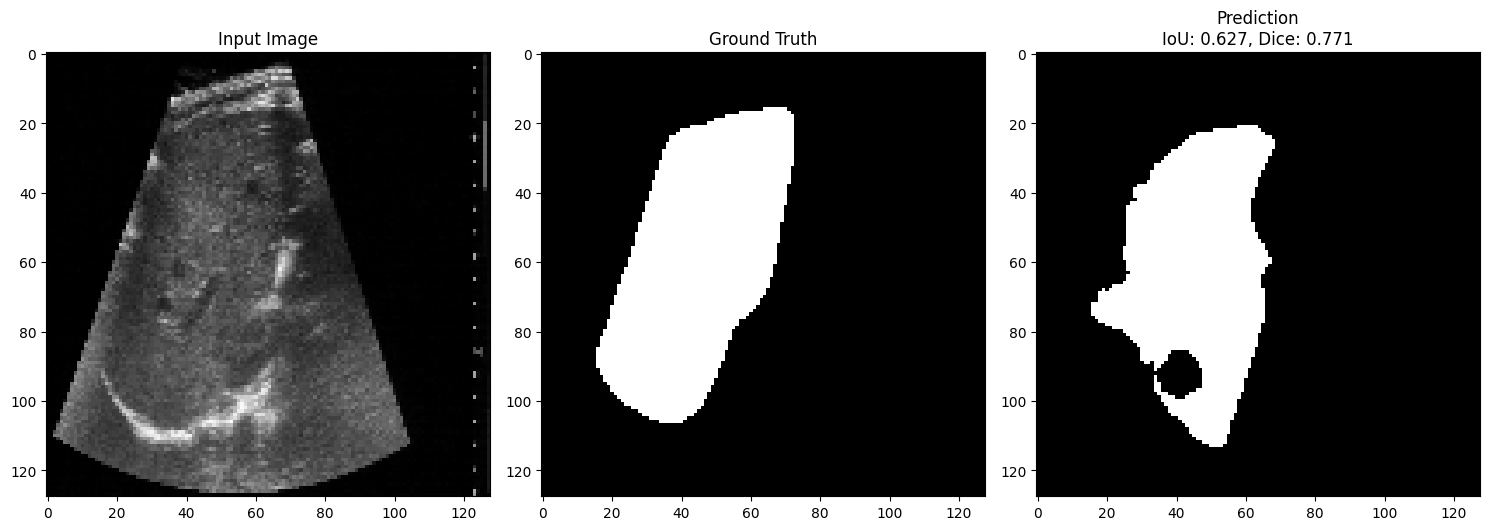

Processing image 502/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 503/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Processing image 504/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Processing image 505/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing image 506/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


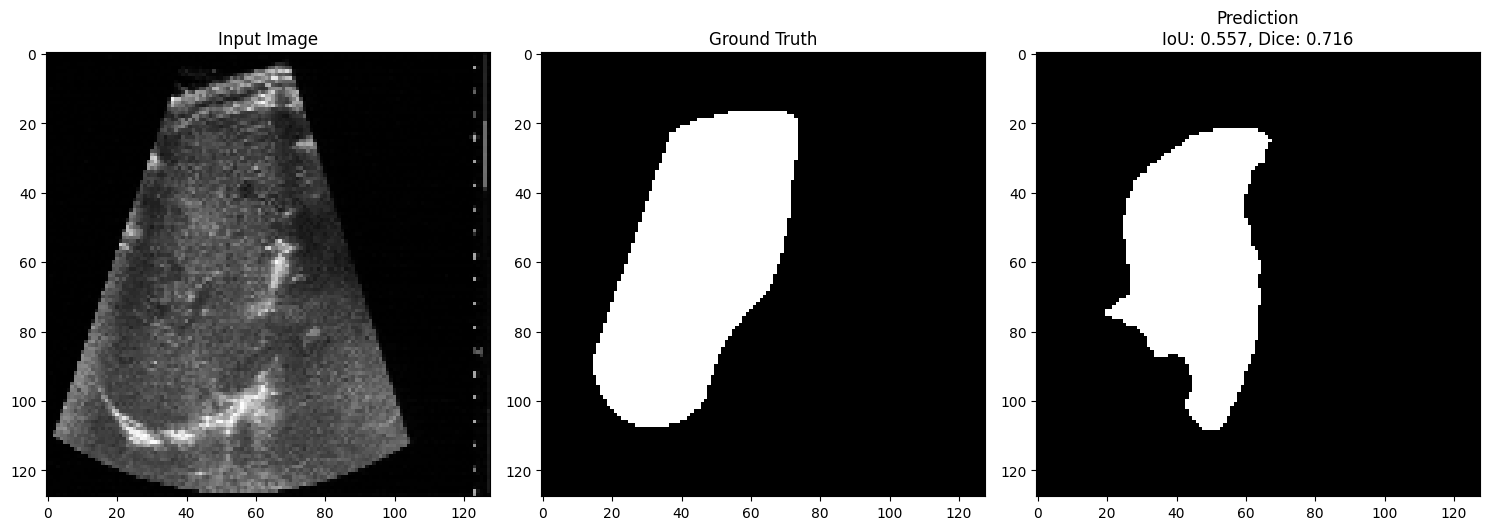

Processing image 507/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processing image 508/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processing image 509/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 510/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 511/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


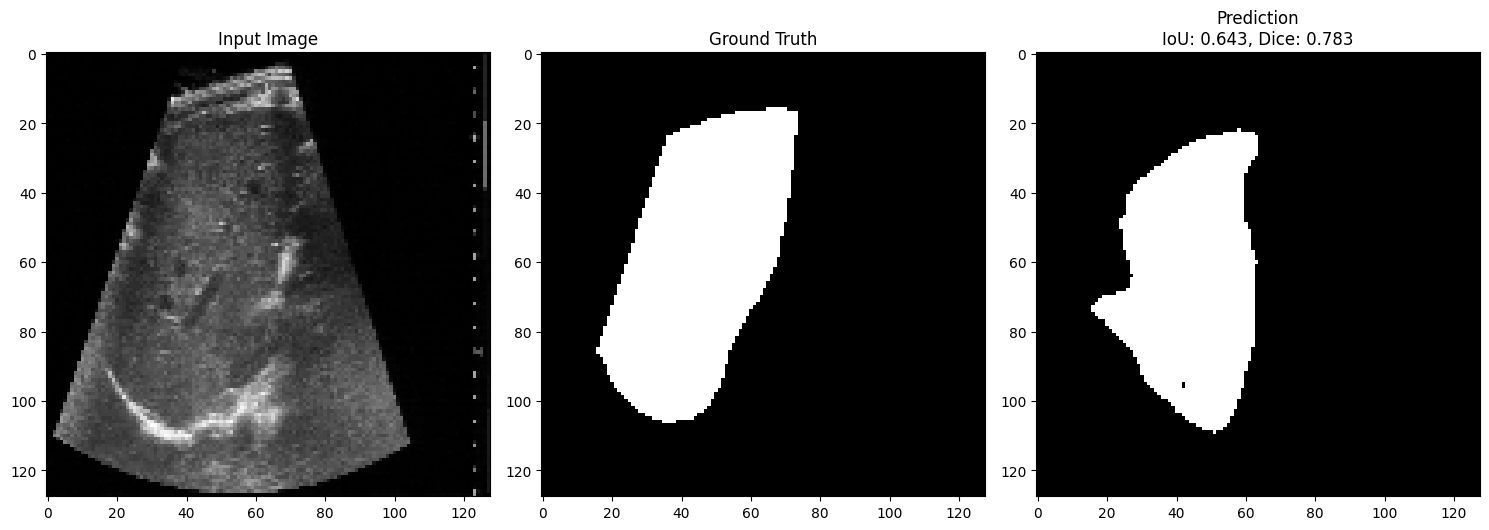

Processing image 512/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 513/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 514/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 515/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Processing image 516/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


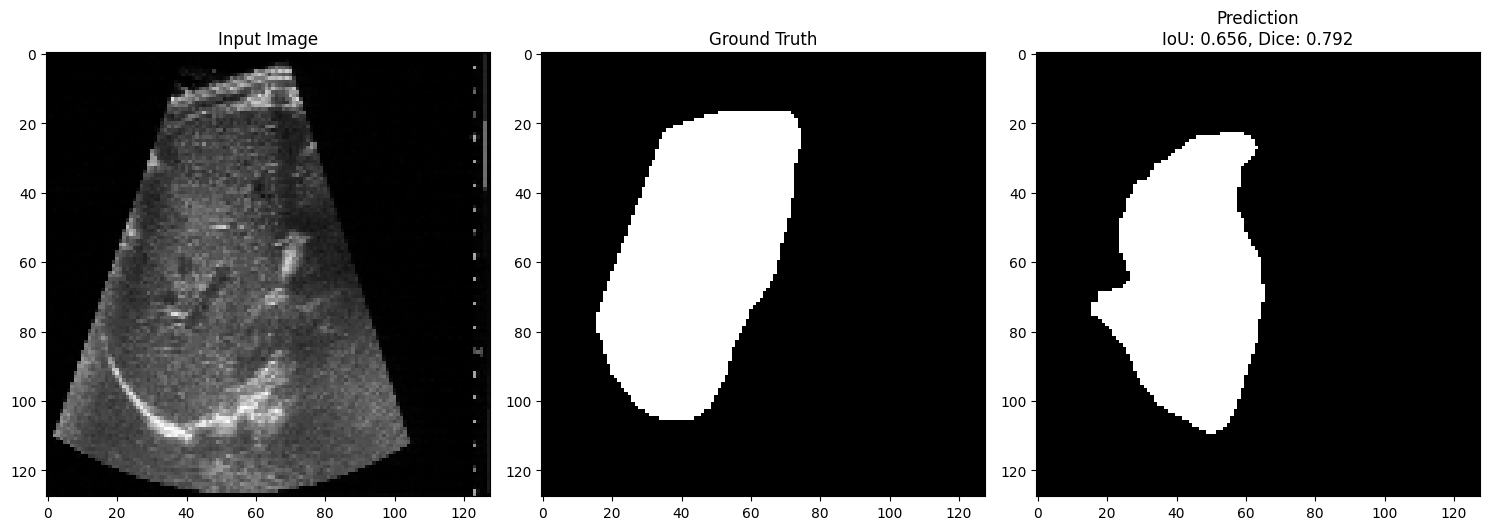

Processing image 517/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 518/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Processing image 519/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Processing image 520/520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Test Results:
Mean IoU: 0.5535 ± 0.0579
Mean Dice: 0.7108 ± 0.0483


In [40]:
import os
import numpy as np
import cv2
from sklearn.metrics import jaccard_score, f1_score
import matplotlib.pyplot as plt

class TestDataGenerator:
    def __init__(self, image_folder, mask_folder, image_size=(128,128)):
        self.image_paths = sorted([os.path.join(image_folder, f) for f in os.listdir(image_folder)])
        self.mask_paths = sorted([os.path.join(mask_folder, f) for f in os.listdir(mask_folder)])
        self.image_size = image_size

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        # Load and preprocess image
        img_path = self.image_paths[index]
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, self.image_size)
        img = img.astype(np.float32) / 255.0
        img = np.expand_dims(img, axis=-1)

        # Load and preprocess mask
        mask_path = self.mask_paths[index]
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, self.image_size)
        mask = (mask > 127).astype(np.float32)
        mask = np.expand_dims(mask, axis=-1)

        return np.expand_dims(img, axis=0), np.expand_dims(mask, axis=0)

def compute_metrics_with_visualization(model, data_gen, save_path=None):
    iou_scores = []
    dice_scores = []

    for i in range(len(data_gen)):
        print(f"Processing image {i+1}/{len(data_gen)}")

        image, mask = data_gen[i]
        pred = model.predict(image)
        pred_binary = (pred > 0.5).astype(np.uint8)
        mask_binary = (mask > 0.5).astype(np.uint8)

        # Calculate metrics
        iou = jaccard_score(mask_binary.flatten(), pred_binary.flatten())
        dice = f1_score(mask_binary.flatten(), pred_binary.flatten())

        iou_scores.append(iou)
        dice_scores.append(dice)

        # Visualize every 5th image
        if i % 5 == 0:
            plt.figure(figsize=(15, 5))
            plt.subplot(131)
            plt.imshow(image[0,:,:,0], cmap='gray')
            plt.title('Input Image')
            plt.subplot(132)
            plt.imshow(mask[0,:,:,0], cmap='gray')
            plt.title('Ground Truth')
            plt.subplot(133)
            plt.imshow(pred_binary[0,:,:,0], cmap='gray')
            plt.title(f'Prediction\nIoU: {iou:.3f}, Dice: {dice:.3f}')
            plt.tight_layout()
            plt.show()

    mean_iou = np.mean(iou_scores)
    mean_dice = np.mean(dice_scores)
    std_iou = np.std(iou_scores)
    std_dice = np.std(dice_scores)

    return {
        'mean_iou': mean_iou,
        'mean_dice': mean_dice,
        'std_iou': std_iou,
        'std_dice': std_dice,
        'all_ious': iou_scores,
        'all_dices': dice_scores
    }

# Usage
TEST_IMAGE_PATH = "/content/dataset/test/imagespng"
TEST_MASK_PATH = "/content/dataset/test/masksWB"

test_data_gen = TestDataGenerator(TEST_PATH, TEST_MASK_PATH)
metrics = compute_metrics_with_visualization(model, test_data_gen, save_path='test_predictions')

print(f"Test Results:")
print(f"Mean IoU: {metrics['mean_iou']:.4f} ± {metrics['std_iou']:.4f}")
print(f"Mean Dice: {metrics['mean_dice']:.4f} ± {metrics['std_dice']:.4f}")